<a href="https://colab.research.google.com/github/DorothyOteng/Breast_Cancer_Research/blob/main/complete_final_breast_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

**Utilizing Machine Learning to Evaluate and Predict the Impact of Different Treatment Approaches on Cancer Progression and Metastasis in African American Women with ER+ Breast Cancer**

This notebook delves into the critical analysis of how different treatment strategies affect the progression and metastasis of ER+ breast cancer among African American women. With a focus on immunotherapy, chemotherapy, and hormone therapy, we aim to:

- **Evaluate the Impact**: Understand how various treatments influence the stage and behavior of ER+ breast cancer, shedding light on their effectiveness in controlling cancer progression.

- **Investigate Metastasis**: Examine the relationship between treatment methods and the risk of metastasis, determining how each approach affects the spread of cancer from its original site.

- **Explore Predictive Factors**: Identify key predictive factors for treatment efficacy, focusing on aspects such as cancer stage, behavior, and metastasis likelihood, to improve personalized treatment planning.

Our investigation is geared towards providing insights into the most effective treatment modalities, with the ultimate goal of enhancing care and outcomes for African American women battling ER+ breast cancer.



### Import Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve
from statsmodels.tools.tools import add_constant
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import adjusted_rand_score

# Data Collection: Extract, Transform, Load (ETL)

In [ ]:
#uploading data into google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read the dataset

In [ ]:
# Set the working directory to the folder containing the data or where you will upload your data:
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
#reading my data
df = pd.read_csv('/content/drive/MyDrive/2ndBreastcancerdata.csv')

# Exploratory Data Analysis: Examine the dataset

In [ ]:
# Display first 5 rwos of the dataset
df.head()

plco_id harm_build                   build j_breast_topography  \
0  A-001799-8   08.23.23  t20231107_r3_j20231204                 NaN   
1  A-001889-7   08.23.23  t20231107_r3_j20231204                 NaN   
2  A-001898-8   08.23.23  t20231107_r3_j20231204                C502   
3  A-001979-6   08.23.23  t20231107_r3_j20231204                 NaN   
4  A-002699-9   08.23.23  t20231107_r3_j20231204                 NaN   

   j_breast_morphology  j_breast_grade  j_breast_behavior  \
0                  NaN             NaN                NaN   
1                  NaN             NaN                NaN   
2               8201.0             1.0                2.0   
3                  NaN             NaN                NaN   
4                  NaN             NaN                NaN   

   j_breast_cancer_diagdays  j_breast_laterality  j_breast_nodes_examined  \
0                       NaN                  NaN                      NaN   
1                       NaN                  NaN                      NaN   
2                    6623.0                  2.0                      2.0   
3                       NaN                  NaN                      NaN   
4                       NaN                  NaN                      NaN   

   ...  center  rndyear  arm  sex  age  agelevel  j_fstcan_exitstat  \
0  ...       6     1997    2    2   74         3                  8   
1  ...       5     2000    2    2   63         1                  7   
2  ...       6     1996    2    2   59         0                  1   
3  ...       3     1998    1    2   57         0                  7   
4  ...       4     1994    2    2   62         1                  4   

   j_fstcan_exitage  j_fstcan_exitdays  in_TGWAS_population  
0                88               5037                    1  
1                80               6308                    1  
2                77               6623                    1  
3                76               7028                    1  
4                81               6948                    1  

[5 rows x 187 columns]

In [ ]:
# Display last 5 rwos of the dataset
df.tail()

plco_id harm_build                   build j_breast_topography  \
78204  Z-162169-9   08.23.23  t20231107_r3_j20231204                 NaN   
78205  Z-162259-8   08.23.23  t20231107_r3_j20231204                 NaN   
78206  Z-162286-1   08.23.23  t20231107_r3_j20231204                 NaN   
78207  Z-162367-9   08.23.23  t20231107_r3_j20231204                C504   
78208  Z-162376-0   08.23.23  t20231107_r3_j20231204                 NaN   

       j_breast_morphology  j_breast_grade  j_breast_behavior  \
78204                  NaN             NaN                NaN   
78205                  NaN             NaN                NaN   
78206                  NaN             NaN                NaN   
78207               8500.0             2.0                3.0   
78208                  NaN             NaN                NaN   

       j_breast_cancer_diagdays  j_breast_laterality  j_breast_nodes_examined  \
78204                       NaN                  NaN                      NaN   
78205                       NaN                  NaN                      NaN   
78206                       NaN                  NaN                      NaN   
78207                     250.0                  NaN                      NaN   
78208                       NaN                  NaN                      NaN   

       ...  center  rndyear  arm  sex  age  agelevel  j_fstcan_exitstat  \
78204  ...       4     1996    1    2   63         1                  4   
78205  ...       1     1995    2    2   60         1                  7   
78206  ...       4     1997    1    2   61         1                  3   
78207  ...       4     1997    2    2   62         1                  1   
78208  ...       4     1996    2    2   57         0                  5   

       j_fstcan_exitage  j_fstcan_exitdays  in_TGWAS_population  
78204                80               6208                    1  
78205                82               8032                    1  
78206                77               5949                    0  
78207                63                250                    0  
78208                62               1579                    0  

[5 rows x 187 columns]

#### New Dataframe Assigned.

In [ ]:
# Assigning original_df to my original DataFrame
original_df = df.copy()

## Data Cleaning: Data Analysis and Preparation

In [ ]:
# Displaying the dimension fo the data; showing the number of rows and columns
df.shape

(78209, 187)

In [ ]:
# Displaying the column names
df.columns

Index(['plco_id', 'harm_build', 'build', 'j_breast_topography',
       'j_breast_morphology', 'j_breast_grade', 'j_breast_behavior',
       'j_breast_cancer_diagdays', 'j_breast_laterality',
       'j_breast_nodes_examined',
       ...
       'center', 'rndyear', 'arm', 'sex', 'age', 'agelevel',
       'j_fstcan_exitstat', 'j_fstcan_exitage', 'j_fstcan_exitdays',
       'in_TGWAS_population'],
      dtype='object', length=187)

In [ ]:
# Displays some statistics of the numeric columns
df.describe()

j_breast_morphology  j_breast_grade  j_breast_behavior  \
count          6273.000000     6273.000000        6273.000000   
mean           8483.628726        3.625379           2.797226   
std              87.686409        3.072769           0.402494   
min            8000.000000        1.000000           1.000000   
25%            8500.000000        2.000000           3.000000   
50%            8500.000000        2.000000           3.000000   
75%            8500.000000        3.000000           3.000000   
max            9120.000000        9.000000           3.000000   

       j_breast_cancer_diagdays  j_breast_laterality  j_breast_nodes_examined  \
count               6273.000000          3714.000000              3000.000000   
mean                3031.618683             1.553312                 7.817333   
std                 1932.386110             0.809642                16.555261   
min                    0.000000             1.000000                 0.000000   
25%                 1389.000000             1.000000                 1.000000   
50%                 2846.000000             2.000000                 2.000000   
75%                 4462.000000             2.000000                 9.000000   
max                 8608.000000             9.000000                99.000000   

       j_breast_nodes_positive  j_breast_cs_tumor_size  \
count              3000.000000             2086.000000   
mean                 25.125333              129.415628   
std                  42.218437              312.656233   
min                   0.000000                0.000000   
25%                   0.000000                9.000000   
50%                   0.000000               15.000000   
75%                  95.000000               27.000000   
max                  99.000000              999.000000   

       j_breast_trt_rad_modality  j_breast_trt_brm  ...        center  \
count                3048.000000       3709.000000  ...  78209.000000   
mean                   21.268701          4.417633  ...      6.008746   
std                    27.900527         20.253331  ...      2.871422   
min                     0.000000          0.000000  ...      1.000000   
25%                     0.000000          0.000000  ...      4.000000   
50%                    20.000000          0.000000  ...      5.000000   
75%                    27.000000          0.000000  ...      9.000000   
max                    99.000000         99.000000  ...     11.000000   

            rndyear           arm      sex           age      agelevel  \
count  78209.000000  78209.000000  78209.0  78209.000000  78209.000000   
mean    1997.165250      1.500019      2.0     62.513176      1.146045   
std        1.870748      0.500003      0.0      5.400965      1.041254   
min     1993.000000      1.000000      2.0     50.000000      0.000000   
25%     1996.000000      1.000000      2.0     58.000000      0.000000   
50%     1997.000000      2.000000      2.0     62.000000      1.000000   
75%     1999.000000      2.000000      2.0     67.000000      2.000000   
max     2001.000000      2.000000      2.0     78.000000      3.000000   

       j_fstcan_exitstat  j_fstcan_exitage  j_fstcan_exitdays  \
count       78209.000000      78209.000000       78209.000000   
mean            4.512984         76.870168        5244.313199   
std             2.253677          7.369842        2055.416309   
min             0.000000         54.000000           0.000000   
25%             4.000000         72.000000        4045.000000   
50%             4.000000         77.000000        5476.000000   
75%             7.000000         82.000000        6831.000000   
max             9.000000         98.000000        8828.000000   

       in_TGWAS_population  
count         78209.000000  
mean              0.727563  
std               0.445216  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max               1.00000

In [ ]:
# Checks the basic information about the dataset
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78209 entries, 0 to 78208
Data columns (total 187 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    plco_id                          78209 non-null  object 
 1    harm_build                       78209 non-null  object 
 2    build                            78209 non-null  object 
 3    j_breast_topography              6273 non-null   object 
 4    j_breast_morphology              6273 non-null   float64
 5    j_breast_grade                   6273 non-null   float64
 6    j_breast_behavior                6273 non-null   float64
 7    j_breast_cancer_diagdays         6273 non-null   float64
 8    j_breast_laterality              3714 non-null   float64
 9    j_breast_nodes_examined          3000 non-null   float64
 10   j_breast_nodes_positive          3000 non-null   float64
 11   j_breast_cs_tumor_size           2086 non-null   float64
 12   j_

In [ ]:
# first rows
df.head(2)

plco_id harm_build                   build j_breast_topography  \
0  A-001799-8   08.23.23  t20231107_r3_j20231204                 NaN   
1  A-001889-7   08.23.23  t20231107_r3_j20231204                 NaN   

   j_breast_morphology  j_breast_grade  j_breast_behavior  \
0                  NaN             NaN                NaN   
1                  NaN             NaN                NaN   

   j_breast_cancer_diagdays  j_breast_laterality  j_breast_nodes_examined  \
0                       NaN                  NaN                      NaN   
1                       NaN                  NaN                      NaN   

   ...  center  rndyear  arm  sex  age  agelevel  j_fstcan_exitstat  \
0  ...       6     1997    2    2   74         3                  8   
1  ...       5     2000    2    2   63         1                  7   

   j_fstcan_exitage  j_fstcan_exitdays  in_TGWAS_population  
0                88               5037                    1  
1                80               6308                    1  

[2 rows x 187 columns]

In [ ]:
# checking number of columns and rows
df.shape

(78209, 187)

In [ ]:
# checking the number of ER+
df['j_breast_er_status'].value_counts()

j_breast_er_status
3.0    4440
1.0     779
7.0     755
6.0      79
2.0      57
5.0      30
4.0       3
Name: count, dtype: int64

 The number (3) represents the number of people with ER+ status in the dataset

In [ ]:
# checking the number of Race
df['race7'].value_counts()

race7
1    67395
2     4338
4     2567
7     2121
3     1215
5      371
6      202
Name: count, dtype: int64

## Data Exploration

In [ ]:
# Getting the count of those who answered YES and NO to CONFIRMED BREAST CANCER
df['j_breast_cancer'].value_counts()

j_breast_cancer
0    71936
1     6273
Name: count, dtype: int64

### Observation- Only Cancer
o='no confirmed cancer' were 71936 and 1='confirmed cancer' were 6273.

In [ ]:
# Getting the count of those who answered YES and NO to METASTASIS BREAST CANCER
df['j_breast_has_mets'].value_counts()

j_breast_has_mets
0.0     4717
11.0    1256
1.0      254
9.0       45
12.0       1
Name: count, dtype: int64

### Observation: Metastasis
o='no metastasis' were 4717, 1='yes' were 254; 9='unknown', which is not sure if they have breast cancer or not. 11='confirmed in situ' which is pre-cancerous and only 1 was borderline malignant.

A binary conversion would be used to convert the categories to 2 (yes or no). I removed the cateogry '9=unknown' and added the categories 11 and 12 to the 'yes' category.

#### Missing values before any imputations

In [ ]:
# Shows the number of missing values
df.isnull().sum()

plco_id                    0
harm_build                 0
build                      0
j_breast_topography    71936
j_breast_morphology    71936
                       ...  
agelevel                   0
j_fstcan_exitstat          0
j_fstcan_exitage           0
j_fstcan_exitdays          0
in_TGWAS_population        0
Length: 187, dtype: int64

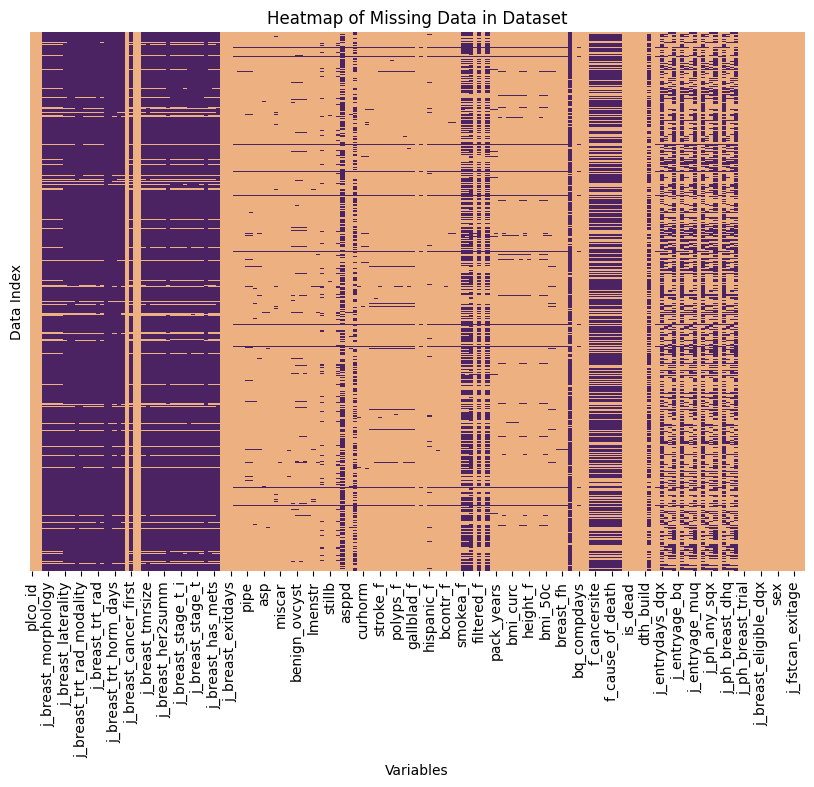

In [ ]:
# visualizing the missing values using a heatmap

#This heatmap generates a boolean dataframe where the lighter color represents True (missing values) and darker color represents false(non-missing values)
#this heatmap visually provides a quic assesment of the missing values in the dataset.

plt.figure(figsize=(10, 7))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='flare')
plt.title('Heatmap of Missing Data in Dataset')
plt.xlabel('Variables')
plt.ylabel('Data Index')
plt.show()

Heatmap is truncated since i have a lot of variables. Hence, its not displaying all the variables.

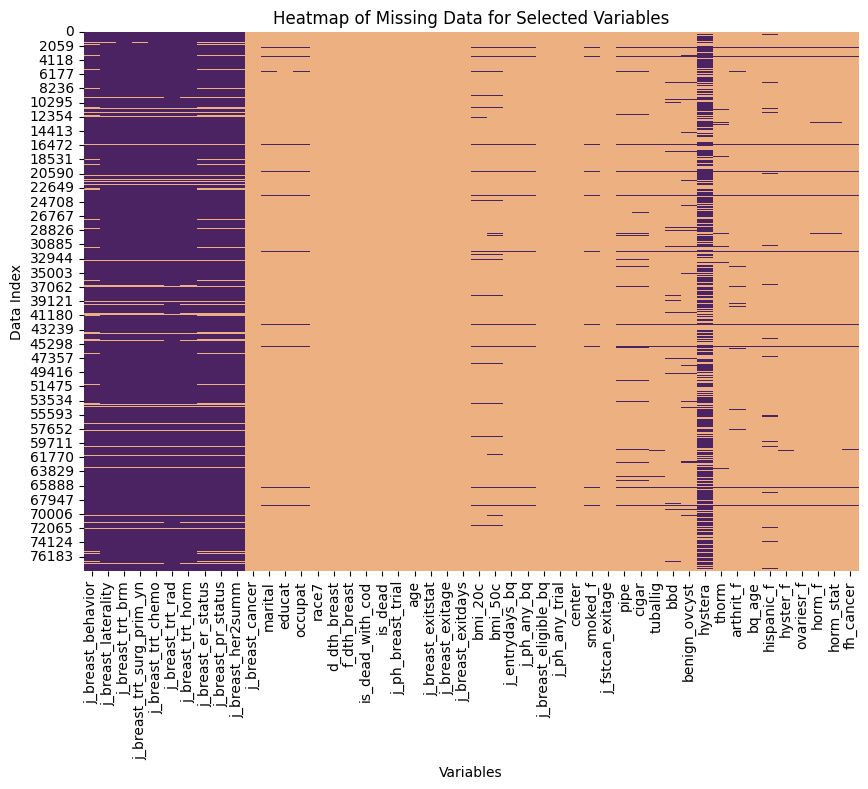

In [ ]:
# Heatmap showing only subset variables

# Create a list of variables for which you want to visualize missing data.
variables = [
    'j_breast_behavior', 'j_breast_laterality', 'j_breast_trt_brm', 'j_breast_trt_surg_prim_yn', 'j_breast_trt_chemo',
    'j_breast_trt_rad', 'j_breast_trt_horm', 'j_breast_er_status', 'j_breast_pr_status', 'j_breast_her2summ',
    'j_breast_cancer', 'marital', 'educat', 'occupat', 'race7', 'd_dth_breast', 'f_dth_breast', 'is_dead_with_cod',
    'is_dead', 'j_ph_breast_trial', 'age', 'j_breast_exitstat', 'j_breast_exitage', 'j_breast_exitdays', 'bmi_20c',
    'bmi_50c', 'j_entrydays_bq', 'j_ph_any_bq', 'j_breast_eligible_bq', 'j_ph_any_trial', 'center', 'smoked_f',
    'j_fstcan_exitage', 'pipe', 'cigar', 'tuballig', 'bbd', 'benign_ovcyst', 'hystera', 'thorm', 'arthrit_f', 'bq_age',
    'hispanic_f', 'hyster_f', 'ovariesr_f', 'horm_f', 'horm_stat', 'fh_cancer'
]

# Select only the variables of interest from the DataFrame
df_subset = df[variables]

# Create a boolean DataFrame where True indicates missing values
missing_subset = df_subset.isnull()

# Plotting the heatmap
plt.figure(figsize=(10, 7))  # You can adjust the size to fit your needs
sns.heatmap(missing_subset, cbar=False, cmap='flare')
plt.title('Heatmap of Missing Data for Selected Variables')
plt.xlabel('Variables')
plt.ylabel('Data Index')
plt.show()

In [ ]:
#calculating the percentage of missing values in each column.
missing_val_perc = df.isnull().sum() / df.shape[0] * 100

# trying to see all the columns with missing values

pd.set_option('display.max_rows', None)  # To show all rows
pd.set_option('display.max_columns', None)  # To show all columns
print(missing_val_perc)

plco_id                             0.000000
harm_build                          0.000000
build                               0.000000
j_breast_topography                91.979184
j_breast_morphology                91.979184
j_breast_grade                     91.979184
j_breast_behavior                  91.979184
j_breast_cancer_diagdays           91.979184
j_breast_laterality                95.251186
j_breast_nodes_examined            96.164124
j_breast_nodes_positive            96.164124
j_breast_cs_tumor_size             97.332788
j_breast_trt_rad_modality          96.102750
j_breast_trt_brm                   95.257579
j_breast_trt_chemo                 95.256300
j_breast_trt_horm                  95.256300
j_breast_trt_rad                   96.180746
j_breast_trt_surg_prim_yn          95.251186
j_breast_trt_brm_days              99.959084
j_breast_trt_chemo_days            99.272462
j_breast_trt_horm_days             98.024524
j_breast_trt_rad_days              97.961871
j_breast_t

In [ ]:
# This code is used to identify the columns in the dataset that have missing values exceeding 10%. It retrieves the key(column names).
missing_val_column = missing_val_perc[missing_val_perc > 70].keys()
print(missing_val_column)

Index(['j_breast_topography', 'j_breast_morphology', 'j_breast_grade',
       'j_breast_behavior', 'j_breast_cancer_diagdays', 'j_breast_laterality',
       'j_breast_nodes_examined', 'j_breast_nodes_positive',
       'j_breast_cs_tumor_size', 'j_breast_trt_rad_modality',
       'j_breast_trt_brm', 'j_breast_trt_chemo', 'j_breast_trt_horm',
       'j_breast_trt_rad', 'j_breast_trt_surg_prim_yn',
       'j_breast_trt_brm_days', 'j_breast_trt_chemo_days',
       'j_breast_trt_horm_days', 'j_breast_trt_rad_days',
       'j_breast_trt_surg_prim_days', 'j_breast_cancer_first',
       'j_breast_hist_type', 'j_breast_tmrsize', 'j_breast_er_status',
       'j_breast_pr_status', 'j_breast_her2_stat', 'j_breast_her2summ',
       'j_breast_trt_surg_prim_sn20', 'j_breast_stage_m_i',
       'j_breast_stage_n_i', 'j_breast_stage_t_i', 'j_breast_stage_7e_i',
       'j_breast_stage_m', 'j_breast_stage_n', 'j_breast_stage_t',
       'j_breast_stage_7e', 'j_breast_summary_stage_raw',
       'j_breast_su

In [ ]:
# Counting the number of columns with missing values more than 70%
missing_val_column.shape

(41,)

In [ ]:
# checking count after binary conversion
df['j_breast_has_mets'].value_counts()

j_breast_has_mets
0.0     4717
11.0    1256
1.0      254
9.0       45
12.0       1
Name: count, dtype: int64

In [ ]:
# Checking the number of missing values in my target variable
df['j_breast_has_mets'].isnull().sum()

71936

# Creating new dataframe and dropping missing values

##### 2nd New dataframe assigned

In [ ]:
# creating a new dataframe to drop all missing values/rows
df_dropped = original_df.copy()

### Binary Conversion for Target Variable

In [ ]:
# Binary conversion for my target variable

def convert_j_breast_has_mets_to_numeric(df):
    # Assuming '9' and 'missing' represent unknown status, first filter these out
    # Adjust this line if '9' and 'missing' are not present or handled elsewhere
    df_filtered = df[(df['j_breast_has_mets'] != 9) & (df['j_breast_has_mets'] != 'missing')]

    # Replace numeric codes with 'Yes'/'No'
    df_filtered['j_breast_has_mets'] = df_filtered['j_breast_has_mets'].replace({
        0: 'No', 1: 'Yes', 11: 'Yes', 12: 'Yes'
    })

    # Map 'Yes'/'No' to 1/0 for logistic regression
    df_filtered['j_breast_has_mets'] = df_filtered['j_breast_has_mets'].map({'Yes': 1, 'No': 0})

    return df_filtered

I will be using logistic regression since i had categorical variables.
I did a binary conversion for the target variable because logistic regression is designed for binary outcomes or dependent variables.
This was to help simplify the categorical variable.

In [ ]:
# Apply the conversion function to the df_dropped DataFrame
df_dropped = convert_j_breast_has_mets_to_numeric(df_dropped)

<ipython-input-27-031b6f9ffc4d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['j_breast_has_mets'] = df_filtered['j_breast_has_mets'].replace({
<ipython-input-27-031b6f9ffc4d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['j_breast_has_mets'] = df_filtered['j_breast_has_mets'].map({'Yes': 1, 'No': 0})


##### Missing values for 2nd new dataframe

In [ ]:
df_dropped.isnull().sum()

plco_id                                0
harm_build                             0
build                                  0
j_breast_topography                71936
j_breast_morphology                71936
j_breast_grade                     71936
j_breast_behavior                  71936
j_breast_cancer_diagdays           71936
j_breast_laterality                74463
j_breast_nodes_examined            75173
j_breast_nodes_positive            75173
j_breast_cs_tumor_size             76084
j_breast_trt_rad_modality          75128
j_breast_trt_brm                   74467
j_breast_trt_chemo                 74466
j_breast_trt_horm                  74466
j_breast_trt_rad                   75187
j_breast_trt_surg_prim_yn          74463
j_breast_trt_brm_days              78132
j_breast_trt_chemo_days            77595
j_breast_trt_horm_days             76621
j_breast_trt_rad_days              76572
j_breast_trt_surg_prim_days        75425
j_breast_cancer                        0
j_breast_cancer_

##### Data Preprocessing

In [ ]:
# Dropping all rows with missing values in the interested variables

variables_of_interest = [
    'j_breast_behavior', 'j_breast_laterality', 'j_breast_trt_brm', 'j_breast_trt_surg_prim_yn', 'j_breast_trt_chemo',
    'j_breast_trt_rad', 'j_breast_trt_horm', 'j_breast_er_status', 'j_breast_pr_status', 'j_breast_her2summ',
    'j_breast_cancer', 'marital', 'educat', 'occupat', 'race7', 'd_dth_breast', 'f_dth_breast', 'is_dead_with_cod',
    'is_dead', 'j_ph_breast_trial', 'age', 'j_breast_exitstat', 'j_breast_exitage', 'j_breast_exitdays', 'bmi_20c',
    'bmi_50c', 'j_entrydays_bq', 'j_ph_any_bq', 'j_breast_eligible_bq', 'j_ph_any_trial', 'center', 'smoked_f',
    'j_fstcan_exitage', 'pipe', 'cigar', 'tuballig', 'bbd', 'benign_ovcyst', 'hystera', 'thorm', 'arthrit_f', 'bq_age',
    'hispanic_f', 'hyster_f', 'ovariesr_f', 'horm_f', 'horm_stat', 'fh_cancer'
]

df_temp = df_dropped.dropna(subset=variables_of_interest)

In [ ]:
df_temp.head()

plco_id harm_build                   build j_breast_topography  \
117  A-009575-4   08.23.23  t20231107_r3_j20231204                C505   
376  A-026693-3   08.23.23  t20231107_r3_j20231204                C503   
500  A-030779-5   08.23.23  t20231107_r3_j20231204                C502   
589  A-035918-4   08.23.23  t20231107_r3_j20231204                C505   
685  A-038726-8   08.23.23  t20231107_r3_j20231204                C502   

     j_breast_morphology  j_breast_grade  j_breast_behavior  \
117               8500.0             9.0                3.0   
376               8480.0             2.0                3.0   
500               8500.0             9.0                2.0   
589               8520.0             1.0                3.0   
685               8500.0             3.0                3.0   

     j_breast_cancer_diagdays  j_breast_laterality  j_breast_nodes_examined  \
117                    2847.0                  1.0                      3.0   
376                    2806.0                  1.0                      3.0   
500                    2871.0                  2.0                      0.0   
589                    4845.0                  2.0                      3.0   
685                    6534.0                  1.0                      2.0   

     j_breast_nodes_positive  j_breast_cs_tumor_size  \
117                      0.0                    27.0   
376                      0.0                   993.0   
500                     98.0                   999.0   
589                      0.0                    12.0   
685                      0.0                    15.0   

     j_breast_trt_rad_modality  j_breast_trt_brm  j_breast_trt_chemo  \
117                       20.0               0.0                88.0   
376                       52.0               0.0                 0.0   
500                        0.0               0.0                 0.0   
589                       20.0               0.0                 0.0   
685                        0.0               0.0                 0.0   

     j_breast_trt_horm  j_breast_trt_rad  j_breast_trt_surg_prim_yn  \
117               88.0               1.0                        1.0   
376                1.0               2.0                        1.0   
500                0.0               0.0                        1.0   
589               82.0               1.0                        1.0   
685                0.0               0.0                        1.0   

     j_breast_trt_brm_days  j_breast_trt_chemo_days  j_breast_trt_horm_days  \
117                    NaN                      NaN                     NaN   
376                    NaN                      NaN                  2847.0   
500                    NaN                      NaN                     NaN   
589                    NaN                      NaN                     NaN   
685                    NaN                      NaN                     NaN   

     j_breast_trt_rad_days  j_breast_trt_surg_prim_days  j_breast_cancer  \
117                 2942.0                       2869.0                1   
376                 2833.0                       2826.0                1   
500                    NaN                       2895.0                1   
589                 4899.0                       4866.0                1   
685                    NaN                       6555.0                1   

     j_breast_cancer_first  build_incidence_cutoff  build_cancers  \
117                    1.0                       3              2   
376                    1.0                       3              2   
500                    1.0                       3              2   
589                    1.0                       3              2   
685                    0.0                       3              2   

     j_breast_hist_type  j_breast_tmrsize  j_breast_er_status  \
117                 3.0               2.0                 3.0   
376                 4.0            

In [ ]:
df_temp.tail()

plco_id harm_build                   build j_breast_topography  \
77323  Z-133882-2   08.23.23  t20231107_r3_j20231204                C508   
77523  Z-139624-2   08.23.23  t20231107_r3_j20231204                C501   
77699  Z-146185-5   08.23.23  t20231107_r3_j20231204                C504   
77741  Z-147616-9   08.23.23  t20231107_r3_j20231204                C505   
78068  Z-157543-2   08.23.23  t20231107_r3_j20231204                C505   

       j_breast_morphology  j_breast_grade  j_breast_behavior  \
77323               8500.0             1.0                3.0   
77523               8500.0             2.0                3.0   
77699               8520.0             9.0                3.0   
77741               8010.0             3.0                3.0   
78068               8522.0             9.0                2.0   

       j_breast_cancer_diagdays  j_breast_laterality  j_breast_nodes_examined  \
77323                    4549.0                  2.0                      6.0   
77523                    3540.0                  1.0                     12.0   
77699                    1168.0                  1.0                      NaN   
77741                    4880.0                  2.0                      2.0   
78068                    1461.0                  2.0                      NaN   

       j_breast_nodes_positive  j_breast_cs_tumor_size  \
77323                      0.0                    19.0   
77523                      0.0                    15.0   
77699                      NaN                     NaN   
77741                      0.0                   999.0   
78068                      NaN                     NaN   

       j_breast_trt_rad_modality  j_breast_trt_brm  j_breast_trt_chemo  \
77323                       24.0               0.0                 0.0   
77523                        0.0               0.0                 0.0   
77699                       99.0              99.0                99.0   
77741                        0.0               0.0                 0.0   
78068                       99.0              99.0                99.0   

       j_breast_trt_horm  j_breast_trt_rad  j_breast_trt_surg_prim_yn  \
77323                1.0               1.0                        1.0   
77523                0.0               0.0                        1.0   
77699               99.0               9.0                        9.0   
77741                0.0               0.0                        1.0   
78068               99.0               9.0                        9.0   

       j_breast_trt_brm_days  j_breast_trt_chemo_days  j_breast_trt_horm_days  \
77323                    NaN                      NaN                  4651.0   
77523                    NaN                      NaN                     NaN   
77699                    NaN                      NaN                     NaN   
77741                    NaN                      NaN                     NaN   
78068                    NaN                      NaN                     NaN   

       j_breast_trt_rad_days  j_breast_trt_surg_prim_days  j_breast_cancer  \
77323                 4604.0                       4568.0                1   
77523                    NaN                       3611.0                1   
77699                    NaN                          NaN                1   
77741                    NaN                       4891.0                1   
78068                    NaN                          NaN                1   

       j_breast_cancer_first  build_incidence_cutoff  build_cancers  \
77323                    0.0                       3              2   
77523                    1.0                       3              2   
77699                    1.0                       3              2   
77741                    1.0                       3              2   
78068                    1.0                       3              2   

       j_breast_hist_type  j_breast_tmrsize  j_breast_er_st

In [ ]:
# Saving dataframe as a CSV file

df_temp.to_csv('subset_data_dftemp.csv', index=False)

In [ ]:
# getting the statistics for the numerical variables
df_temp.describe()

j_breast_morphology  j_breast_grade  j_breast_behavior  \
count           769.000000      769.000000         769.000000   
mean           8483.661899        3.648895           2.803641   
std              85.760675        3.059140           0.397502   
min            8000.000000        1.000000           2.000000   
25%            8500.000000        2.000000           3.000000   
50%            8500.000000        2.000000           3.000000   
75%            8500.000000        3.000000           3.000000   
max            8543.000000        9.000000           3.000000   

       j_breast_cancer_diagdays  j_breast_laterality  j_breast_nodes_examined  \
count                769.000000           769.000000               711.000000   
mean                3211.821847             1.495449                 7.403657   
std                 2025.348986             0.684876                15.215872   
min                    5.000000             1.000000                 0.000000   
25%                 1447.000000             1.000000                 1.000000   
50%                 3037.000000             1.000000                 2.000000   
75%                 4846.000000             2.000000                 9.500000   
max                 8191.000000             9.000000                99.000000   

       j_breast_nodes_positive  j_breast_cs_tumor_size  \
count               711.000000              453.000000   
mean                 23.475387              127.485651   
std                  41.223836              310.502886   
min                   0.000000                1.000000   
25%                   0.000000                9.000000   
50%                   0.000000               15.000000   
75%                   8.000000               26.000000   
max                  99.000000              999.000000   

       j_breast_trt_rad_modality  j_breast_trt_brm  j_breast_trt_chemo  \
count                 665.000000        769.000000          769.000000   
mean                   20.601504          5.275683            9.413524   
std                    27.057152         21.961067           27.197400   
min                     0.000000          0.000000            0.000000   
25%                     0.000000          0.000000            0.000000   
50%                    20.000000          0.000000            0.000000   
75%                    26.000000          0.000000            3.000000   
max                    99.000000         99.000000           99.000000   

       j_breast_trt_horm  j_breast_trt_rad  j_breast_trt_surg_prim_yn  \
count         769.000000        769.000000                 769.000000   
mean           12.287386          1.161248                   1.325098   
std            30.589467          2.226733                   1.688166   
min             0.000000          0.000000                   0.000000   
25%             0.000000          0.000000                   1.000000   
50%             1.000000          1.000000                   1.000000   
75%             1.000000          1.000000                   1.000000   
max            99.000000          9.000000                   9.000000   

       j_breast_trt_brm_days  j_breast_trt_chemo_days  j_breast_trt_horm_days  \
count               8.000000               144.000000              361.000000   
mean             5765.750000              2756.243056             3479.121884   
std              2208.976347              1842.889466             2038.324594   
min               783.000000                75.000000               39.000000   
25%              5382.500000              1113.000000             1688.000000   
50%              6611.000000              2471.000000             3367.000000   
75%              6982.500000              4279.750000             5083.000000   
max              7651.000000              7191.000000             8253.000000   

       j_breast_trt_rad_days  j_breast_trt_surg_prim_days  j_breast_cancer  \
count             379.000000       

In [ ]:
#Before one-hot encoding
df_temp.shape

(769, 187)

In [ ]:
# checking the count for my target variables for each category
df_temp['j_breast_has_mets'].value_counts()

j_breast_has_mets
0.0    604
1.0    165
Name: count, dtype: int64

In [ ]:
# Let's check the basic information about the dataset
df_temp.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 117 to 78068
Data columns (total 187 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    plco_id                          769 non-null    object 
 1    harm_build                       769 non-null    object 
 2    build                            769 non-null    object 
 3    j_breast_topography              769 non-null    object 
 4    j_breast_morphology              769 non-null    float64
 5    j_breast_grade                   769 non-null    float64
 6    j_breast_behavior                769 non-null    float64
 7    j_breast_cancer_diagdays         769 non-null    float64
 8    j_breast_laterality              769 non-null    float64
 9    j_breast_nodes_examined          711 non-null    float64
 10   j_breast_nodes_positive          711 non-null    float64
 11   j_breast_cs_tumor_size           453 non-null    float64
 12   j_breas

##### Numerical & Categorical Variables

In [ ]:
# Checking to see the categorical and Numerical variables in the subset data

numerical_vars = df_temp.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_vars = df_temp.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)


Numerical Variables:
['j_breast_morphology', 'j_breast_grade', 'j_breast_behavior', 'j_breast_cancer_diagdays', 'j_breast_laterality', 'j_breast_nodes_examined', 'j_breast_nodes_positive', 'j_breast_cs_tumor_size', 'j_breast_trt_rad_modality', 'j_breast_trt_brm', 'j_breast_trt_chemo', 'j_breast_trt_horm', 'j_breast_trt_rad', 'j_breast_trt_surg_prim_yn', 'j_breast_trt_brm_days', 'j_breast_trt_chemo_days', 'j_breast_trt_horm_days', 'j_breast_trt_rad_days', 'j_breast_trt_surg_prim_days', 'j_breast_cancer', 'j_breast_cancer_first', 'build_incidence_cutoff', 'build_cancers', 'j_breast_hist_type', 'j_breast_tmrsize', 'j_breast_er_status', 'j_breast_pr_status', 'j_breast_her2_stat', 'j_breast_her2summ', 'j_breast_trt_surg_prim_sn20', 'j_breast_stage_m_i', 'j_breast_stage_n_i', 'j_breast_stage_t_i', 'j_breast_stage_7e_i', 'j_breast_stage_m', 'j_breast_stage_n', 'j_breast_stage_t', 'j_breast_stage_7e', 'j_breast_summary_stage_raw', 'j_breast_summary_stage_enhanced', 'j_breast_has_mets', 'j_brea

### Visualizations

##### Count plot

In [ ]:
# Creating a copy of df_temp specifically for visualization purposes
df_visualization = df_temp.copy()

<ipython-input-40-e5a5af1c669a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='j_breast_er_status', data=df_visualization, palette='viridis')


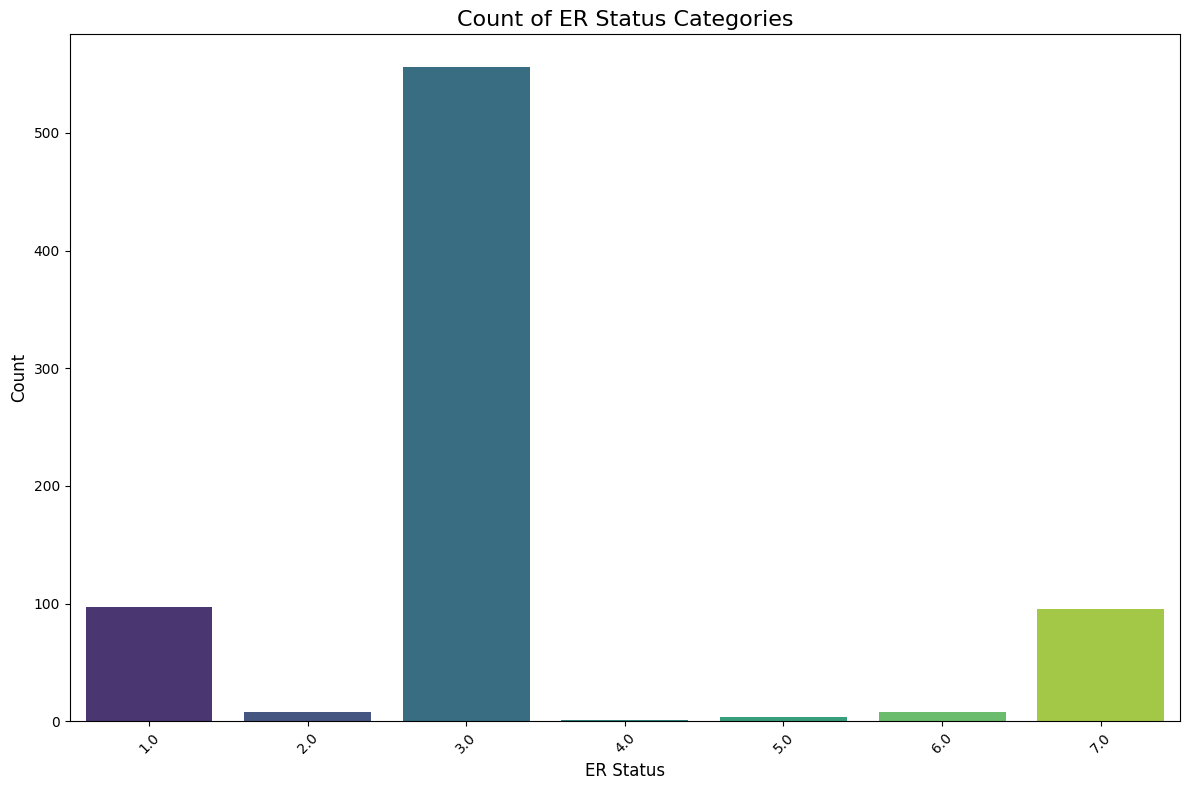

In [ ]:
# COUNT PLOT- showing the frequency or count of each category withing ER Status

# Using df_visualization as my DataFrame and 'j_breast_er_status' as the column for which i want a count plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.countplot(x='j_breast_er_status', data=df_visualization, palette='viridis')

plt.title('Count of ER Status Categories', fontsize=16)
plt.xlabel('ER Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels to prevent overlap
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()


##### Bar Chart

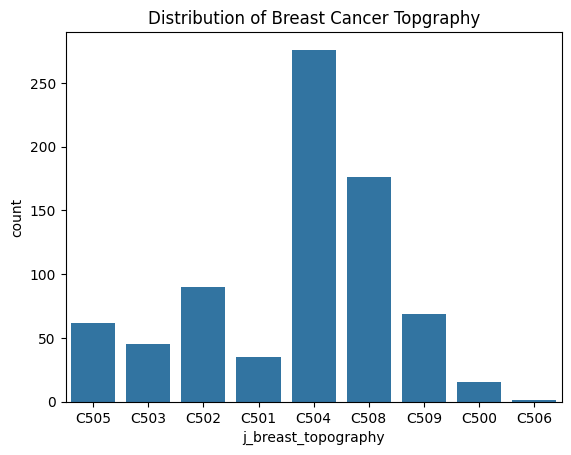

In [ ]:
# BARPLOT- to see the distribution of a few categorical variables.
# *** This represents Breast Cancer Topography- specific area within the breast where cancer or tumor originates.***

sns.countplot(x='j_breast_topography', data=df_temp)
plt.title('Distribution of Breast Cancer Topgraphy')
plt.show()

C500- Nipple

C501- Central portion of breast, surrounding the nipple and areola.

C502- Upper-inner quadrant of breast; the breast located towards the upper side, closer to the sternum (breastbone).

C503- Lower-inner quadrant of breast. This quadrant is below the nipple, closer to the sternum. It’s on the lower side of the breast towards the midline of the body.

C504- Upper-outer quadrant of breast. This is  closest to the armpit and it is known to be a common site for breast cancer occurrences.

C505- Lower-outer quadrant of breast. Like the upper-outer quadrant, it's on the outer side of the breast.

C506- Axillary tail of breast. his is an extension of the breast tissue that goes into the armpit (axilla).

C508- Overlapping lesion of breast. This code is used when a tumor or lesion spans more than one quadrant of the breast and does not fit into one specific location.

C509- Breast NOS(Not Otherwise Specified): This code is used when a specific location within the breast isn't specified or the lesion affects the breast generally, without a clear point of origin.

Source: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.michigan.gov/-/media/Project/Websites/mdhhs/Folder3/Folder33/Folder2/Folder133/Folder1/Folder233/MCSP_Laterality_Codes_by_Primary_Site_Jan_2019.pdf?rev=5dbbd1176cac486bbc92ab6702d21cbf

##### Histogram

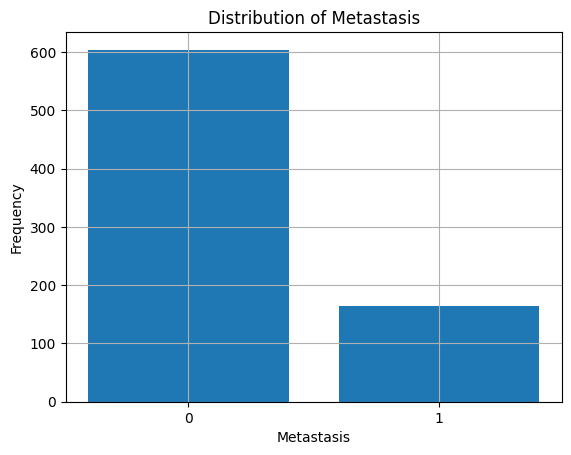

In [ ]:
# Histogram - for numeric variables
# Checking the distribution of the Metastasis

#bins- creates bins -0.5 to 0.5 for 'no metastasis' and 0.5 to 1.5 for 'metastasis.
#rwidth- reduces the width of each bar to 80%.
#xticks- sets the x-axis to only show 0 and 1.

df_temp['j_breast_has_mets'].hist(bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1])
plt.title('Distribution of Metastasis')
plt.xlabel('Metastasis')
plt.ylabel('Frequency')
plt.show()

In this bar graph, we observe the distribution of metastasis within our study population post-cleanup. The majority, as we see, are non-metastatic, denoted by the height of the bar for 0, while the metastatic cases, though fewer, are distinctly visualized by the bar for 1. This tells us about the incidence rates and the data spread, which are essential considerations for our predictive modeling.

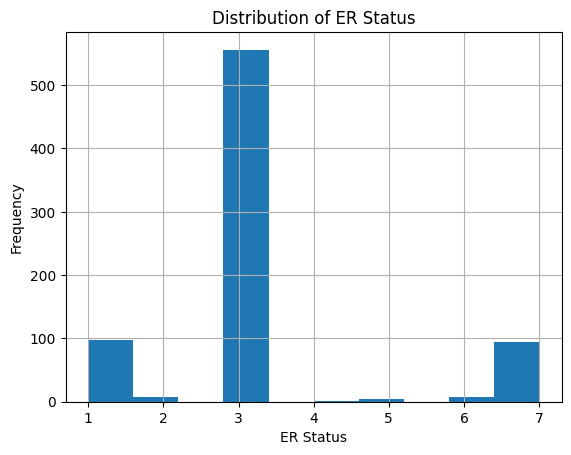

In [ ]:
# Histogram for ER Status- checking distribution

df_temp['j_breast_er_status'].hist()
plt.title('Distribution of ER Status')
plt.xlabel('ER Status')
plt.ylabel('Frequency')
plt.show()

# ER status = 3 represents ER positive.

In reviewing the distribution of ER status within our dataset, we observe the highest frequency in category '3: Positive,' indicating that a substantial number of cases are ER-positive. This is followed by '1: Negative,' where a significant portion of the sample does not express the estrogen receptor. Lesser frequencies are noted for '2: Equivocal,' '6: Ordered, No Results,' and '7: Not Ordered,' suggesting a smaller number of uncertain cases, pending tests, or instances where the test wasn't ordered. Categories '4: Indeterminant' and '5: Not Available' are comparatively rare in our data, indicating good data availability and determinable test results for most cases. The predominance of 'Positive' results may influence treatment options, as ER-positive breast cancers are typically responsive to hormone therapies ans are the most common type of breast cancer.

#### CROSS TABULATION

In [ ]:
# Cross Tabulation -  to summarize the relationship between my categorical variables- Cancer presence and Metastasis
crosstab_metastasis = pd.crosstab(df_temp['j_breast_cancer'], df_temp['j_breast_has_mets'])

print(crosstab_metastasis )

j_breast_has_mets  0.0  1.0
j_breast_cancer            
1                  604  165


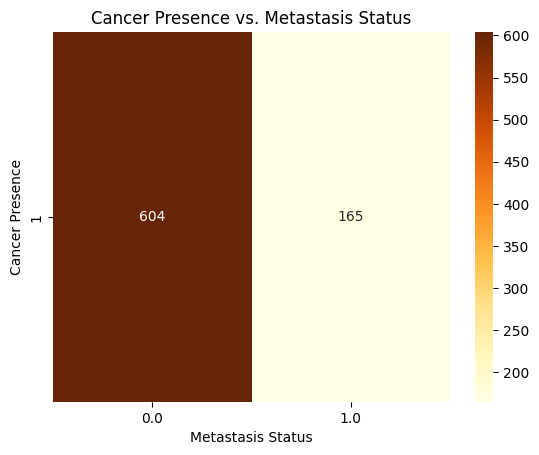

In [ ]:
# Visualizing the cross-tabulation of cancer presence and metastasis status
sns.heatmap(crosstab_metastasis, annot=True, cmap='YlOrBr', fmt='g')
plt.title('Cancer Presence vs. Metastasis Status')
plt.xlabel('Metastasis Status')
plt.ylabel('Cancer Presence')
plt.show()

Let’s look at the heatmap illustrating the binary conversion of our target variable. Here, the darker shade represents the higher frequency of cases without metastasis (0), showing 604 cases, and the lighter shade represents those with metastasis (1), showing 165 cases. This clear visualization aids in immediately grasping the distribution of our target outcomes.

In [ ]:
# Cross Tabulation - ER status and Metastasis
crosstab_er = pd.crosstab(df_temp['j_breast_er_status'], df_temp['j_breast_has_mets'])

print(crosstab_er )

j_breast_has_mets   0.0  1.0
j_breast_er_status          
1.0                  76   21
2.0                   5    3
3.0                 487   69
4.0                   1    0
5.0                   2    2
6.0                   6    2
7.0                  27   68


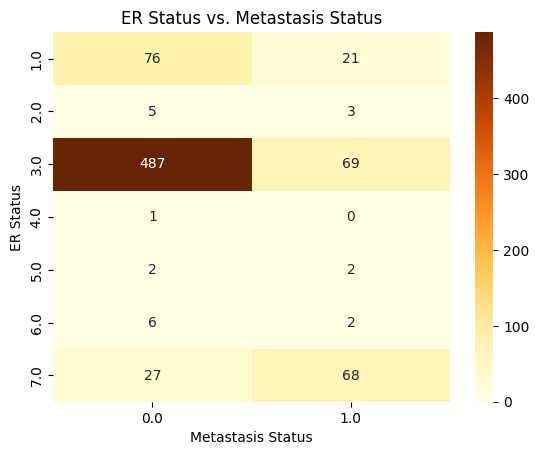

In [ ]:
# Visualizing the cross-tabulation of ER Staus and metastasis status
sns.heatmap(crosstab_er, annot=True, cmap='YlOrBr', fmt='g')
plt.title('ER Status vs. Metastasis Status')
plt.xlabel('Metastasis Status')
plt.ylabel('ER Status')
plt.show()

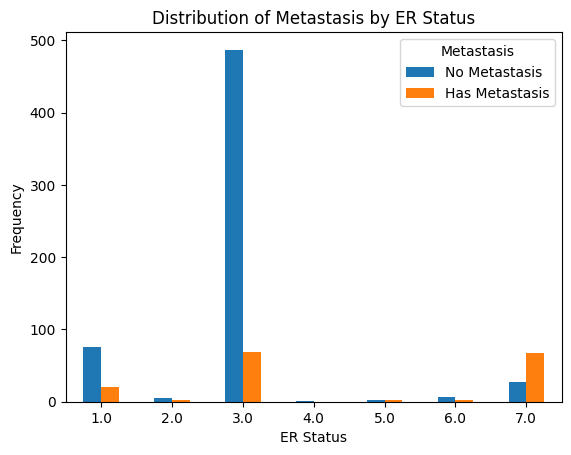

In [ ]:
#BAR Graph comparing Metastasis with ER Status

# Plotting the bar graph
crosstab_er.plot(kind='bar', stacked=False)
plt.title('Distribution of Metastasis by ER Status')
plt.xlabel('ER Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # keeps the labels on the x-axis vertical
plt.legend(title='Metastasis', labels=['No Metastasis', 'Has Metastasis'])
plt.show()


This bar graph shows the frequency of metastatic versus non-metastatic cases across various ER status categories in our breast cancer patient dataset. Notably, the 'Positive' ER status group has the highest patient count, and within this group, patients without metastasis significantly outnumber those with metastasis. While fewer in number, patients with 'Negative' and 'Not Ordered' ER status primarily do not have metastasis. The smaller categories reflect ambiguity in ER status due to equivocal test results or testing not being performed. Across all categories, the trend suggests that the majority of patients in our study do not have metastasis.

In [ ]:
# Cross Tabulation - Chemotherapy and Metastasis
crosstab_chemo = pd.crosstab(df_temp['j_breast_trt_chemo'], df_temp['j_breast_has_mets'])

print(crosstab_chemo )

j_breast_has_mets   0.0  1.0
j_breast_trt_chemo          
0.0                 402  147
1.0                  12    2
2.0                   8    1
3.0                 123    0
82.0                  6    1
86.0                  3    1
87.0                 16    4
88.0                  7    0
99.0                 27    9


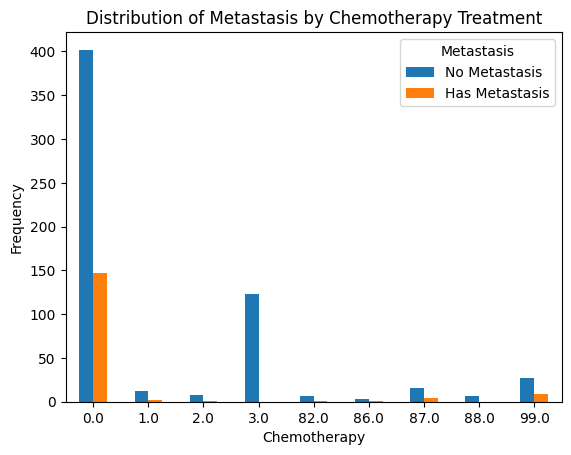

In [ ]:
#BAR Graph comparing Metastasis with Chemotherapy

# Plotting the bar graph
crosstab_chemo.plot(kind='bar', stacked=False)
plt.title('Distribution of Metastasis by Chemotherapy Treatment')
plt.xlabel('Chemotherapy')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # keeps the labels on the x-axis vertical
plt.legend(title='Metastasis', labels=['No Metastasis', 'Has Metastasis'])
plt.show()

The bar graph illustrates the relationship between chemotherapy treatment types and metastasis status in our patient cohort. The data shows that most patients did not have chemotherapy as part of their initial treatment plan, and within this group, a majority do not have metastasis. For those who did receive chemotherapy, either specified or not, the trend seems consistent – more patients without metastasis than with. Categories reflecting contraindications to chemotherapy, physician recommendations not followed, or unknown chemotherapy status due to incomplete records, encompass fewer patients, but still follow the same general trend. This visual representation suggests that within our dataset, there are more patients without metastasis across all categories of chemotherapy treatment.

Very few patients received single-agent chemotherapy (coded as '2') or multiple-agent chemotherapy (coded as '3').

In [ ]:
# Cross Tabulation - Surgery of the Primary Site Performed and Metastasis
crosstab_surg = pd.crosstab(df_temp['j_breast_trt_surg_prim_yn'], df_temp['j_breast_has_mets'])

print(crosstab_surg )

j_breast_has_mets          0.0  1.0
j_breast_trt_surg_prim_yn          
0.0                         16   14
1.0                        561  143
9.0                         27    8


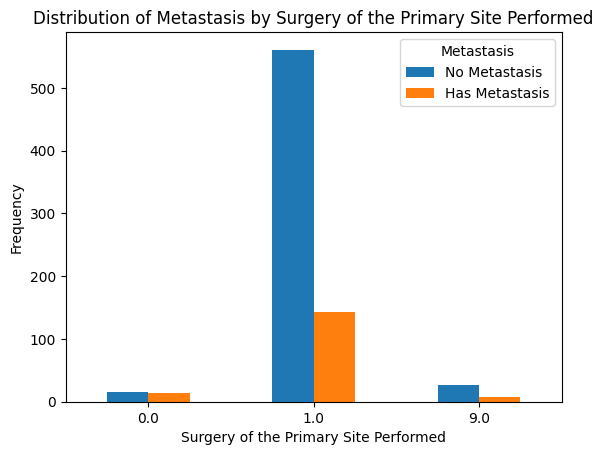

In [ ]:
#BAR Graph comparing Metastasis with Surgery of the Primary Site Performed

# Plotting the bar graph
crosstab_surg.plot(kind='bar', stacked=False)
plt.title('Distribution of Metastasis by Surgery of the Primary Site Performed')
plt.xlabel('Surgery of the Primary Site Performed')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # keeps the labels on the x-axis vertical
plt.legend(title='Metastasis', labels=['No Metastasis', 'Has Metastasis'])
plt.show()

This graph illustrates the distribution of metastatic status in our patient cohort relative to whether they had surgery at the primary cancer site. Significantly more patients underwent surgery (1.0) than those who did not(0.0), and among those who had surgery, a vast majority do not have metastasis. This suggests a potential association between surgical intervention and lower observed metastasis, although we cannot infer causality from this data alone. The small number of patients for whom the surgical status is unknown(9.0) shows a similar pattern favoring non-metastatic cases.

In [ ]:
# Cross Tabulation - HER2 Summary and Metastasis
crosstab_her2 = pd.crosstab(df_temp['j_breast_her2summ'], df_temp['j_breast_has_mets'])

print(crosstab_her2 )

j_breast_has_mets  0.0  1.0
j_breast_her2summ          
1.0                 49    8
2.0                 20    3
3.0                387   16
4.0                 14    1
5.0                134  137


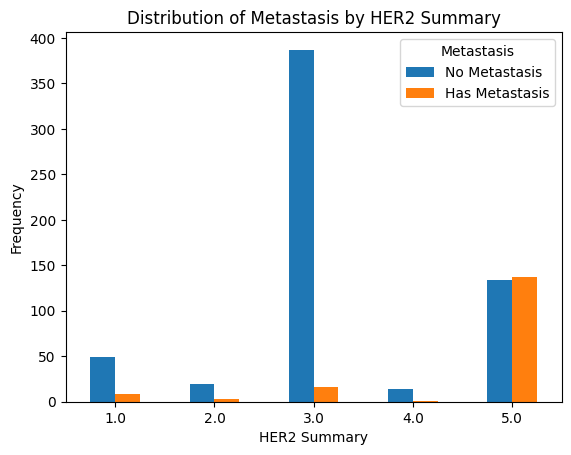

In [ ]:
#BAR Graph comparing Metastasis with HER2 Summary

# Plotting the bar graph
crosstab_her2.plot(kind='bar', stacked=False)
plt.title('Distribution of Metastasis by HER2 Summary')
plt.xlabel('HER2 Summary')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # keeps the labels on the x-axis vertical
plt.legend(title='Metastasis', labels=['No Metastasis', 'Has Metastasis'])
plt.show()

### Feature Engineering- using 2nd new dataframe: One-Hot Encoding

In [ ]:
# ONE-HOT ENCODING

categorical_vars_of_interest = ['j_breast_behavior', 'j_breast_laterality', 'j_breast_trt_brm', 'j_breast_trt_surg_prim_yn', 'j_breast_trt_chemo',
    'j_breast_trt_rad', 'j_breast_trt_horm', 'j_breast_er_status', 'j_breast_pr_status', 'j_breast_her2summ',
    'j_breast_cancer', 'marital', 'educat', 'occupat', 'race7', 'd_dth_breast', 'f_dth_breast', 'is_dead_with_cod',
    'is_dead', 'j_ph_breast_trial', 'j_breast_exitstat', 'j_ph_any_bq', 'j_breast_eligible_bq', 'j_ph_any_trial', 'center',
     'pipe', 'cigar', 'tuballig', 'bbd', 'benign_ovcyst', 'hystera', 'thorm', 'arthrit_f',
    'hispanic_f', 'hyster_f', 'ovariesr_f', 'horm_f', 'horm_stat', 'fh_cancer'
]

numeric_vars_of_interest = ['age', 'j_breast_exitage', 'j_breast_exitdays', 'bmi_20c', 'bmi_50c', 'j_entrydays_bq', 'smoked_f', 'j_fstcan_exitage', 'bq_age']

# Convert categorical variables of interest to 'category' dtype in df_temp
for var in categorical_vars_of_interest:
    df_temp[var] = df_temp[var].astype('category')

# Apply one-hot encoding ONLY to the categorical variables of interest
encoded_vars = pd.get_dummies(df_temp[categorical_vars_of_interest], drop_first=True)

# Ensure the encoded variables are of type int
encoded_vars = encoded_vars.astype(int)

# Now combine the encoded categorical variables with the numeric variables of interest
df_final = pd.concat([df_temp[numeric_vars_of_interest], encoded_vars], axis=1)

<ipython-input-55-02e801b7d1e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[var] = df_temp[var].astype('category')


- One-Hot encoding was done to convert the categorical data to binary numeric columns which makes it suitable for Machine Learning algorithms or models to understand and process. It is important because it allows the algorithm to treat each category distinctly without assuming any order between them, which could lead to better and more accurate models, especially for non-ordinal categories.


- I chose the first category as the reference category for the one-hot encoding because it allows the model to have a clear baseline for comparison. This category serves as a point of reference, so the impact of the other categories can be directly compared against it. This does not only help in preventing multicollinearity but also enhances the interpretability of the model's output.

IMPORTANT TO NOTE:

- We started with 187 columns, and after encoding, we had 122. The expected increase in columns typically associated with one-hot encoding was offset in our case by two main factors:

**Selective Encoding**: We only applied one-hot encoding to a subset of variables that were explicitly categorical, rather than the entire dataset. This focused approach prevented unnecessary expansion of our feature space.

**Drop First Strategy**: To avoid multicollinearity—a situation where predictor variables are highly correlated—we used the drop_first=True option in our encoding process. This method omits the first binary column for each categorical variable, effectively reducing the total number of columns. It's a common practice in statistical modeling to eliminate redundancy and enhance model interpretability. After one-hot encoding the categorical variables, the output was added to the original numeric variables to form the final dataframe.

In [ ]:
df_final.head()

age  j_breast_exitage  j_breast_exitdays  bmi_20c  bmi_50c  \
117   67                75               2847      2.0      3.0   
376   64                71               2806      2.0      4.0   
500   62                70               2871      2.0      3.0   
589   61                75               4845      2.0      3.0   
685   73                91               6534      2.0      2.0   

     j_entrydays_bq  smoked_f  j_fstcan_exitage  bq_age  \
117             0.0       1.0                75    67.0   
376             0.0       0.0                71    64.0   
500             0.0       1.0                70    62.0   
589            66.0       1.0                75    62.0   
685           144.0       1.0                79    74.0   

     j_breast_behavior_3.0  j_breast_laterality_2.0  j_breast_laterality_9.0  \
117                      1                        0                        0   
376                      1                        0                        0   
500                      0                        1                        0   
589                      1                        1                        0   
685                      1                        0                        0   

     j_breast_trt_brm_1.0  j_breast_trt_brm_82.0  j_breast_trt_brm_87.0  \
117                     0                      0                      0   
376                     0                      0                      0   
500                     0                      0                      0   
589                     0                      0                      0   
685                     0                      0                      0   

     j_breast_trt_brm_99.0  j_breast_trt_surg_prim_yn_1.0  \
117                      0                              1   
376                      0                              1   
500                      0                              1   
589                      0                              1   
685                      0                              1   

     j_breast_trt_surg_prim_yn_9.0  j_breast_trt_chemo_1.0  \
117                              0                       0   
376                              0                       0   
500                              0                       0   
589                              0                       0   
685                              0                       0   

     j_breast_trt_chemo_2.0  j_breast_trt_chemo_3.0  j_breast_trt_chemo_82.0  \
117                       0                       0                        0   
376                       0                       0                        0   
500                       0                       0                        0   
589                       0                       0                        0   
685                       0                       0                        0   

     j_breast_trt_chemo_86.0  j_breast_trt_chemo_87.0  \
117                        0                        0   
376                        0                        0   
500                        0                        0   
589                        0                        0   
685                        0                        0   

     j_breast_trt_chemo_88.0  j_breast_trt_chemo_99.0  j_breast_trt_rad_1.0  \
117                        1                        0                     1   
376                        0                        0                     0   
500                        0                        0                     0   
589                        0                        0                     1   
685                        0                        0                     0   

     j_breast_trt_rad_2.0  j_breast_trt_rad_3.0  j_breast_trt_rad_4.0  \
117                     0                     0                     0   
376                     1                     0                     0   
500                     0                     0          

In [ ]:
# after one-hot encoding
df_final.shape

(769, 122)

In [ ]:
df_final.columns

Index(['age', 'j_breast_exitage', 'j_breast_exitdays', 'bmi_20c', 'bmi_50c',
       'j_entrydays_bq', 'smoked_f', 'j_fstcan_exitage', 'bq_age',
       'j_breast_behavior_3.0',
       ...
       'hispanic_f_1.0', 'ovariesr_f_1.0', 'ovariesr_f_2.0', 'ovariesr_f_3.0',
       'ovariesr_f_4.0', 'ovariesr_f_5.0', 'horm_f_1.0', 'horm_stat_1.0',
       'horm_stat_2.0', 'fh_cancer_1.0'],
      dtype='object', length=122)

In [ ]:
#df_final.isnull()

In [ ]:
# df_final_numeric = df_final.select_dtypes(include=[np.number])  # This selects only the numeric columns
# df_final_numeric

In [ ]:
# Check for any null values
print("Null values in the dataframe:", df_final.isnull().sum().sum())

# Check for infinite values
print("Infinite values in the dataframe:", np.isinf(df_final).sum().sum())

# Ensure all data types are numeric
print("Data types:", df_final.dtypes.unique())


Null values in the dataframe: 0
Infinite values in the dataframe: 0
Data types: [dtype('int64') dtype('float64')]


#### Missing values AFTER any drop & encoding

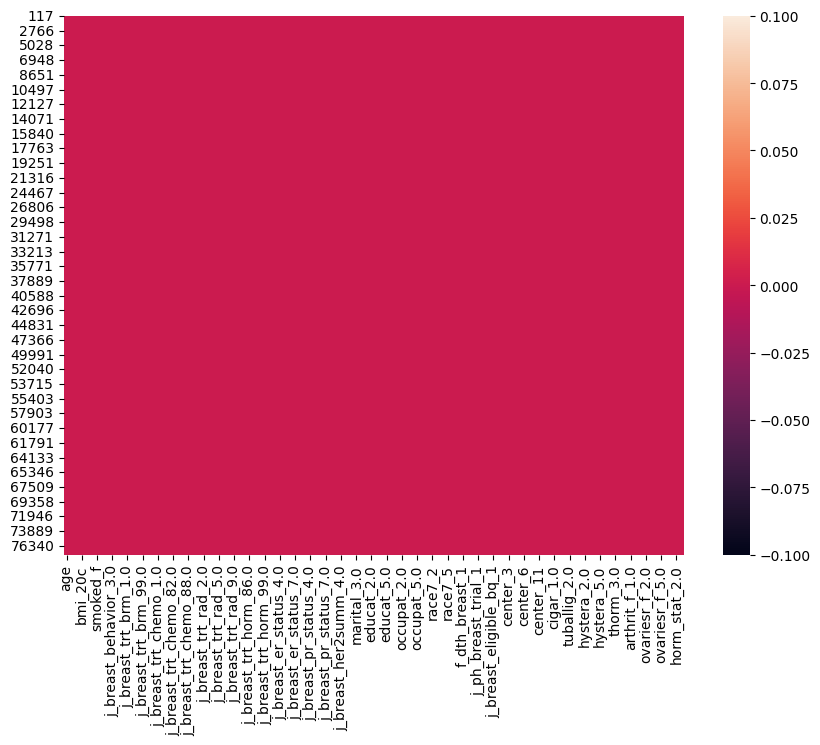

In [ ]:
# Visualizing the missing values using a heatmap after using the mean to imputate the missing values in all the numeric columns.

plt.figure(figsize = (10,7))
sns.heatmap(df_final.isnull())
plt.show()

#### VARIANCE INFLATION FACTOR (VIF)

In [ ]:
# calculating VIF scores (VARIANCE INFLATION FACTOR)

# Adding a constant
df_final_with_const = add_constant(df_final)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Feature"] = df_final_with_const.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_final_with_const.values, i) for i in range(df_final_with_const.shape[1])]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Feature         VIF
0                            const    0.000000
1                              age  597.411201
2                 j_breast_exitage  456.477643
3                j_breast_exitdays  249.357086
4                          bmi_20c    1.396384
5                          bmi_50c    1.452815
6                   j_entrydays_bq    1.923376
7                         smoked_f    1.226214
8                 j_fstcan_exitage   26.670927
9                           bq_age  586.534052
10           j_breast_behavior_3.0    2.265120
11         j_breast_laterality_2.0    1.148398
12         j_breast_laterality_9.0    1.122287
13            j_breast_trt_brm_1.0    1.525686
14           j_breast_trt_brm_82.0    1.390596
15           j_breast_trt_brm_87.0    1.560851
16           j_breast_trt_brm_99.0    7.317516
17   j_breast_trt_surg_prim_yn_1.0    2.603244
18   j_breast_trt_surg_prim_yn_9.0    4.111143
19          j_breast_trt_chemo_1.0    1.305375
20          j

NOTE: Interpreting VIF Scores:

- VIF <= 1: No correlation between predictors/ Multicollinearity.

- 1 < VIF <= 5: Moderately correlated.

- VIF > 5: Highly correlated. Some sources may suggest a higher threshold of 10.


The Variance Inflation Factor (VIF) is a measure used to detect the presence and severity of multicollinearity (where two or more predictor variables are highly correlated) in a regression model. If multicollinearity is present, it can undermine the statistical validity of the model and its interpretability. Addressing multicollinearity based on VIF can lead to more reliable and robust regression estimates.

In [ ]:
# DROPPING FEATURES WITH INFINITE (inf) VIF values

# Identify features with infinite VIF values
features_to_drop = vif_data[vif_data['VIF'] == np.inf]['Feature'].tolist()

# If 'const' is added to the list, remove it as you don't want to drop the constant term from your model
# It's common for 'const' to have a high VIF, but it's not a feature to be dropped
features_to_drop = [feature for feature in features_to_drop if feature != 'const']

# Drop features with infinite VIF values from df_final
df_final_adjusted = df_final.drop(columns=features_to_drop)

# Optionally, drop the same features from df_final_with_const if you plan to use it for further VIF calculation or modeling
df_final_with_const_adjusted = df_final_with_const.drop(columns=features_to_drop)

# You may print or inspect the dropped features and the remaining dataframe
print("Dropped features due to inf VIF:", features_to_drop)
print("Remaining features:", df_final_adjusted.columns.tolist())


Dropped features due to inf VIF: ['j_breast_er_status_5.0', 'j_breast_pr_status_5.0', 'race7_3', 'd_dth_breast_1', 'f_dth_breast_1', 'is_dead_with_cod_1', 'is_dead_1', 'j_ph_breast_trial_1', 'j_ph_breast_trial_9', 'j_ph_any_bq_1.0', 'j_breast_eligible_bq_1', 'j_ph_any_trial_1', 'pipe_2.0', 'cigar_2.0', 'hispanic_f_1.0', 'horm_f_1.0', 'horm_stat_1.0', 'horm_stat_2.0']
Remaining features: ['age', 'j_breast_exitage', 'j_breast_exitdays', 'bmi_20c', 'bmi_50c', 'j_entrydays_bq', 'smoked_f', 'j_fstcan_exitage', 'bq_age', 'j_breast_behavior_3.0', 'j_breast_laterality_2.0', 'j_breast_laterality_9.0', 'j_breast_trt_brm_1.0', 'j_breast_trt_brm_82.0', 'j_breast_trt_brm_87.0', 'j_breast_trt_brm_99.0', 'j_breast_trt_surg_prim_yn_1.0', 'j_breast_trt_surg_prim_yn_9.0', 'j_breast_trt_chemo_1.0', 'j_breast_trt_chemo_2.0', 'j_breast_trt_chemo_3.0', 'j_breast_trt_chemo_82.0', 'j_breast_trt_chemo_86.0', 'j_breast_trt_chemo_87.0', 'j_breast_trt_chemo_88.0', 'j_breast_trt_chemo_99.0', 'j_breast_trt_rad_1.0'

In [ ]:
# RECALCULATING VIF FOR THE ADJUSTED DATAFRAME

# Adding a constant to the adjusted DataFrame for VIF calculation
df_final_with_const_adjusted = add_constant(df_final_adjusted)

# Recalculate VIF for each explanatory variable in the adjusted DataFrame
vif_data_adjusted = pd.DataFrame({
    "Feature": df_final_with_const_adjusted.columns,
    "VIF": [variance_inflation_factor(df_final_with_const_adjusted.values, i) for i in range(df_final_with_const_adjusted.shape[1])]
})

# Display the recalculated VIF values
print(vif_data_adjusted)

                           Feature         VIF
0                            const  570.569741
1                              age  585.113766
2                 j_breast_exitage  451.915816
3                j_breast_exitdays  246.509178
4                          bmi_20c    1.324978
5                          bmi_50c    1.397944
6                   j_entrydays_bq    1.909114
7                         smoked_f    1.166738
8                 j_fstcan_exitage   26.357298
9                           bq_age  577.121517
10           j_breast_behavior_3.0    2.155625
11         j_breast_laterality_2.0    1.140069
12         j_breast_laterality_9.0    1.108930
13            j_breast_trt_brm_1.0    1.482940
14           j_breast_trt_brm_82.0    1.380134
15           j_breast_trt_brm_87.0    1.418578
16           j_breast_trt_brm_99.0    7.261806
17   j_breast_trt_surg_prim_yn_1.0    2.508165
18   j_breast_trt_surg_prim_yn_9.0    3.820414
19          j_breast_trt_chemo_1.0    1.287750
20          j

In [ ]:
# dropping more features

# List of variables to drop based on high VIF values
variables_to_drop = ['age', 'j_breast_exitage', 'j_breast_exitdays', 'bq_age', 'j_fstcan_exitage', 'j_breast_er_status_7.0',
                     'j_breast_er_status_6.0', 'j_breast_pr_status_6.0', 'j_breast_pr_status_7.0', 'educat_3.0', 'educat_4.0', 'educat_5.0', 'educat_6.0', 'educat_7.0',
                     'j_entrydays_bq', 'smoked_f', 'marital_2.0', 'marital_3.0', 'marital_4.0', 'marital_5.0', 'occupat_2.0', 'occupat_3.0', 'occupat_4.0', 'occupat_5.0',
                     'occupat_6.0', 'occupat_7.0', 'pipe_1.0', 'cigar_1.0', 'tuballig_1.0', 'tuballig_2.0', 'benign_ovcyst_1.0', 'hystera_2.0', 'hystera_3.0', 'hystera_4.0',
                     'hystera_5.0', 'thorm_1.0', 'thorm_2.0', 'thorm_3.0', 'thorm_4.0', 'thorm_5.0', 'arthrit_f_1.0', 'ovariesr_f_1.0', 'ovariesr_f_2.0',
                     'ovariesr_f_3.0', 'ovariesr_f_4.0', 'ovariesr_f_5.0', 'j_breast_er_status_5.0', 'j_breast_pr_status_5.0', 'race7_3', 'd_dth_breast_1',
                     'f_dth_breast_1', 'is_dead_with_cod_1', 'is_dead_1', 'j_ph_breast_trial_1', 'j_ph_breast_trial_9', 'j_ph_any_bq_1.0', 'j_breast_eligible_bq_1',
                     'j_ph_any_trial_1', 'pipe_2.0', 'cigar_2.0', 'hispanic_f_1.0', 'horm_f_1.0', 'horm_stat_1.0', 'horm_stat_2.0'
]

# Drop these variables from df_final
df_final_adjusted = df_final.drop(columns=variables_to_drop)


In [ ]:
# Adding a constant to the latest adjusted DataFrame for VIF calculation
df_final_with_const_3rd = add_constant(df_final_adjusted)

# Calculate VIF for each feature in the latest adjusted DataFrame with the constant
vif_data_3rd = pd.DataFrame({
    "Feature": df_final_with_const_3rd.columns,
    "VIF": [variance_inflation_factor(df_final_with_const_3rd.values, i) for i in range(df_final_with_const_3rd.shape[1])]
})

# Display the recalculated VIF values for the 3rd iteration
print(vif_data_3rd)

                          Feature        VIF
0                           const  91.381379
1                         bmi_20c   1.196990
2                         bmi_50c   1.202756
3           j_breast_behavior_3.0   1.865085
4         j_breast_laterality_2.0   1.072841
5         j_breast_laterality_9.0   1.057753
6            j_breast_trt_brm_1.0   1.344893
7           j_breast_trt_brm_82.0   1.340289
8           j_breast_trt_brm_87.0   1.331298
9           j_breast_trt_brm_99.0   6.620217
10  j_breast_trt_surg_prim_yn_1.0   2.409237
11  j_breast_trt_surg_prim_yn_9.0   3.528202
12         j_breast_trt_chemo_1.0   1.083446
13         j_breast_trt_chemo_2.0   1.268808
14         j_breast_trt_chemo_3.0   1.262754
15        j_breast_trt_chemo_82.0   1.191037
16        j_breast_trt_chemo_86.0   1.383651
17        j_breast_trt_chemo_87.0   1.202333
18        j_breast_trt_chemo_88.0   1.112297
19        j_breast_trt_chemo_99.0   5.916018
20           j_breast_trt_rad_1.0   1.301293
21        

#### Resetting DataFrame's Index

In [ ]:
# Reset the index of df_final_adjusted if you haven't done so already
df_final_adjusted.reset_index(drop=True, inplace=True)

In [ ]:
# Assuming target needs to be extracted and aligned post-preprocessing
target = df_temp['j_breast_has_mets'].reset_index(drop=True)

In [ ]:
# Make sure the length of target and df_final_adjusted are the same
# This is crucial for alignment. If they are not the same, further investigation is needed on how df_final_adjusted was constructed.
assert len(df_final_adjusted) == len(target)


**Why a need to reset index**:

After conducting one-hot encoding and removing variables with high VIF to address multicollinearity, we reset the DataFrame's index. This step ensures that our dataset maintains a consistent, sequential indexing system, which is crucial for data integrity and consistency. It prevents potential errors in subsequent data processing steps and simplifies referencing and analyzing the data. Resetting the index is a standard practice in data preprocessing to prepare the data for analysis, ensuring that it is in an optimal format for modeling, visualization, and interpretation.

### Chi-Square Test

In [ ]:
# CHI-SQUARE TEST

# list to store test results
chi_square_results = []

categorical_vars = [
    'j_breast_behavior', 'j_breast_laterality', 'j_breast_trt_brm', 'j_breast_trt_surg_prim_yn',
    'j_breast_trt_chemo', 'j_breast_trt_rad', 'j_breast_trt_horm', 'j_breast_er_status', 'j_breast_pr_status',
    'j_breast_her2summ', 'marital', 'educat', 'occupat', 'race7', 'center'
]

# Since your df_final_adjusted contains the one-hot encoded versions, we'll directly use the columns
for var in df_final_adjusted.columns:
    # Check if the variable is one of the original categorical variables based on the prefix
    if any(var.startswith(categorical_prefix) for categorical_prefix in categorical_vars):
        # Create a contingency table
        contingency_table = pd.crosstab(df_final_adjusted[var], target)

        # Perform the Chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Append results to the list
        chi_square_results.append({"Variable": var, "Chi-square Statistic": chi2, "P-value": p})

        # Print the results
        #print(f"Variable: {var}, Chi-square Statistic: {chi2}, P-value: {p}")

        # Convert the results into a DataFrame for easier plotting
chi_results_df_final = pd.DataFrame(chi_square_results)
chi_results_df_final

Variable  Chi-square Statistic        P-value
0           j_breast_behavior_3.0            682.021786  2.428048e-150
1         j_breast_laterality_2.0              1.563672   2.111283e-01
2         j_breast_laterality_9.0              1.456019   2.275646e-01
3            j_breast_trt_brm_1.0              0.035137   8.513098e-01
4           j_breast_trt_brm_82.0              0.217978   6.405849e-01
5           j_breast_trt_brm_87.0              0.014941   9.027149e-01
6           j_breast_trt_brm_99.0              1.588211   2.075819e-01
7   j_breast_trt_surg_prim_yn_1.0              5.689151   1.707012e-02
8   j_breast_trt_surg_prim_yn_9.0              0.000000   1.000000e+00
9          j_breast_trt_chemo_1.0              0.109616   7.405818e-01
10         j_breast_trt_chemo_2.0              0.123970   7.247680e-01
11         j_breast_trt_chemo_3.0             38.497467   5.482478e-10
12        j_breast_trt_chemo_82.0              0.000003   9.985605e-01
13        j_breast_trt_chemo_86.0              0.000000   1.000000e+00
14        j_breast_trt_chemo_87.0              0.000000   1.000000e+00
15        j_breast_trt_chemo_88.0              0.858811   3.540716e-01
16        j_breast_trt_chemo_99.0              0.104045   7.470288e-01
17           j_breast_trt_rad_1.0              5.623737   1.771883e-02
18           j_breast_trt_rad_2.0              0.208261   6.481340e-01
19           j_breast_trt_rad_3.0              0.000000   1.000000e+00
20           j_breast_trt_rad_4.0              0.000000   1.000000e+00
21           j_breast_trt_rad_5.0              0.000000   1.000000e+00
22           j_breast_trt_rad_7.0              0.041000   8.395386e-01
23           j_breast_trt_rad_8.0              0.191394   6.617593e-01
24           j_breast_trt_rad_9.0              0.125831   7.227943e-01
25          j_breast_trt_horm_1.0             41.522834   1.165022e-10
26         j_breast_trt_horm_82.0              0.710964   3.991241e-01
27         j_breast_trt_horm_86.0              0.484076   4.865820e-01
28         j_breast_trt_horm_87.0              5.922524   1.494853e-02
29         j_breast_trt_horm_88.0              1.646250   1.994701e-01
30         j_breast_trt_horm_99.0              2.096127   1.476727e-01
31         j_breast_er_status_2.0              0.460092   4.975809e-01
32         j_breast_er_status_3.0             95.548499   1.443122e-22
33         j_breast_er_status_4.0              0.000000   1.000000e+00
34         j_breast_pr_status_2.0              1.197812   2.737594e-01
35         j_breast_pr_status_3.0             57.957180   2.678860e-14
36         j_breast_pr_status_4.0              0.217978   6.405849e-01
37          j_breast_her2summ_2.0              0.547625   4.592896e-01
38          j_breast_her2summ_3.0            151.456812   8.328086e-35
39          j_breast_her2summ_4.0              1.191454   2.750365e-01
40          j_breast_her2summ_5.0            207.573248   4.648668e-47
41                     educat_2.0              0.000000   1.000000e+00
42                        race7_2              0.000000   1.000000e+00
43                        race7_4              0.031979   8.580748e-01
44                        race7_5              0.000000   1.000000e+00
45                        race7_7              0.000000   1.000000e+00
46                       center_2              0.923253   3.366222e-01
47                       center_3              0.042053   8.375181e-01
48                       center_4              0.000000   1.000000e+00
49                       center_5              1.278415   2.581939e-01
50                       center_6              1.487426   2.226163e-01
51                       center_8              1.587365   2.077030e-01
52                       center_9              1.499666   2.207228e-01
53                      center_11              0.484076   4.865820e-01

In [ ]:
# Check unique values of the target variable
print(np.unique(df_temp['j_breast_has_mets']))

# Ensure binary data type and no missing values
y = df_temp['j_breast_has_mets'].dropna().astype(int)
print(y.value_counts())

# Check for any values outside of 0 and 1
if not y.isin([0, 1]).all():
    raise ValueError("Target variable must be binary (0 or 1).")

[0. 1.]
j_breast_has_mets
0    604
1    165
Name: count, dtype: int64


In [ ]:
# Reset the index of df_final_adjusted if you haven't done so already
df_final_adjusted.reset_index(drop=True, inplace=True)

In [ ]:
# Assuming target needs to be extracted and aligned post-preprocessing
target = df_temp['j_breast_has_mets'].reset_index(drop=True)

In [ ]:
# Make sure the length of target and df_final_adjusted are the same
# This is crucial for alignment. If they are not the same, further investigation is needed on how df_final_adjusted was constructed.
assert len(df_final_adjusted) == len(target)


### Univariate Analysis

In [ ]:
# Scale your predictors (features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_final_adjusted)
df_scaled = pd.DataFrame(scaled_features, index=df_final_adjusted.index, columns=df_final_adjusted.columns)

for predictor in df_scaled.columns:
    # Define the predictor variables with a constand added
    X_stat = sm.add_constant(df_scaled[[predictor]])  # Adds a constant term to the predictor

    # Fit the logistic regression model
    model_stat = sm.Logit(target, X_stat).fit(disp=0)  # disp=0 suppresses the fit summary

    # Print out the summary for each model
    print(f'Results for {predictor}:')
    print(model_stat.summary())
    print("\n\n")  # Print newlines for readability between outputs

Results for bmi_20c:
                           Logit Regression Results                           
Dep. Variable:      j_breast_has_mets   No. Observations:                  769
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:               0.0001938
Time:                        00:54:19   Log-Likelihood:                -399.76
converged:                       True   LL-Null:                       -399.84
Covariance Type:            nonrobust   LLR p-value:                    0.6938
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2980      0.088    -14.772      0.000      -1.470      -1.126
bmi_20c       -0.0347      0.088     -0.393      0.694      -0.208       0.138



Results for bmi_50c:
       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:      j_breast_has_mets   No. Observations:                  769
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:               0.0009895
Time:                        00:54:19   Log-Likelihood:                -399.44
converged:                       True   LL-Null:                       -399.84
Covariance Type:            nonrobust   LLR p-value:                    0.3737
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2987      0.088    -14.772      0.000      -1.471      -1.126
j_breast_trt_brm_87.0     0.0663      0.072      0.919      0.358      -0.075       0.208



Resul

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:      j_breast_has_mets   No. Observations:                  769
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                0.007646
Time:                        00:54:20   Log-Likelihood:                -396.78
converged:                       True   LL-Null:                       -399.84
Covariance Type:            nonrobust   LLR p-value:                   0.01341
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3114      0.089    -14.751      0.000      -1.486      -1.137
j_breast_trt_rad_1.0    -0.2200      0.090     -2.449      0.014      -0.396      -0.044



Results f

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

                           Logit Regression Results                           
Dep. Variable:      j_breast_has_mets   No. Observations:                  769
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:               0.0003467
Time:                        00:54:20   Log-Likelihood:                -399.70
converged:                       True   LL-Null:                       -399.84
Covariance Type:            nonrobust   LLR p-value:                    0.5985
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2982      0.088    -14.772      0.000      -1.470      -1.126
j_breast_trt_rad_9.0     0.0449      0.084      0.534      0.593      -0.120       0.210



Results f

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:      j_breast_has_mets   No. Observations:                  769
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                0.001348
Time:                        00:54:20   Log-Likelihood:                -399.30
converged:                       True   LL-Null:                       -399.84
Covariance Type:            nonrobust   LLR p-value:                    0.2992
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2994      0.088    -14.772      0.000      -1.472      -1.127
j_breast_er_status_2.0     0.0809      0.075      1.083      0.279      -0.065       0.227



R

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:      j_breast_has_mets   No. Observations:                  769
Model:                          Logit   Df Residuals:                      767
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                0.001936
Time:                        00:54:21   Log-Likelihood:                -399.06
converged:                       True   LL-Null:                       -399.84
Covariance Type:            nonrobust   LLR p-value:                    0.2134
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3012      0.088    -14.766      0.000      -1.474      -1.128
center_5      -0.1120      0.091     -1.228      0.220      -0.291       0.067



Results for center_6:
                           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We chose to perform a chi-square test to examine the relationship between our categorical variables. The chi-square test is the most appropriate statistical method for determining if there's a significant association between these types of variables.


 Based on the chi-square test, these are the only significant variables:

 - j_breast_behavior_3.0

- j_breast_trt_surg_prim_yn_1.0

- j_breast_trt_chemo_3.0

- j_breast_trt_rad_1.0

- j_breast_trt_horm_1.0

- j_breast_trt_horm_87.0

- j_breast_er_status_3.0

- j_breast_pr_status_3.0

- j_breast_her2summ_3.0

- j_breast_her2summ_5.0

# SUPERVISED LEARNING

## Logistic Regresssion

In [ ]:
# Using the significant variables from the chi-square for my Logistic regression

significant_vars = ['j_breast_behavior_3.0', 'j_breast_trt_surg_prim_yn_1.0', 'j_breast_trt_chemo_3.0', 'j_breast_trt_rad_1.0', 'j_breast_trt_horm_1.0',
                    'j_breast_trt_horm_87.0', 'j_breast_er_status_3.0', 'j_breast_pr_status_3.0', 'j_breast_her2summ_3.0', 'j_breast_her2summ_5.0']

In [ ]:
# Filtering df_final_adjusted to only include the significant varaibles

df_final_significant = df_final_adjusted[significant_vars]

In [ ]:
# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)  # Retain column names after scaling

##### Statsmodel

In [ ]:
# Performing Logistic regression with Statsmodel on significant variables

# Adding a constant for logistic regression
features_with_const_scaled_significant = sm.add_constant(features_scaled_significant_df)

# Fit the logistic regression model using statsmodels
model_significant = sm.Logit(target, features_with_const_scaled_significant)
result_significant = model_significant.fit(maxiter=10000)  # Adjust maxiter as needed

# Display summary
print(result_significant.summary())

         Current function value: 0.064953
         Iterations: 10000
                           Logit Regression Results                           
Dep. Variable:      j_breast_has_mets   No. Observations:                  769
Model:                          Logit   Df Residuals:                      758
Method:                           MLE   Df Model:                           10
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                  0.8751
Time:                        00:54:23   Log-Likelihood:                -49.949
converged:                      False   LL-Null:                       -399.84
Covariance Type:            nonrobust   LLR p-value:                7.025e-144
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -12.2876        nan        nan        nan         nan         nan
j_bre

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


NOTE:

The larger the absolute value of the coefficient, the more significant the feature is in predicting the outcome. Positive coefficients increase the log-odds of the response variable for a one-unit increase in the feature, while negative coefficients decrease it.

Observation:

j_breast_trt_surg_prim_yn represents "was the surgery of the primary site performed". It having a low p-value of 0.001 shows its statistically significant. Also, it having a coefficient of -0.6788 suggest that this feature negatively influences the likelihood of metastasis.

For instance as 'j_breast_trt_chemo_3.0 increases, the log odds of the dependent variable decrease, implying that higher values of this variable are associated with a lower likelihood of the event occurring .

##### Train Test Split- Logistic

In [ ]:
# Splitting the data into training and testing sets
#X1_train, X1_test, y1_train, y1_test = train_test_split(features_scaled_significant_df, target, test_size=0.2, random_state=100)
X1_train, X1_test, y1_train, y1_test = train_test_split(features_scaled_significant_df, target, test_size=0.2, random_state=100)

## **** you might want to scale it to 'features_scaled_significant_df' - since that was scaled and NOT 'df_final_significant**********

##### First Evaluation Matrix- Logistic

In [ ]:
# FIRST EVALUATION MATRIX ONLY FOR THE SIGNIFICANT VARIABLES WITHOUT REGULARIZATION

## IMPORTANT STEPS:
# Step 1
# You use logistic_model.fit(X1_train, y1_train) to train the logistic regression model on your training data. This process involves finding the coefficients (parameters)
#for the logistic regression equation that best fit your data.

# step 2
# After training, you use the trained model to make predictions on new, unseen data (the test set, X1_test) using logistic_model.predict(X1_test).

# Step 3
# Finally, you evaluate the model's performance using the actual outcomes (y1_test) and the predicted outcomes (y1_pred) from the model.
#You typically use metrics like the confusion matrix and classification report for this evaluation.


 #Logistic Regression
logistic_model = LogisticRegression(max_iter=5000, random_state=100)
logistic_model.fit(X1_train, y1_train)

# Predictions
y1_pred = logistic_model.predict(X1_test)

# Viewing Predictions
print("Predictions:", y1_pred)

# F1 Score and Confusion Matrix
print("Classification Report:\n", classification_report(y1_test, y1_pred))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))

Predictions: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154

Confusion Matrix:
 [[118   0]
 [  5  31]]


- **Precision** tells you the proportion of positive identifications that were actually correct.

- **Recall** shows the proportion of actual positives that were correctly identified.

- **F1-score** provides a single metric that balances both precision and recall, useful when you want to capture the trade-offs between them.

- **Confusion Matrix** gives a detailed breakdown of correct and incorrect classifications for each class.


Precision:
For class 0: 0.96 and for class 1: 1.00, indicating a very high level of correctness in predictions.

Recall:
For class 0: 1.00, perfect at identifying no metastasis cases.
For class 1: 0.86, slightly higher than KNN in identifying metastasis cases.

F1-Score: 0.98 for class 0 and 0.93 for class 1, indicating a very balanced and high performance.

Accuracy: 97%, slightly higher than KNN.

**Confusion Matrix**:

Top-Left (**118**): True Negatives (TN) - correctly predicted no metastasis.

Top-Right (**0**): False Positives (FP) - incorrectly predicted metastasis (where there was none).

Bottom-Left (**5**): False Negatives (FN) - incorrectly predicted no metastasis (where there was metastasis).

Bottom-Right (**31**): True Positives (TP) - correctly predicted metastasis.

##### Elastic Net- Logistic

In [ ]:
# ELASTIC NET SETUP

# Logistic Regression model with Elastic Net regularization
logistic_model_enet = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000, random_state=100)

##### GridSearchCV- Logistic

In [ ]:
# GRIDSEARCHCV

# Parameters for GridSearchCV
parameters = {
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1],  # Mix of L1 and L2
    'C': [0.1, 0.5, 1, 5, 10]  # Inverse of regularization strength
}

# Using GridSearchCV to find the best parameters for Logistic Regression with Elastic Net
grid_search = GridSearchCV(estimator=logistic_model_enet, param_grid=parameters, scoring='roc_auc', cv=5)
grid_search.fit(X1_train, y1_train)

# Best parameters and model
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_parameters)

Best parameters found: {'C': 10, 'l1_ratio': 0.9}


- The C parameter is the inverse of regularization strength. A smaller C signifies stronger regularization. The optimal parameters for our logistic regression model, determined through an exhaustive search, indicate a preference for weaker overall regularization (C = 10), allowing the model to fit closely to our training data and capture more complex patterns.

- The l1_ratio indicates the balance between L1 (Lasso) and L2 (Ridge) regularization in the Elastic Net approach. An l1_ratio of 0.9 suggests that the model heavily favors L1 regularization (90% L1 and 10% L2). The model predominantly utilizes L1 regularization (l1_ratio = 0.9), emphasizing feature selection. This approach helps in focusing on the most significant predictors while reducing the model's complexity by eliminating less important features. Essentially, it's like the model is telling us which factors are most critical in influencing the outcome, by pushing the coefficients of less important features to zero.

##### Second Evaluation Matrix- Logistic

In [ ]:
# SECOND EVALUATION MATRIX ONLY FOR THE SIGNIFICANT VARIABLES WITH REGULARIZATION (Elastic Net with GridsearchCV)

# Using X1_test (unseen data for the model) for both the first and second evaluation matrices ensures that you are comparing the performance of the two models
 #(the original logistic regression model and the Elastic Net regularized model) on the same data.

# Predictions
y2_pred = best_model.predict(X1_test)

# Convert probabilities to class labels based on a threshold, e.g., 0.5
# This step is necessary if your model's output is continuous (regression-like) and you need binary classes
# For Elastic Net, which is typically used for regression, you might need to convert the output to binary (0 or 1) for classification purposes
y2_pred_class = [1 if prob > 0.5 else 0 for prob in y2_pred]

# Second Evaluation Matrix
print("Second Evaluation Matrix:")
print("Classification Report:\n", classification_report(y1_test, y2_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y2_pred_class))

Second Evaluation Matrix:
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154

Confusion Matrix:
 [[118   0]
 [  5  31]]


Observation:

Similar results between the first and second evaluations suggest that the additional complexity introduced by the Elastic Net regularization did not significantly change the model's ability to generalize to the test data. It could also indicate that the original logistic regression model was already performing optimally for the given data and task.

In other words, regularization in Elastic Net didn't drastically alter the predictive power of your model. Since both models have same results, it could mean that either your logistic regression model was already well-regularized, or that the features in your model did not suffer much from multicollinearity or overfitting issues that regularization specifically aims to address.

######Confusion Matrix plot- Logistic

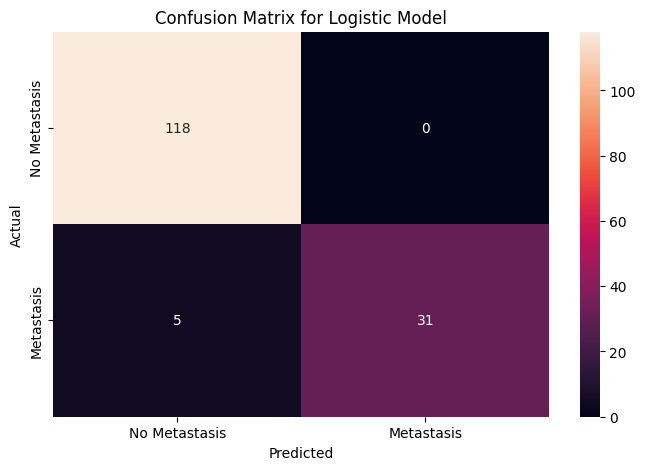

In [ ]:
# Visualizing Confusion Matrix

cm_log = confusion_matrix(y1_test, y2_pred_class)

plt.figure(figsize=(8,5))
sns.heatmap(cm_log, annot=True,
            fmt='.0f',
            xticklabels = ['No Metastasis', 'Metastasis'],
            yticklabels = ['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Model')
plt.show()

**Confusion Matrix**:

Top-Left (**118**): True Negatives (TN) - correctly predicted no metastasis. They were "actual no" and model also predicted "no".

Top-Right (**0**): False Positives (FP) - incorrectly predicted metastasis (where there was none).

Bottom-Left (**5**): False Negatives (FN) - incorrectly predicted no metastasis (where there was metastasis). They were "actual yes" and model predicted "no".

Bottom-Right (**31**): True Positives (TP) - correctly predicted metastasis. They were "actual yes" and model also predicted "yes".

***The model made 154 predictions. Out of the 154 cases, the classifier predicted "Yes Metastasis"- 36x and "No Metastasis"- 118x. ***

In [ ]:
# Checking the feature values in the dataframe containing the significant values used in hte model training

features_scaled_significant_df.head()

j_breast_behavior_3.0  j_breast_trt_surg_prim_yn_1.0  \
0               0.494304                       0.303858   
1               0.494304                       0.303858   
2              -2.023046                       0.303858   
3               0.494304                       0.303858   
4               0.494304                       0.303858   

   j_breast_trt_chemo_3.0  j_breast_trt_rad_1.0  j_breast_trt_horm_1.0  \
0               -0.436351              1.082736              -0.996106   
1               -0.436351             -0.923587               1.003909   
2               -0.436351             -0.923587              -0.996106   
3               -0.436351              1.082736              -0.996106   
4               -0.436351             -0.923587              -0.996106   

   j_breast_trt_horm_87.0  j_breast_er_status_3.0  j_breast_pr_status_3.0  \
0               -0.197963                0.618945                0.826265   
1               -0.197963                0.618945                0.826265   
2               -0.197963                0.618945               -1.210266   
3               -0.197963                0.618945                0.826265   
4               -0.197963                0.618945                0.826265   

   j_breast_her2summ_3.0  j_breast_her2summ_5.0  
0               0.952989              -0.737683  
1               0.952989              -0.737683  
2               0.952989              -0.737683  
3               0.952989              -0.737683  
4               0.952989              -0.737683

In [ ]:
X1_train.head()

j_breast_behavior_3.0  j_breast_trt_surg_prim_yn_1.0  \
116               0.494304                       0.303858   
244              -2.023046                       0.303858   
69               -2.023046                       0.303858   
85                0.494304                       0.303858   
195               0.494304                       0.303858   

     j_breast_trt_chemo_3.0  j_breast_trt_rad_1.0  j_breast_trt_horm_1.0  \
116               -0.436351             -0.923587               1.003909   
244               -0.436351              1.082736              -0.996106   
69                -0.436351             -0.923587               1.003909   
85                -0.436351              1.082736               1.003909   
195               -0.436351             -0.923587               1.003909   

     j_breast_trt_horm_87.0  j_breast_er_status_3.0  j_breast_pr_status_3.0  \
116               -0.197963                0.618945                0.826265   
244               -0.197963                0.618945                0.826265   
69                -0.197963                0.618945                0.826265   
85                -0.197963                0.618945                0.826265   
195               -0.197963                0.618945                0.826265   

     j_breast_her2summ_3.0  j_breast_her2summ_5.0  
116               0.952989              -0.737683  
244              -1.049330              -0.737683  
69               -1.049330               1.355595  
85               -1.049330               1.355595  
195               0.952989              -0.737683

In [ ]:
X1_train.shape

(615, 10)

In [ ]:
X1_test.head()

j_breast_behavior_3.0  j_breast_trt_surg_prim_yn_1.0  \
567               0.494304                       0.303858   
19                0.494304                       0.303858   
48                0.494304                       0.303858   
726              -2.023046                      -3.291013   
455               0.494304                       0.303858   

     j_breast_trt_chemo_3.0  j_breast_trt_rad_1.0  j_breast_trt_horm_1.0  \
567               -0.436351              1.082736              -0.996106   
19                -0.436351              1.082736              -0.996106   
48                -0.436351             -0.923587               1.003909   
726               -0.436351             -0.923587              -0.996106   
455                2.291731              1.082736               1.003909   

     j_breast_trt_horm_87.0  j_breast_er_status_3.0  j_breast_pr_status_3.0  \
567               -0.197963                0.618945                0.826265   
19                -0.197963               -1.615651               -1.210266   
48                -0.197963                0.618945                0.826265   
726               -0.197963               -1.615651               -1.210266   
455               -0.197963                0.618945                0.826265   

     j_breast_her2summ_3.0  j_breast_her2summ_5.0  
567               0.952989              -0.737683  
19                0.952989              -0.737683  
48                0.952989              -0.737683  
726              -1.049330               1.355595  
455               0.952989              -0.737683

##### Predicting Outcomes- Logistic

###### Data Retrieval for Analysis

In [ ]:
# This is retrieving the entire first row of the training data DataFrame X1_train
X1_train.iloc[0]

j_breast_behavior_3.0            0.494304
j_breast_trt_surg_prim_yn_1.0    0.303858
j_breast_trt_chemo_3.0          -0.436351
j_breast_trt_rad_1.0            -0.923587
j_breast_trt_horm_1.0            1.003909
j_breast_trt_horm_87.0          -0.197963
j_breast_er_status_3.0           0.618945
j_breast_pr_status_3.0           0.826265
j_breast_her2summ_3.0            0.952989
j_breast_her2summ_5.0           -0.737683
Name: 116, dtype: float64

In [ ]:
# retrieves the value of the target variable for the first data point in your training data.
y1_train.iloc[0]

0.0

In [ ]:
# This retrieves the second row of test test data
X1_test.iloc[1]

j_breast_behavior_3.0            0.494304
j_breast_trt_surg_prim_yn_1.0    0.303858
j_breast_trt_chemo_3.0          -0.436351
j_breast_trt_rad_1.0             1.082736
j_breast_trt_horm_1.0           -0.996106
j_breast_trt_horm_87.0          -0.197963
j_breast_er_status_3.0          -1.615651
j_breast_pr_status_3.0          -1.210266
j_breast_her2summ_3.0            0.952989
j_breast_her2summ_5.0           -0.737683
Name: 19, dtype: float64

In [ ]:
# This is retrieving the value of the target variable for the second row (index 1) of the test dataset.
y1_test.iloc[1]

0.0

###### PREPARING NEW DATA FOR PREDICTIONS

In [ ]:
# PREPARING NEW DATA FOR PREDICTIONS

# New data (makING sure it has the same order and number of features as features_scaled_significant_df)
new_data = [1,1,0,1,0,0,1,1,1,0]  # Filling with actual new data values

# Create a dataframe for the new data
new_data_df = pd.DataFrame([new_data], columns=features_scaled_significant_df.columns)

# Scale the new data using the same scaler used on df_final_significant
new_data_scaled = scaler.transform(new_data_df)

###### Predicting with the Model

In [ ]:
# Predict with your model
prediction = best_model.predict(new_data_scaled)
print("Prediction for new data:", prediction)

Prediction for new data: [0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The prediction is giving a continuous output because since i applied Elastic net for regularization, Elastic Net is primarily a regression model, which gives a continuous output. Since my target variable is binary, my model should also predict a binary outcome.

To interpret this as binary, i would apply a threshold. Typically, a threshold of 0.5 is used, where values below 0.5 are interpreted as 0 (no metastasis) and values above 0.5 as 1 (metastasis).

###### Converting and Displaying Predictions

In [ ]:
# Convert continuous prediction to binary outcome
binary_prediction = int(prediction[0] >= 0.5)
print("Predicted binary outcome for metastasis:", binary_prediction)


Predicted binary outcome for metastasis: 0


NOTE:

For each prediction, i need to provide values for all the features that the model was trained on. This is because my model expects the same structure of data for prediction as it was trained on.

The prediction i received, 'Predicted binary outcome for metastasis: 0', means that based on the values 1 provided for the 10 features, the model predicts that there is no metastasis (metastasis = 0). For testing purposes, i put in the values of the first observation or row for all 10 features.

- This prediction is the model's way of saying, given the current state of these 10 features, the likelihood of metastasis occurring is low enough (below the threshold of 0.5) to predict a "no" for metastasis.

### ROC/AUC Curve- 1st Eval Matrix- Logistic

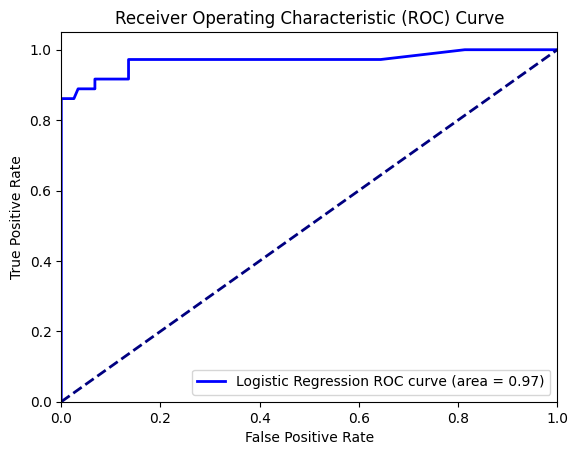

In [ ]:
# Receiver Operating Characteristic (ROC) curve & the Area Under the Curve (AUC)

# ROC/AUC curve for the Logistic regression model (FIRST EVALUATION MATRIX)
# ROC curve is designed to evaluate the model's performance across all possible classification thresholds, which is inherently probabilistic.

# Get probability estimates for Logistic Regression
y1_pred_prob = logistic_model.predict_proba(X1_test)[:, 1]

# Compute ROC curve and ROC area for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y1_test, y1_pred_prob)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Plot the ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

NOTE:

- **This ROC curve showcases the strong performance of our initial logistic regression model, with an AUC of 0.97. Such a high value indicates that the model has a superior predictive accuracy, with a significant ability to correctly classify the positive and negative cases. It means that the probability scores generated by our model are highly effective at separating the two classes, which is essential for reliable predictions. With an AUC so close to 1, we can have confidence in the model's discriminative power.**

The "climbing steps" pattern indicates how the model's sensitivity and specificity trade off at different thresholds. The curve climbing quickly towards the top-left corner indicates good model performance.

Being above 0.8 throughout suggests that the model maintains a high true positive rate even as the false positive rate changes.

### ROC/AUC Curve- 2nd Eval Matrix- Logistic

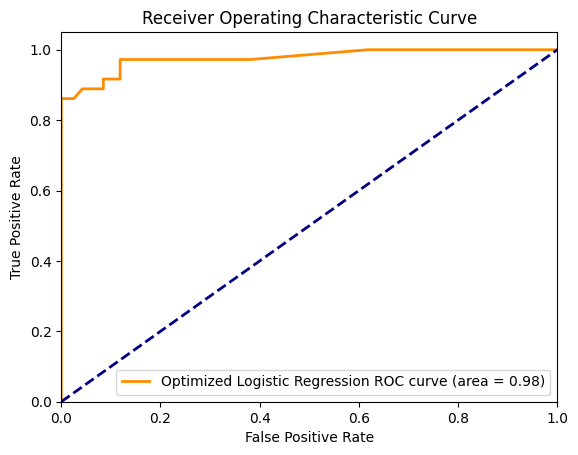

In [ ]:
# Predict probabilities for the test data with the best model
y2_pred_prob = best_model.predict_proba(X1_test)[:, 1]

# Compute ROC curve and ROC area for the optimized model
fpr_logistic_best, tpr_logistic_best, _ = roc_curve(y1_test, y2_pred_prob)
roc_auc_logistic_best = auc(fpr_logistic_best, tpr_logistic_best)

# Plot the ROC curve for the optimized logistic regression model
plt.figure()
plt.plot(fpr_logistic_best, tpr_logistic_best, color='darkorange', lw=2,
         label='Optimized Logistic Regression ROC curve (area = %0.2f)' % roc_auc_logistic_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

NOTE:

When interpreting ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) curves, we are essentially looking at how well the model can distinguish between two classes (in my case, metastasis vs. no metastasis).

ROC Curve- The curve shows the trade-off between sensitivity and specificity.

AUC Curve- Represents the area under the ROC curve and ranges from 0 to 1. A higher AUC indicates a better model performance, with 1 being perfect discrimination and 0.5 representing a random guess.

- **This ROC curve represents the performance of our optimized logistic regression model after applying Elastic Net regularization. The AUC of 0.98 is very close to 1, which indicates an excellent ability to distinguish between the positive and negative classes. Practically, this means the model is highly effective at predicting the correct class with a low rate of false positives and false negatives. Such a high AUC value suggests that the model can be very reliable for our classification purposes.**

## K Nearest Neighbors (KNN)

In [ ]:
# Standardization of significant features

# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### Train Test Split- KNN

In [ ]:
# Train_Test Split and scaling for KNN

# Target variable is stored in df_temp
y = df_temp['j_breast_has_mets']

X2_train, X2_test, y2_train, y2_test = train_test_split(features_scaled_significant_df, y, test_size=0.2, random_state=100)


##### First Evaluation Matrix- KNN

In [ ]:
# FIRST MODEL EVALUATION FOR KNN

# Initialize the KNN classifier with default parameters
knn = KNeighborsClassifier()

# Fit the model using the training data
knn.fit(X2_train, y2_train)

# Predict on the test data
y2_pred = knn.predict(X2_test)

# Calculate and print the classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred))

# Calculate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       118
         1.0       1.00      0.83      0.91        36

    accuracy                           0.96       154
   macro avg       0.98      0.92      0.94       154
weighted avg       0.96      0.96      0.96       154

Confusion Matrix:
[[118   0]
 [  6  30]]


##### Elbow Method-KNN

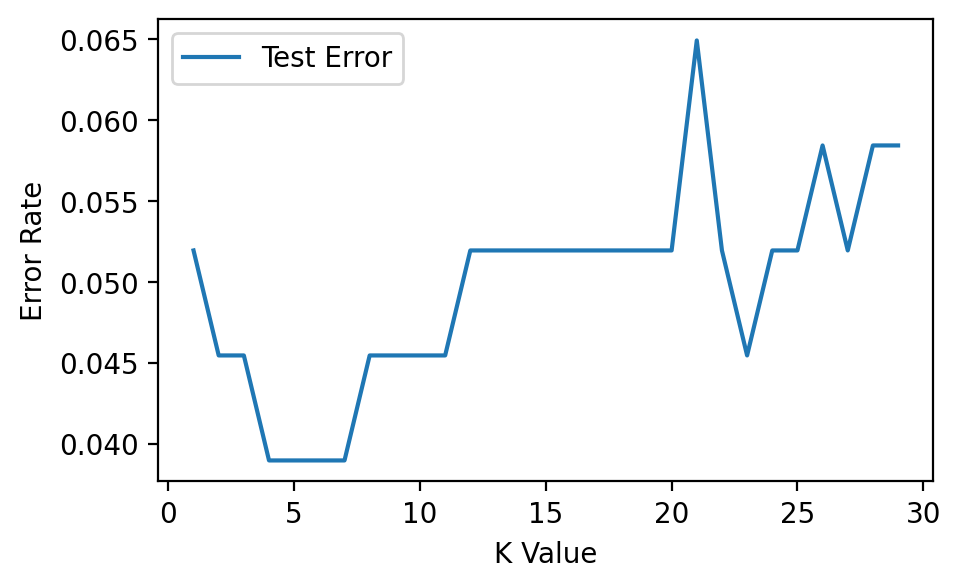

In [ ]:
# Elbow Method for Choosing Reasonable K Values

# Using scaled data
error_rates = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    pred_k = knn.predict(X2_test)
    error = 1 - accuracy_score(y2_test, pred_k)
    error_rates.append(error)

plt.figure(figsize=(5, 3), dpi=200)
plt.plot(range(1, 30), error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.show()

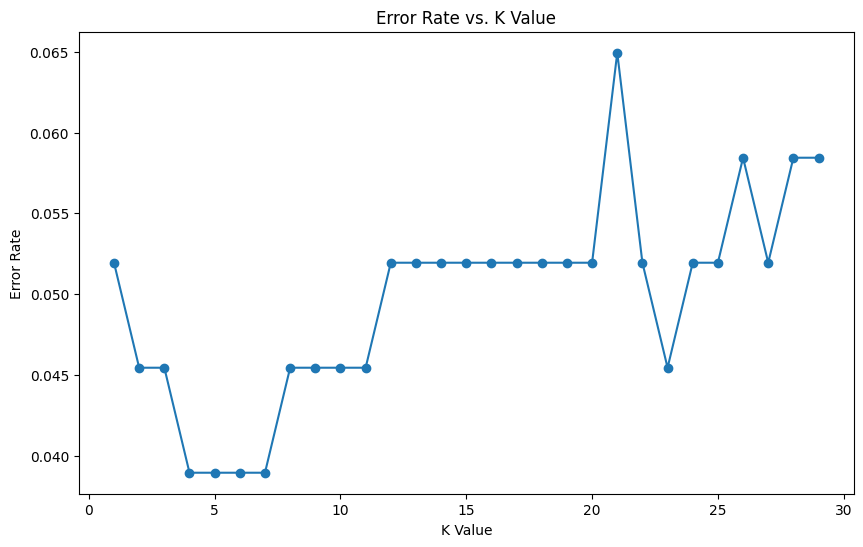

In [ ]:
# Elbow Method for Choosing Reasonable K Values

# Using scaled data
error_rates = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    pred_k = knn.predict(X2_test)
    error = np.mean(pred_k != y2_test)
    error_rates.append(error)

# Plot the error rates to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rates, linestyle='-', marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()


Starting from k=1, as k increases, the error rate quickly decreases, reaching a minimum around k=5. After the initial decline, from about k=5 to k=15, the error rate remains relatively constant with some minor fluctuations. This indicates that in this range, the model's generalization error doesn't significantly improve as k increases. In other words, further increases in k does not substantially improve model performance.

The error rate plot from the elbow method indicates that k=5 might be the optimal number of neighbors for our KNN model. It's low enough to capture the local structure of the data yet not so low that the model is too sensitive to noise.


In [ ]:
# Initial Model Training

## Using k=5 since that was a reasonable k from our plot to start with.

# Evaluating this model's performance
knn_initial = KNeighborsClassifier(n_neighbors=5)
knn_initial.fit(X2_train, y2_train)

KNeighborsClassifier()

##### Pipeline- KNN

In [ ]:
# PIPELINE

# Cell 1: Setting up the pipeline
# Define the pipeline steps
pipeline_steps = [
    ('scaler', StandardScaler()),  # Ensures features are on the same scale
    ('knn', KNeighborsClassifier())  # Placeholder for KNN, actual params will be determined by GridSearchCV
]

# Create the pipeline
pipeline = Pipeline(pipeline_steps)

##### GridSearchCV- KNN

In [ ]:
# GRIDSEARCHCV

# Since k=5 is a good candidate, its better to search in a range around this value.
# For instance, might choose to search from k=1 to k=10 or k=1 to k=20 to ensure we are not missing a potentially better k value.


# Conducting GridSearchCV to find the best KNN parameters
# Define the range of k values you want to test
k_values = list(range(1, 21))  # Up to 20

# Parameter grid for GridSearchCV referencing the pipeline step names
param_grid = {'knn__n_neighbors': k_values}

# Create and fit the GridSearchCV object
knn_gscv = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
knn_gscv.fit(X2_train, y2_train)

# Output the results
print("Best parameters:", knn_gscv.best_params_) # gscv - GridSearchCV
print("Best score:", knn_gscv.best_score_)

Best parameters: {'knn__n_neighbors': 1}
Best score: 0.9853658536585366


'n_neighbors': 1: This suggests that the KNN classifier performs best when it considers the closest single neighbor to make its predictions. this means that even one neighbor can make a correct prediction most of the time.

Best score of 0.9853658536585366: This score is derived from the cross-validation process within GridSearchCV and represents the average accuracy across all folds. An accuracy of over 98% is excellent and suggests that the model has a very high predictive capability for the data it was trained and validated on.

In [ ]:
k_values = list(range(1, 21))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
# Conducting a Gridsearch to find the best parameters
full_cv_classifier = GridSearchCV(pipeline,param_grid,cv=5,scoring='accuracy')

In [ ]:
# Fit the GridSearchCV object to the training data to perform the grid search
full_cv_classifier.fit(X2_train,y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='accuracy')

In [ ]:
# To inspect the best parameters
print("Best Estimator Parameters:")
print(full_cv_classifier.best_estimator_.get_params())

Best Estimator Parameters:
{'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=1))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=1), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}


In [ ]:
# To inspect all results keys
print("Keys in cv_results:")
print(full_cv_classifier.cv_results_.keys())


Keys in cv_results:
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [ ]:
# To inspect mean test scores
print("Mean Test Scores:")
print(full_cv_classifier.cv_results_['mean_test_score'])

Mean Test Scores:
[0.98536585 0.97723577 0.97398374 0.97073171 0.96910569 0.96910569
 0.97073171 0.97235772 0.97560976 0.97398374 0.97886179 0.97886179
 0.9804878  0.96422764 0.97560976 0.96910569 0.96910569 0.95934959
 0.95934959 0.95772358]


##### Second Evaluation Matrix after GridSearchCV- KNN

In [ ]:
# Final Model Training for KNN

# Make predictions with the best model found by GridSearchCV on the test data
final_predictions = full_cv_classifier.predict(X2_test)

# Print out classification report and accuracy score
print("Classification Report:")
print(classification_report(y2_test, final_predictions))

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y2_test, final_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       118
         1.0       0.94      0.83      0.88        36

    accuracy                           0.95       154
   macro avg       0.94      0.91      0.92       154
weighted avg       0.95      0.95      0.95       154

Confusion Matrix:
[[116   2]
 [  6  30]]


Precision:
For class 0 (no metastasis): 0.95 indicates the model is correct 95% of the time when it predicts no metastasis.

For class 1 (metastasis): 0.94 shows the model is correct 94% of the time when it predicts metastasis.

Recall:
For class 0: 0.98 means 98% of the actual no metastasis cases were correctly identified.

For class 1: 0.83 indicates 83% of the actual metastasis cases were correctly identified.

F1-Score: Harmonic mean of precision and recall, with 0.97 for class 0 and 0.88 for class 1, indicating overall balance between precision and recall for each class.

Support: Number of actual occurrences of each class in the dataset, 118 for class 0 and 36 for class 1.

Accuracy: Overall, 95% of predictions were correct.

Confusion Matrix:
116 true negatives (correctly predicted no metastasis)
2 false positives (incorrectly predicted as metastasis)
6 false negatives (incorrectly predicted as no metastasis)
30 true positives (correctly predicted metastasis)

######Confusion Matrix plot- KNN

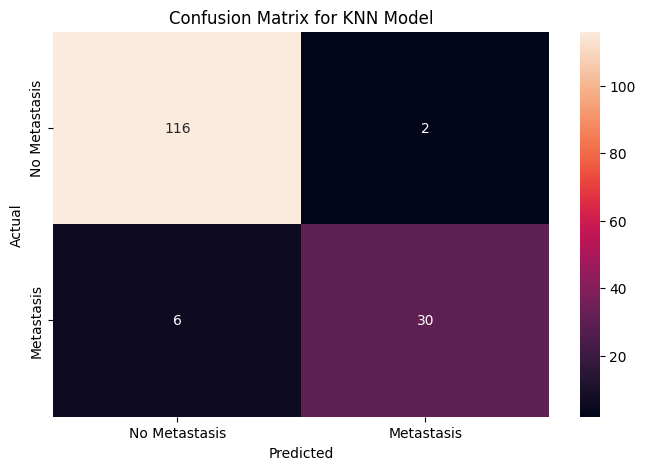

In [ ]:
# Visualizing Confusion Matrix

cm_knn = confusion_matrix(y2_test, final_predictions)

plt.figure(figsize=(8,5))
sns.heatmap(cm_knn, annot=True,
            fmt='.0f',
            xticklabels = ['No Metastasis', 'Metastasis'],
            yticklabels = ['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN Model')
plt.show()

##### Comparing 1st KNN model eval to final KNN model eval

In our initial KNN model evaluation, we achieved an impressive accuracy of 96%, with a perfect precision score for detecting metastasis. After optimizing the model with GridSearchCV, we observed a slight trade-off in precision which marginally decreased the accuracy to 95%. The final model predicted two additional false positives that the initial model did not. However, it's important to note that the recall, or the ability of the model to detect all actual cases of metastasis, remained consistent, and no additional true cases of metastasis were missed in the final model. Such nuances in model performance highlight the delicate balance between different evaluation metrics and the importance of considering all of them when selecting the best model for clinical application. This ensures we choose a model that not only is accurate but also aligns with the critical healthcare objectives of minimizing both false positives and negatives in disease diagnosis.

##### Comparing Model Performance of Logistic reg to KNN

Precision and Recall: Both models perform well, but logistic regression has a slight edge, especially in precision for class 1 (metastasis), where it reached 100%.
Accuracy: Logistic regression is slightly more accurate overall (97% vs. 95%).
Confusion Matrix Analysis:
Logistic regression did not make any false positive errors, whereas KNN made 2.
Both models made false negative errors (misclassifying actual metastasis cases), but logistic regression made fewer such errors (5 vs. 6 for KNN).

Logistic regression seems to have a slight advantage in terms of precision, recall, and overall accuracy.
The absence of false positives in logistic regression suggests it is more reliable for ruling out metastasis when it predicts no metastasis. However, both models have comparable performance, with KNN showing a strong ability to identify positive cases.

In conclusion, while logistic regression shows a marginal superiority in this case, both models are effective.

In [ ]:
# CHECKING TO SEE IF BOTH DATAFRAME WERE ALIGNED SO I JOIN MY TARGET VARIABLE TO MY PREDICTORS sicne they are in separate dataframes

# Assuming df_temp['j_breast_has_mets'] is your target variable
target_series = df_temp['j_breast_has_mets']

# Your predictors dataframe
df_final_significant = df_final_adjusted[significant_vars]

# Check if the indices match
indices_match = df_final_significant.index.equals(target_series.index)

print(f"Do the indices match? {indices_match}")

Do the indices match? False


### ROC/AUC Curve- 1st Eval Matrix- KNN

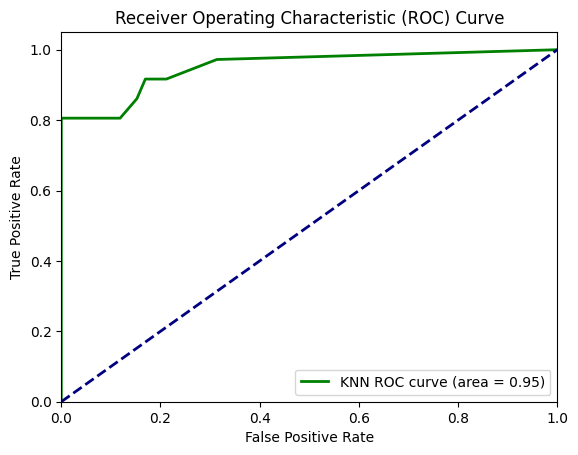

In [ ]:
# Predict probabilities for the test data
y2_pred_prob = knn.predict_proba(X2_test)[:, 1]

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _ = roc_curve(y2_test, y2_pred_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**This ROC curve represents the performance of our KNN classification model. The area under the curve, or AUC, is 0.95, which is quite high. An AUC value close to 1 indicates a strong ability of the model to differentiate between the classes — in this case, whether the condition 'has metastasis' is present or not. Essentially, our model has a 95% chance of correctly distinguishing a random positive case from a random negative case, which demonstrates its robustness in making accurate predictions.**

### ROC/AUC Curve- 2nd Eval Matrix- KNN

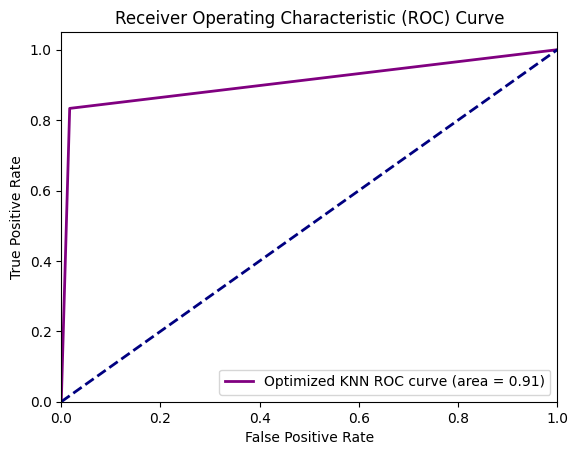

In [ ]:
#Predict probabilities for the test data with the best model from GridSearchCV
final_pred_prob = full_cv_classifier.predict_proba(X2_test)[:, 1]

# Compute ROC curve and ROC area for the optimized KNN model
fpr_knn_optimized, tpr_knn_optimized, _ = roc_curve(y2_test, final_pred_prob)
roc_auc_knn_optimized = auc(fpr_knn_optimized, tpr_knn_optimized)

# Plot the ROC curve for the optimized KNN model
plt.figure()
plt.plot(fpr_knn_optimized, tpr_knn_optimized, color='purple', lw=2, label='Optimized KNN ROC curve (area = %0.2f)' % roc_auc_knn_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Here we have the ROC curve for our optimized KNN model, and it’s showing an AUC of 0.91. This indicates that the optimized model has a strong predictive capability, with over 90% accuracy in distinguishing between the two classes. While this is slightly lower than our initial model, it's still a high score, demonstrating that the model optimization through GridSearchCV has maintained a high level of accuracy. With this model, we can confidently predict the likelihood of metastasis with a low rate of error.**

## Support Vector Machine (SVM)

In [ ]:
# Standardization of significant features

# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### Train Test Split- SVM

In [ ]:
# Train_Test Split and scaling for KNN

# Target variable is stored in df_temp
y3 = df_temp['j_breast_has_mets']

X3_train, X3_test, y3_train, y3_test = train_test_split(features_scaled_significant_df, y3, test_size=0.2, random_state=100)

##### First Evaluation Matrix- SVM

In [ ]:
# Initial Model Training

# Training the SVM model using the scaled training data
svm_model = SVC(probability=True)
svm_model.fit(X3_train, y3_train)

# Make predictions
svm_predictions = svm_model.predict(X3_test)

# Evaluate the model
print(classification_report(y3_test, svm_predictions))
print(confusion_matrix(y3_test, svm_predictions))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154

[[118   0]
 [  5  31]]


##### GridsearchCV- SVM

In [ ]:
# Hyperparameter Tuning with GridSearchCV For SVM

# Define parameter range for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a new SVM model
svm = SVC(probability=True) #Ensuring probability is True for ROC curve

# Create GridSearchCV with the SVM model and the parameter grid
svm_gscv = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=2)

# Fit the model to your data
svm_gscv.fit(X3_train, y3_train)

# Find and print the best parameters and the best score achieved
print("Best parameters:", svm_gscv.best_params_)
print("Best score:", svm_gscv.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

The output indicates that the SVM model achieved the best performance with a linear kernel, a C value of 0.1, and using the default gamma value of 'scale'. The model's accuracy was roughly 98.54% in the cross-validation process, suggesting a strong fit to the data.









##### Second Evaluation Matrix- SVM

In [ ]:
# Final Model Training for SVM (Second Evaluation Matrix)

# Use the best parameters found by GridSearchCV to create the final model
best_C = svm_gscv.best_params_['C']
best_kernel = svm_gscv.best_params_['kernel']
best_gamma = svm_gscv.best_params_['gamma']

svm_final = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, probability=True)

# Fit the final model to the training data
svm_final.fit(X3_train, y3_train)

# Make predictions with the final model on the test data
svm_final_predictions = svm_final.predict(X3_test)

# Print out classification report
print("Classification Report:")
print(classification_report(y3_test, svm_final_predictions))

# Compute and display the confusion matrix
svm_conf_matrix = confusion_matrix(y3_test, svm_final_predictions)
print("Confusion Matrix:")
print(svm_conf_matrix)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154

Confusion Matrix:
[[118   0]
 [  5  31]]


######Confusion Matrix plot- SVM

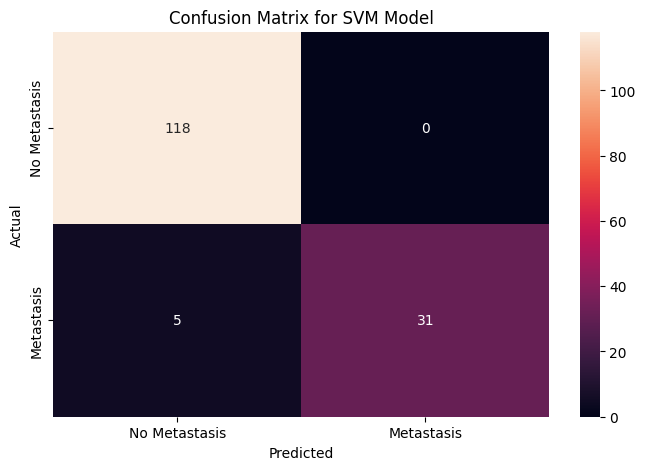

In [ ]:
# Visualizing Confusion Matrix

cm_svm = confusion_matrix(y3_test, svm_final_predictions)

plt.figure(figsize=(8,5))
sns.heatmap(cm_svm, annot=True,
            fmt='.0f',
            xticklabels = ['No Metastasis', 'Metastasis'],
            yticklabels = ['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for SVM Model')
plt.show()

##### Summary of Evaluation Matrix for all 3 models (Logistic, KNN< SVM)

**Logistic Regression**

Precision and Recall: High precision and recall, with perfect precision (1.00) for the metastasis class (1.0).

F1-Score: High, indicating a balanced model, particularly strong for the no metastasis class (0.0).

Accuracy: 97%, very high overall accuracy.

Confusion Matrix: No false positives, with a small number of false negatives.

Insight: The logistic regression model, especially with regularization, is very effective, showing high precision and good recall, particularly in correctly predicting the no metastasis cases.

**KNN**

Precision and Recall: Slightly lower precision and recall compared to logistic regression and SVM, especially for the metastasis class.

F1-Score: Lower than logistic regression and SVM, indicating a slight drop in the balance between precision and recall.

Accuracy: 95%, which is slightly lower than the other two models.

Confusion Matrix: A few false positives and slightly more false negatives compared to logistic regression.

Insight: KNN performs well but is slightly outperformed by logistic regression and SVM in terms of overall accuracy and the balance between precision and recall.

**SVM**

Precision and Recall: Matches the logistic regression with perfect precision for the metastasis class and high recall.

F1-Score: Equivalent to logistic regression, showing a strong balance between precision and recall.

Accuracy: 97%, matching the logistic regression's high overall accuracy.

Confusion Matrix: Identical to logistic regression, with no false positives and a few false negatives.

Insight: SVM shows a strong performance, particularly in precision, and is on par with logistic regression, effectively identifying both classes with high accuracy.

- Both Logistic Regression and SVM predict the target variable most effectively in this dataset, displaying high accuracy and precision, particularly in distinguishing between metastasis and no metastasis cases. KNN is slightly less effective in this context, with a bit lower precision, recall, and overall accuracy compared to the other two models.

### ROC/AUC Curve- 1st Eval Matrix- SVM

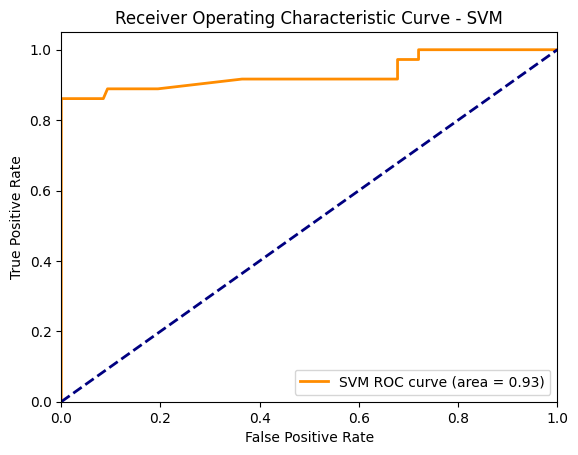

In [ ]:
# Training the SVM model using the scaled training data with probability estimates
svm_model = SVC(probability=True)
svm_model.fit(X3_train, y3_train)

# Predict probability estimates for the test set
y3_pred_prob = svm_model.predict_proba(X3_test)[:, 1]

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(y3_test, y3_pred_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2,
         label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - SVM')
plt.legend(loc="lower right")
plt.show()

**Take a look at this ROC curve for our SVM model. The AUC is 0.93, which is a strong score, reflecting the model’s high degree of accuracy. This means that our SVM model has a 93% chance of correctly distinguishing between cases with and without metastasis. Such an AUC value signifies that the model has both a high true positive rate and a low false positive rate across various decision thresholds. In practice, this translates to a reliable and robust performance in predicting the outcome of interest, which is critical for the effectiveness of our diagnostic tool.**

### ROC/AUC Curve- 2nd Eval Matrix- SVM

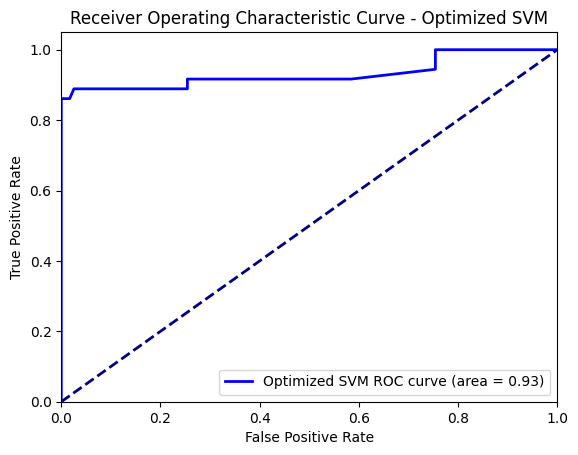

In [ ]:
# Training the final SVM model using the best parameters found and with probability estimates
svm_final = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma, probability=True)
svm_final.fit(X3_train, y3_train)

# Predict probability estimates for the test set with the final model
y3_final_pred_prob = svm_final.predict_proba(X3_test)[:, 1]

# Compute ROC curve and ROC area for the final model
fpr_svm_final, tpr_svm_final, _ = roc_curve(y3_test, y3_final_pred_prob)
roc_auc_svm_final = auc(fpr_svm_final, tpr_svm_final)

# Plot the ROC curve for the final SVM model
plt.figure()
plt.plot(fpr_svm_final, tpr_svm_final, color='blue', lw=2,
         label='Optimized SVM ROC curve (area = %0.2f)' % roc_auc_svm_final)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve - Optimized SVM')
plt.legend(loc="lower right")
plt.show()

**This ROC curve represents our SVM model after optimization with hyperparameter tuning. The AUC, or area under the curve, remains impressively high at 0.93, mirroring the strong performance we saw before optimization. This consistency in AUC value suggests that our model tuning has preserved, if not enhanced, the model's ability to accurately classify cases. Essentially, we have a high-confidence model that differentiates between the presence and absence of metastasis, with both high sensitivity and specificity.**

## Decision Trees

In [ ]:
# Standardization of significant features

# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### Train Test Split- Decision Trees

In [ ]:
# Train_Test Split and scaling for Decision Tree

# Target variable is stored in df_temp
y4 = df_temp['j_breast_has_mets']

X4_train, X4_test, y4_train, y4_test = train_test_split(features_scaled_significant_df, y4, test_size=0.2, random_state=100)

##### First Evaluation Matrix- Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X4_train, y4_train)

# Make Predictions
dt_predictions = dt_model.predict(X4_test)

# Evaluate the model
print(classification_report(y4_test, dt_predictions))
print(confusion_matrix(y4_test, dt_predictions))


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

[[117   1]
 [  5  31]]


Our model’s precision for identifying true cases of metastasis – that's when it predicts metastasis and is correct – is 97%, which is quite high. This indicates that when our model predicts metastasis, it's very likely to be right.

The recall for metastasis, which tells us how well the model is at catching all the actual cases of metastasis, is 86%. So, while it's quite good, it means that out of all true cases, it misses about 14% – these are cases it didn't flag, but should have.

The f1-score is a balance between precision and recall, and for metastasis, it's at 91%, which is robust, reflecting a strong model. For non-metastatic predictions, or 'no metastasis,' our model has a precision of 96% and a recall of 99%, with an f1-score of 97%. This means it's extremely reliable at identifying true negatives and rarely misses.

Overall accuracy is 96%, indicating that our model correctly predicted the metastatic and non-metastatic cases 96% of the time out of all the cases it examined.

The confusion matrix gives us a snapshot of the model's performance: out of 118 non-metastatic cases, it correctly identified 117 (true negatives), and there was just 1 false alarm (false positive). For the metastatic cases, it accurately identified 31 out of 36 (true positives), missing 5 (false negatives).

In essence, this model is a powerful tool for predicting breast cancer metastasis, providing high confidence where a prediction of metastasis is given, and effectively identifying cases without metastasis. This can be invaluable in a clinical setting for planning treatment and follow-up care.

###### Feature Importance -Decision Tree

In [ ]:
# Extract feature importances from the model
dt_feature_importances = pd.DataFrame(dt_model.feature_importances_, index=features_scaled_significant_df.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
# Display the feature importances
print(dt_feature_importances)

                               Feature Importance
j_breast_behavior_3.0                    0.954056
j_breast_pr_status_3.0                   0.013683
j_breast_er_status_3.0                   0.008843
j_breast_her2summ_3.0                    0.006914
j_breast_trt_horm_1.0                    0.005444
j_breast_her2summ_5.0                    0.003993
j_breast_trt_surg_prim_yn_1.0            0.002985
j_breast_trt_rad_1.0                     0.001853
j_breast_trt_chemo_3.0                   0.001575
j_breast_trt_horm_87.0                   0.000654


##### Visualizing Decision Tree

In [ ]:
# Visualizing the tree

plt.figure(figsize=(30,20))
plot_tree(dt_model, filled=True, feature_names=features_scaled_significant_df.columns)
plt.title("Decision Tree")
plt.savefig("decision_tree.svg", format='svg')  # Save to SVG file
plt.close()  # Close the figure

# An SVG file named "decision_tree.svg" will allow me to open in a web browser or any compatible viewer and zoom in without loss of quality.

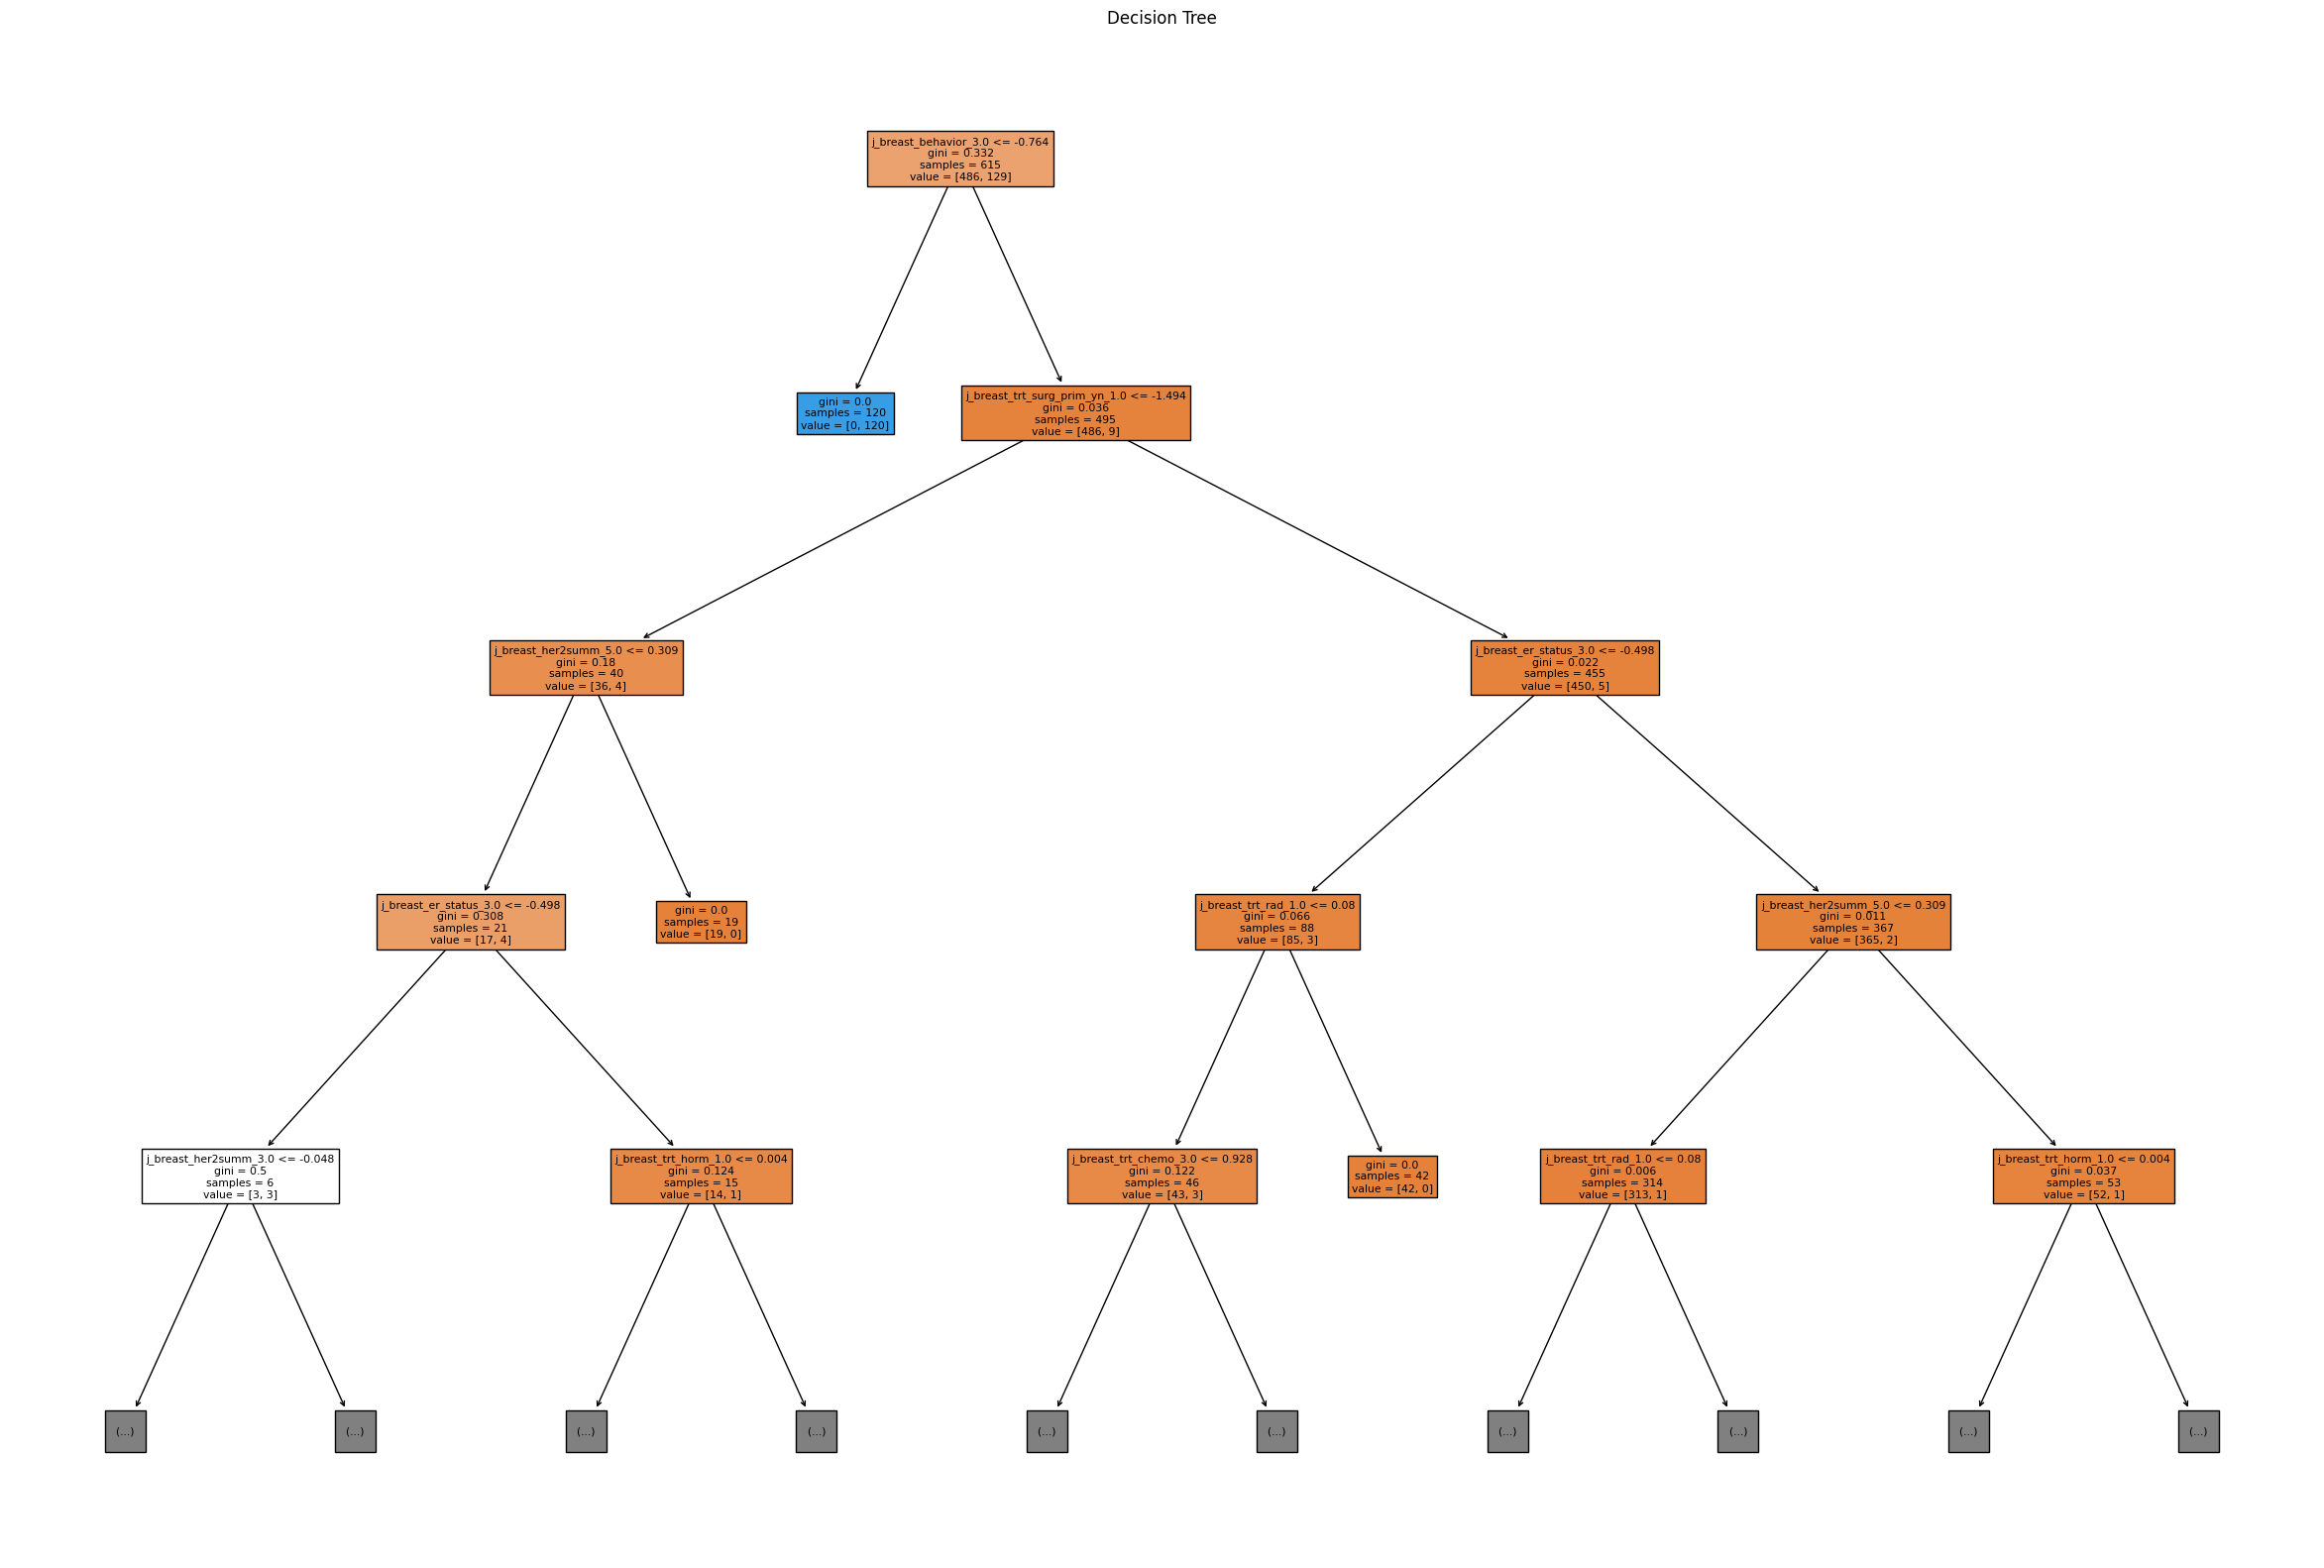

In [ ]:
plt.figure(figsize=(30, 20))
plot_tree(dt_model, filled=True, feature_names=features_scaled_significant_df.columns, max_depth=4)  # Adjust max_depth as needed
plt.title("Decision Tree")
plt.show()

- **gini**: The Gini impurity of the node, which is a measure of the node's purity. A Gini impurity of 0 indicates that all samples in the node belong to the same class.

- **samples**: The number of samples that are present in the node.

- **value**: The class distribution in the node [number of samples in class 0, number of samples in class 1, ..., number of samples in class N].

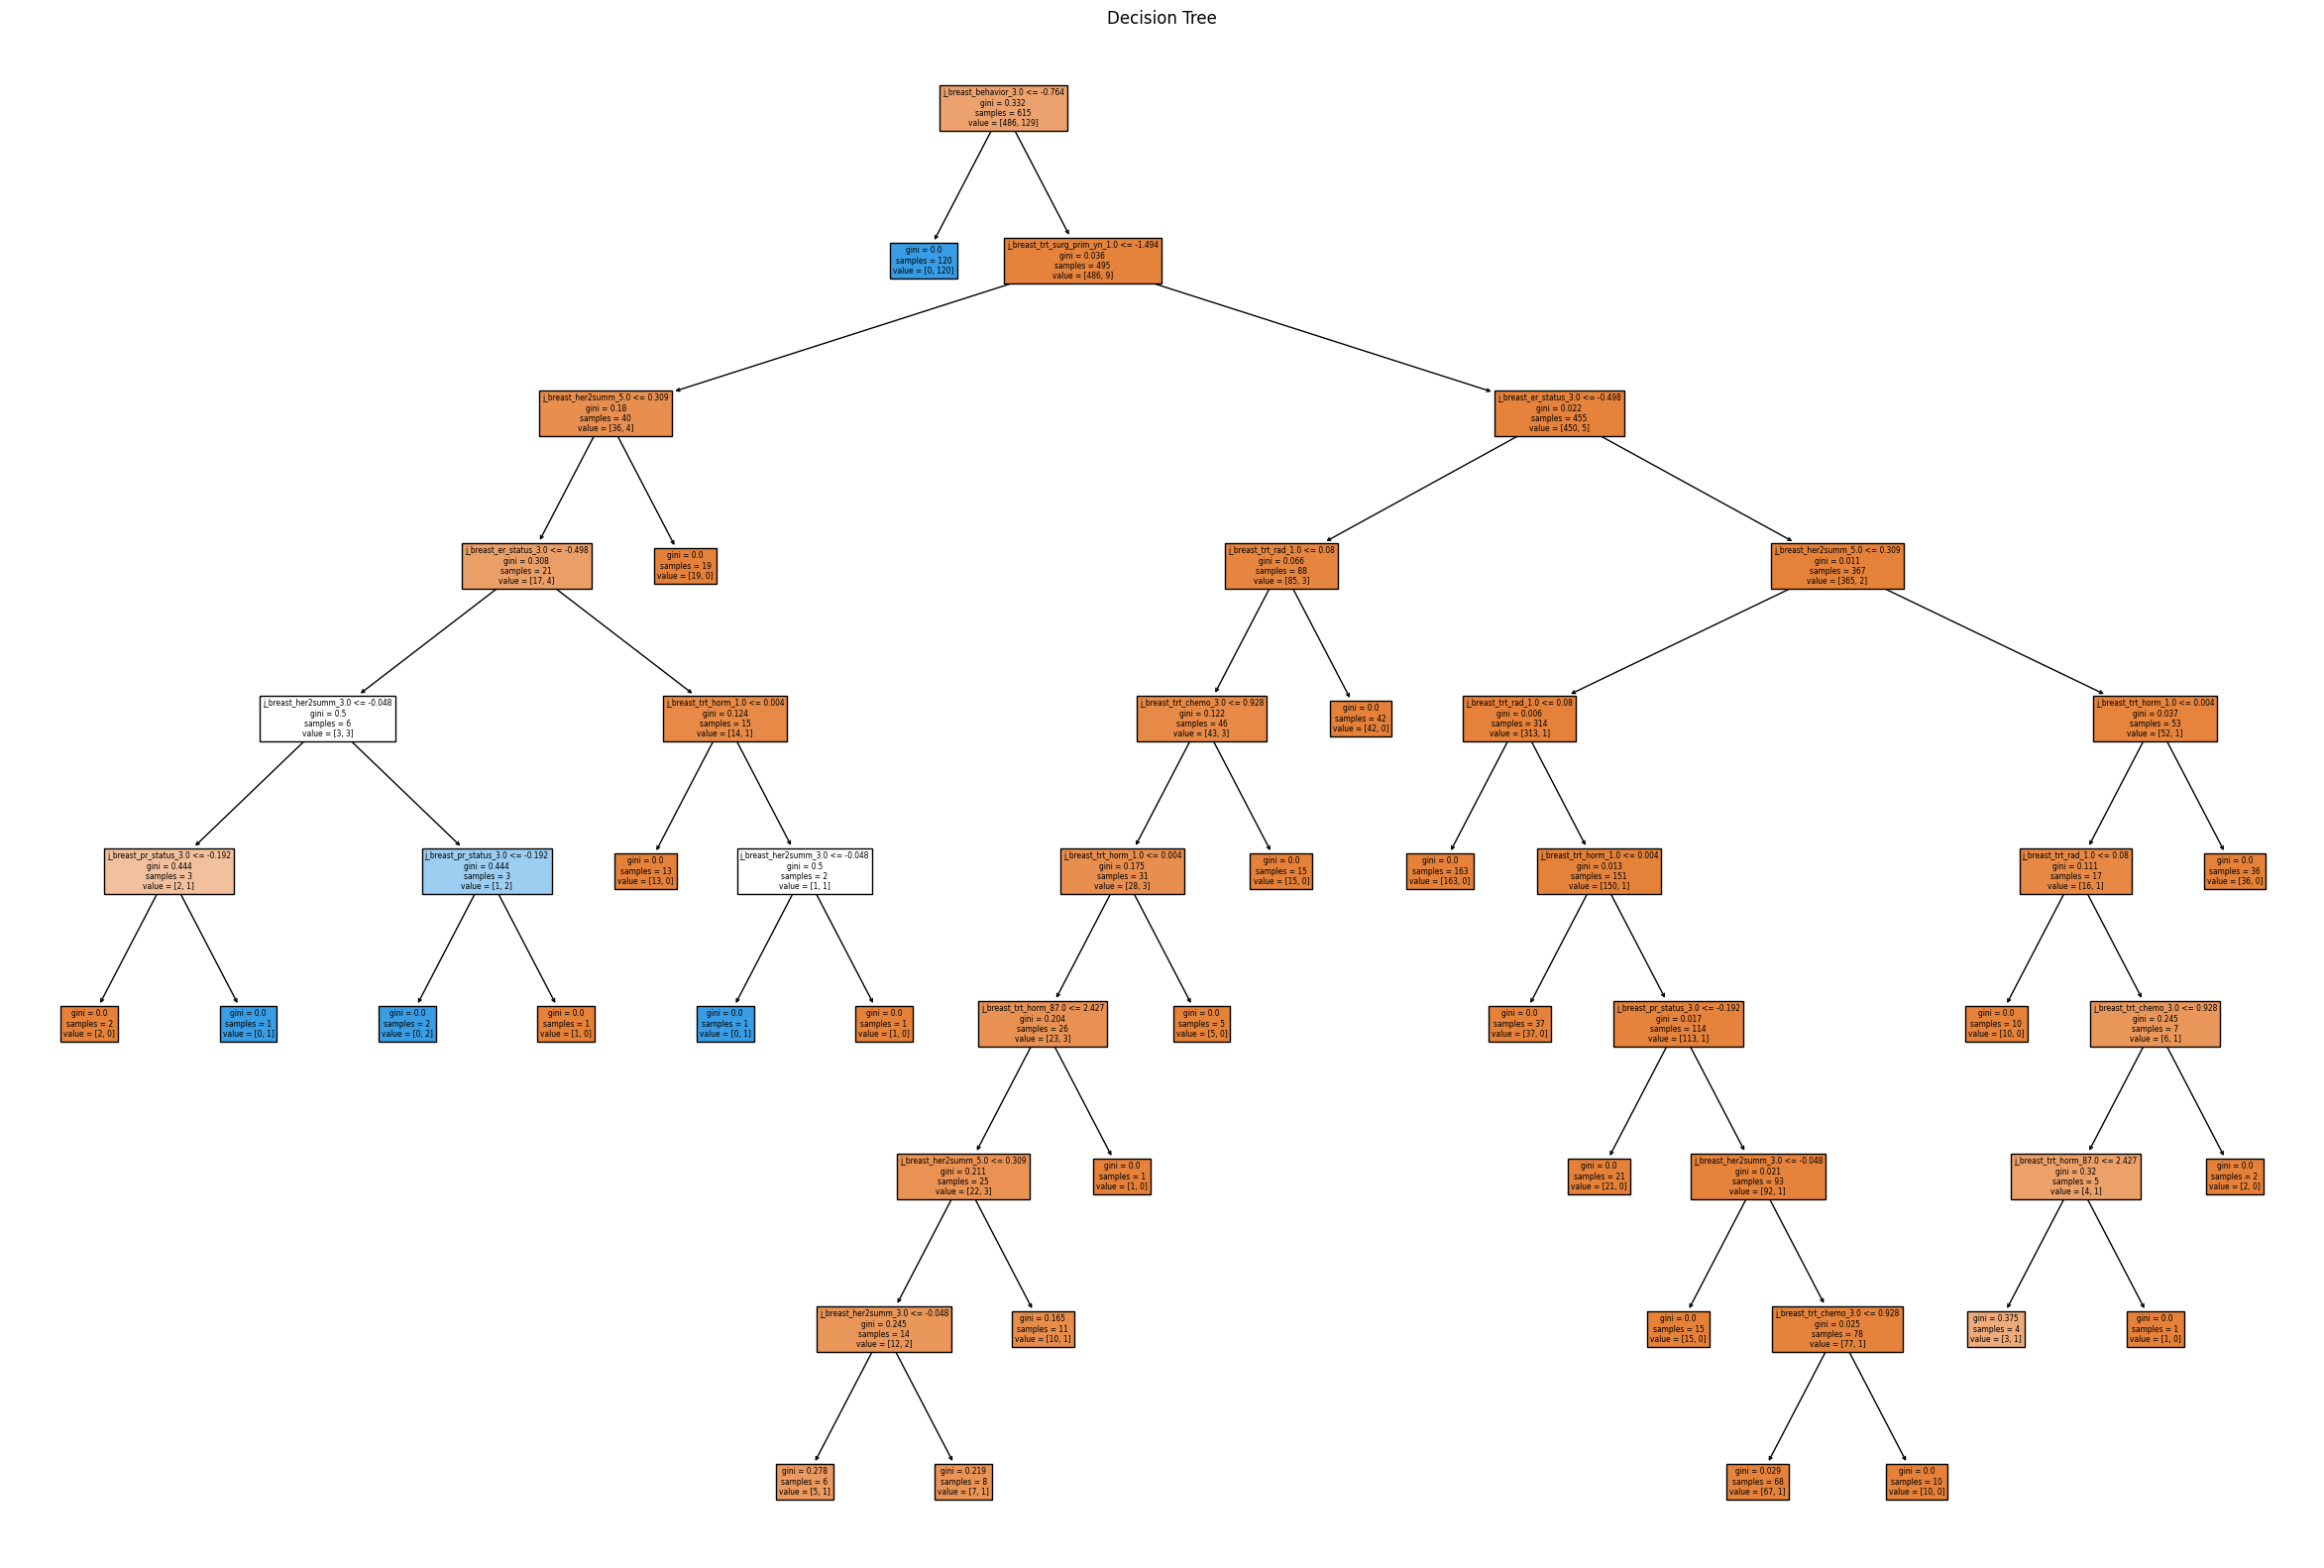

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(dt_model, filled=True, feature_names=features_scaled_significant_df.columns)
plt.title("Decision Tree")
plt.show()

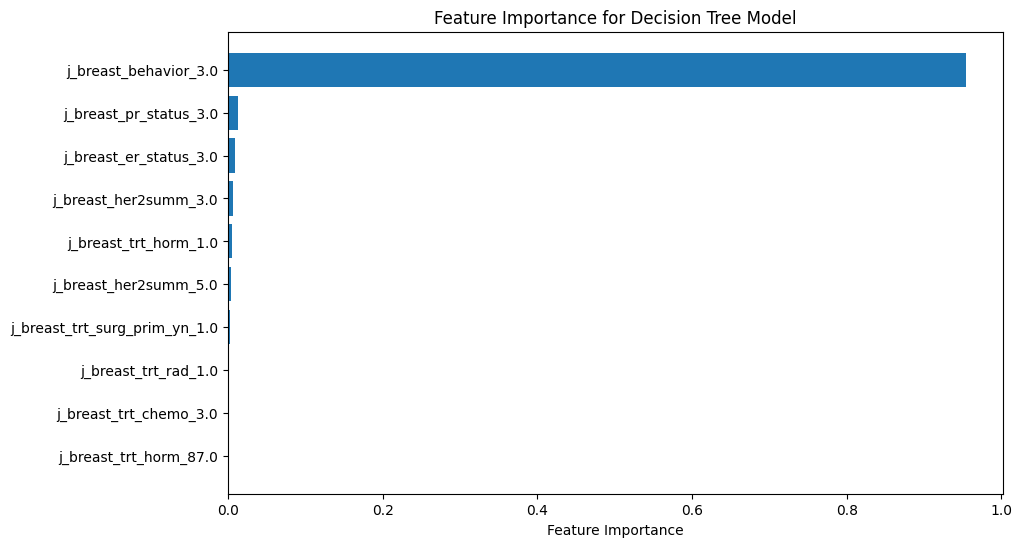

In [ ]:
# Visualizing the feature importance

# Sort the features by importance
sorted_idx = dt_feature_importances['Feature Importance'].argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(dt_feature_importances.index[sorted_idx], dt_feature_importances['Feature Importance'][sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Model')
plt.show()

- We are looking at the 'importance' of different factors in predicting the presence of metastasis in breast cancer patients. Think of 'importance' as a measure of how much weight the model gives to each factor when making a prediction.

- The longest bar you see on the chart corresponds to 'Breast Cancer Behavior,' specifically when it's categorized as 'Malignant, Primary Site.' This tells us that, according to our decision tree model, the behavior of the cancer is the most significant predictor for metastasis out of all the factors we examined. In other words, when the breast cancer is identified as a malignant primary site, it's more influential for the model in predicting metastasis than any other factor we've included.

- Each bar on the chart represents a different factor, such as hormone treatments, radiation treatments, and hormone receptor status. The length of the bar shows the strength of that factor's influence. While 'Breast Cancer Behavior' stands out as the most significant, other factors also play a role, albeit to a lesser extent. It's crucial to understand that this chart doesn't tell us how these factors are related to metastasis — whether they increase or decrease the risk — only that they are important for the model's predictions.

- What we can take away from this is that certain characteristics of the cancer itself, as reflected in its 'behavior,' along with treatments received, are key pieces of information that can help us predict metastasis. This insight can inform doctors and patients as they discuss prognosis and treatment options.

###### Define Model Evaluation Funcitons- Decision Tree

In [ ]:
# Define a function for model evaluation and visualization
def report_model(model):
    model_preds = model.predict(X4_test)
    print(classification_report(y4_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8), dpi=150)
    plot_tree(model, filled=True, feature_names=features_scaled_significant_df.columns)
    plt.show()

In [ ]:
# Initialize and Train models
dt_model = DecisionTreeClassifier()
dt_model.fit(X4_train, y4_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154





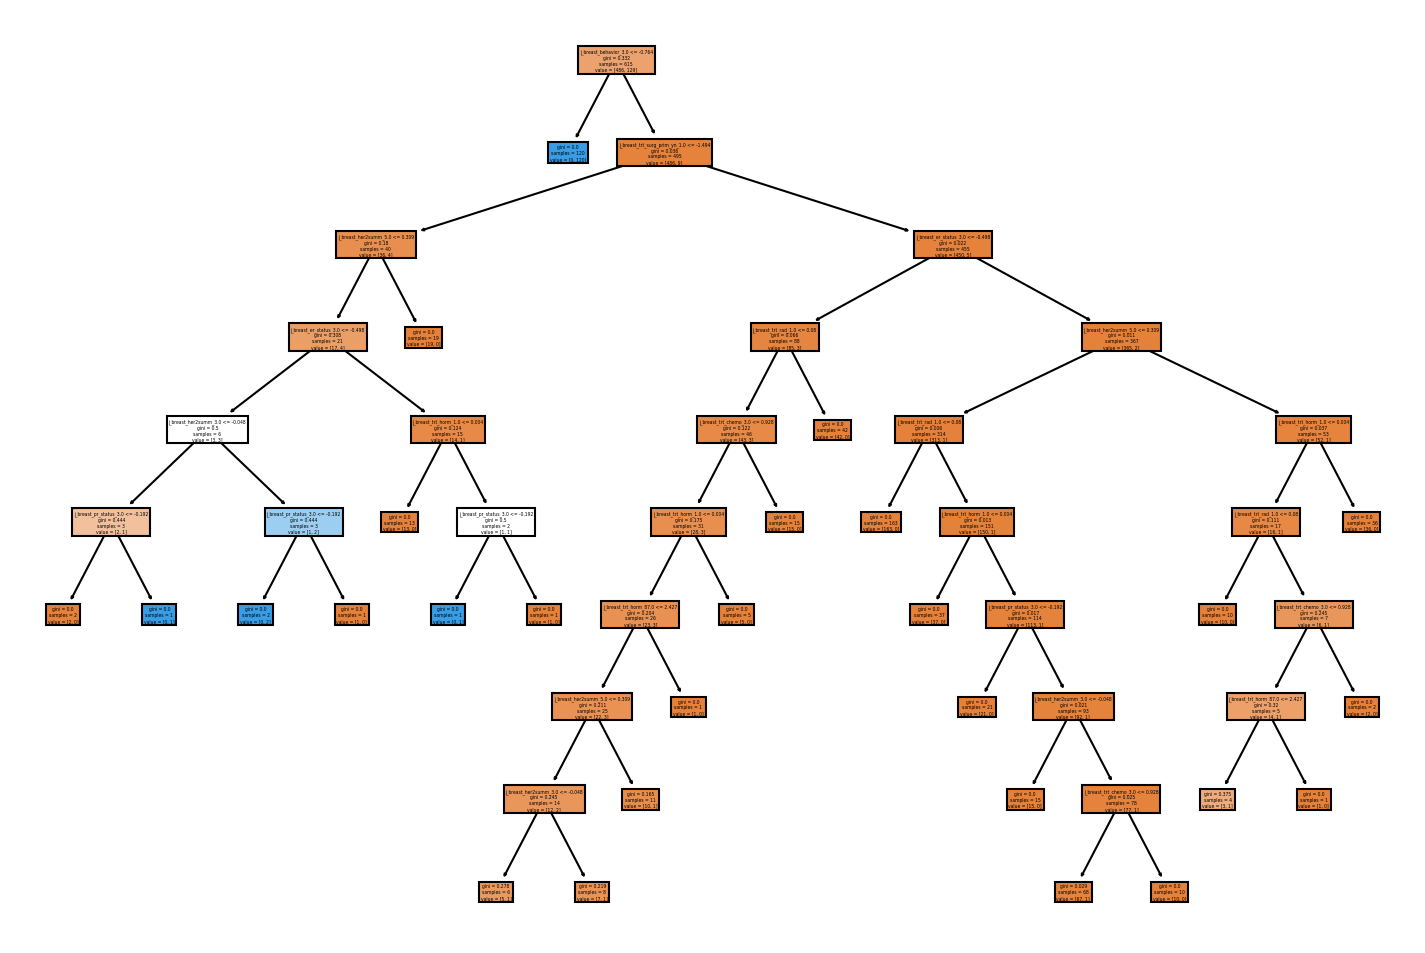

In [ ]:
#Evaluate the model with the report_model function
report_model(dt_model)

In [ ]:
# Understanding parameters
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154





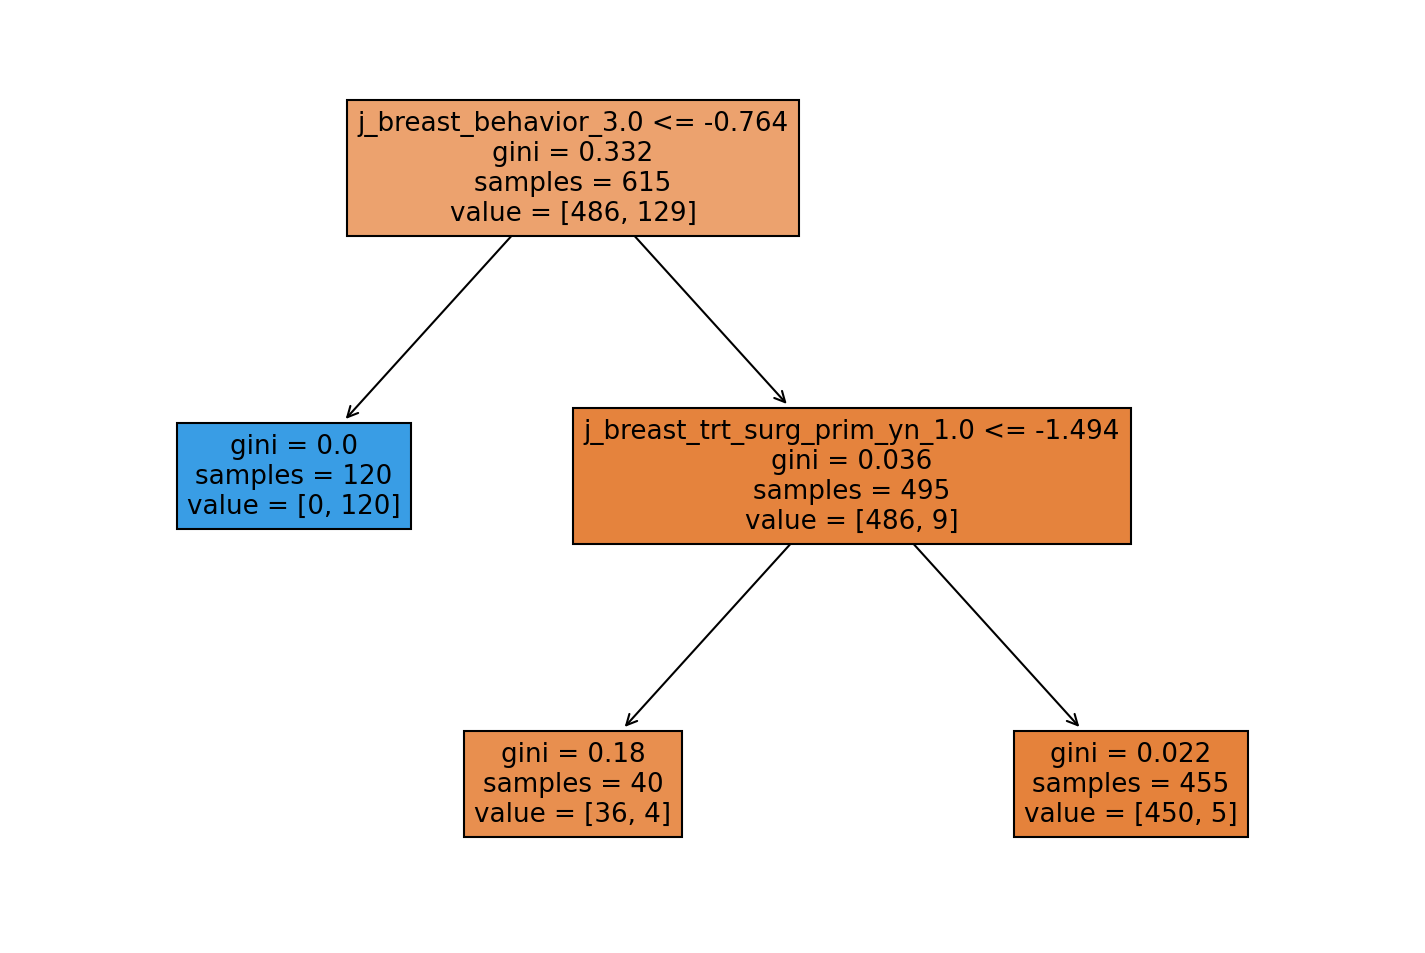

In [ ]:
# Train and evaluate pruned decision tree models
# Pruned model with max depth
pruned_tree_depth = DecisionTreeClassifier(max_depth=2)
pruned_tree_depth.fit(X4_train, y4_train)
report_model(pruned_tree_depth)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154





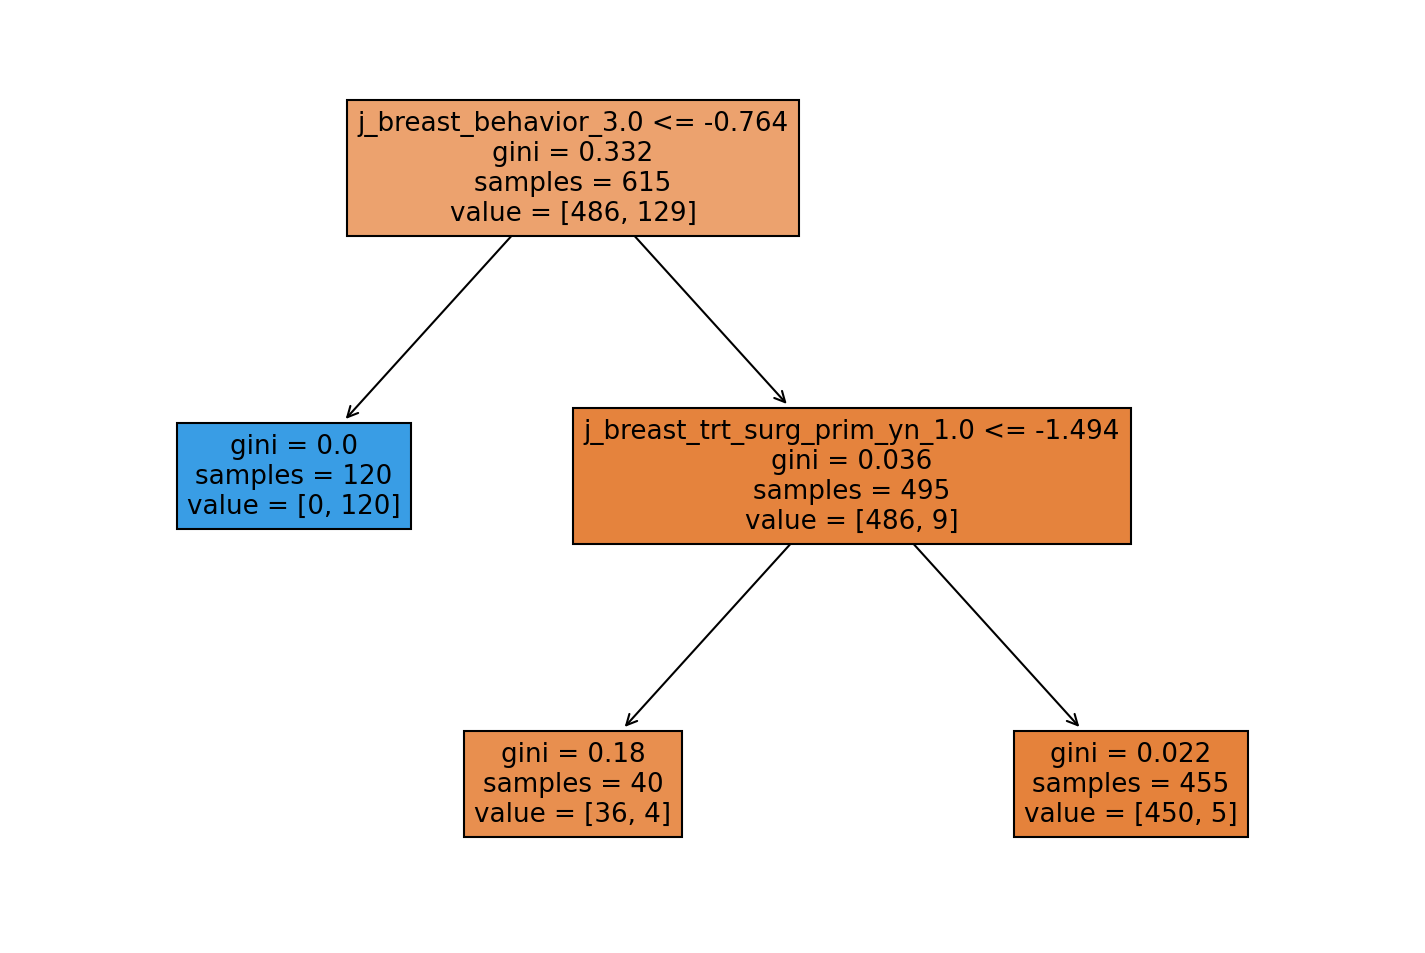

In [ ]:
# Pruned model with max leaf nodes
pruned_tree_leaf = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree_leaf.fit(X4_train, y4_train)
report_model(pruned_tree_leaf)

In [ ]:
# Train the pruned decision tree model
pruned_tree_leaf = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree_leaf.fit(X4_train, y4_train)

# Assuming you have the names of the features and classes
feature_names = ["j_breast_behavior_3.0", "j_breast_pr_status_3.0", "j_breast_er_status_3.0", "j_breast_trt_horm_1.0",
                 "j_breast_her2summ_5.0", "j_breast_trt_surg_prim_yn_1.0", "j_breast_trt_rad_1.0", "j_breast_her2summ_3.0",
                 "j_breast_trt_chemo_3.0", "j_breast_trt_horm_87.0"]
class_names = ["No Metastasis", "Metastasis"]

# Export as dot file
dot_data = export_graphviz(pruned_tree_leaf, out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Use graphviz to create the graph
graph = graphviz.Source(dot_data)

# If you want to display the graph in a Jupyter notebook
# graph

# If you want to save the visual as a PNG file
graph.render("pruned_decision_tree", format='png', cleanup=True)

'pruned_decision_tree.png'

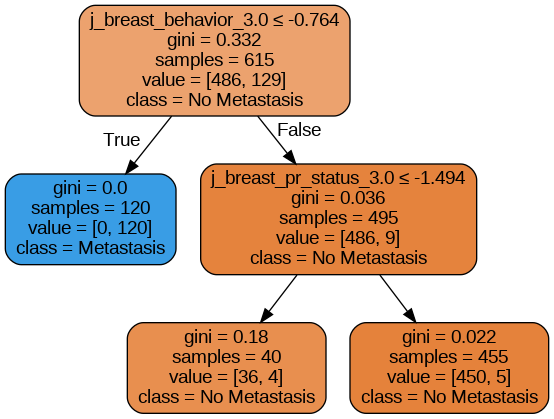

In [ ]:
from IPython.display import Image
Image('pruned_decision_tree.png')

In [ ]:
# Compute feature importances and create a DataFrame
feature_importances = pd.DataFrame(
    dt_model.feature_importances_,
    index=features_scaled_significant_df.columns,
    columns=['Feature Importance']
).sort_values('Feature Importance', ascending=False)

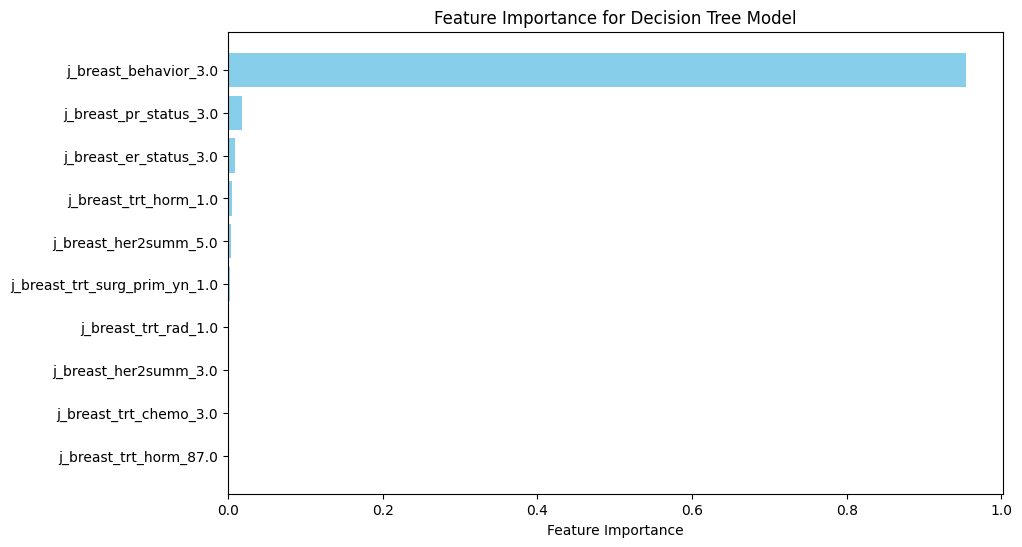

In [ ]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Feature Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Model')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()

In [ ]:
# Initialize the Decision Tree Classifier with entropy
dt_entropy_model = DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Fit the model on your training data
dt_entropy_model.fit(X4_train, y4_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Make predictions
dt_entropy_predictions = dt_entropy_model.predict(X4_test)

# Evaluate the model
print(classification_report(y4_test, dt_entropy_predictions))
print(confusion_matrix(y4_test, dt_entropy_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

[[117   1]
 [  5  31]]


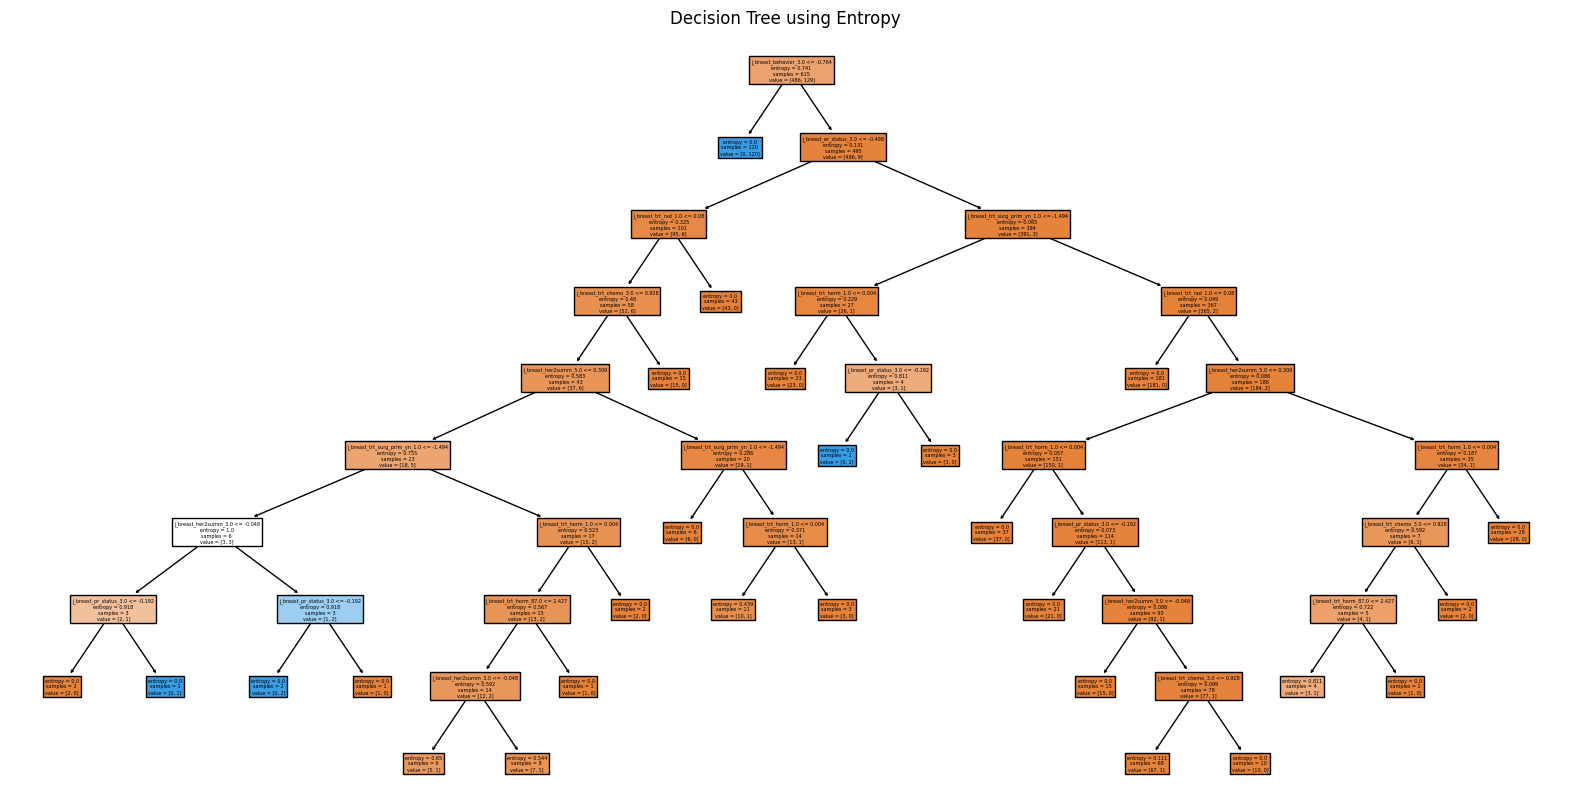

In [ ]:
# Visualize the Decision Tree using Entropy
plt.figure(figsize=(20,10))
plot_tree(dt_entropy_model, filled=True, feature_names=features_scaled_significant_df.columns)
plt.title("Decision Tree using Entropy")
plt.show()

######GridSearchCV-Decision Tree

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=100)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X4_train, y4_train)

# Extract the best estimator
best_dt_model = grid_search.best_estimator_

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


##### Second Evaluation Matrix- Decision Tree

In [ ]:
# Make predictions with the best model on the test data
dt_best_predictions = best_dt_model.predict(X4_test)

# Evaluate the model
print("Classification Report for Best Decision Tree Model:")
print(classification_report(y4_test, dt_best_predictions))
print("Confusion Matrix for Best Decision Tree Model:")
print(confusion_matrix(y4_test, dt_best_predictions))

Classification Report for Best Decision Tree Model:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

Confusion Matrix for Best Decision Tree Model:
[[117   1]
 [  5  31]]


######Confusion Matrix plot- Decision Tree

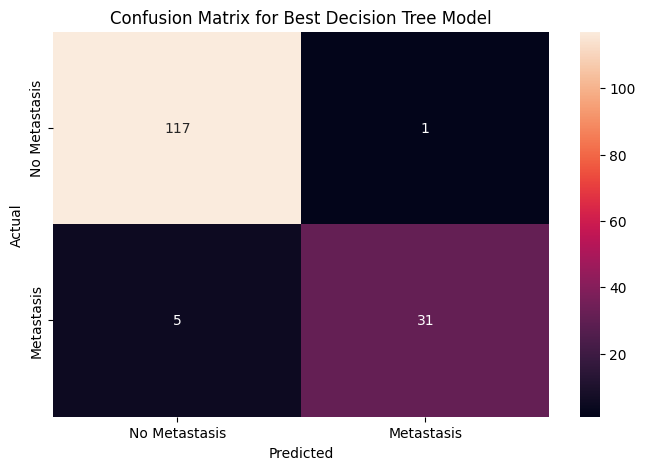

In [ ]:
# Visualizing Confusion Matrix for the best model
cm_dt_best = confusion_matrix(y4_test, dt_best_predictions)

plt.figure(figsize=(8,5))
sns.heatmap(cm_dt_best, annot=True, fmt='.0f',
            xticklabels=['No Metastasis', 'Metastasis'],
            yticklabels=['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Best Decision Tree Model')
plt.show()

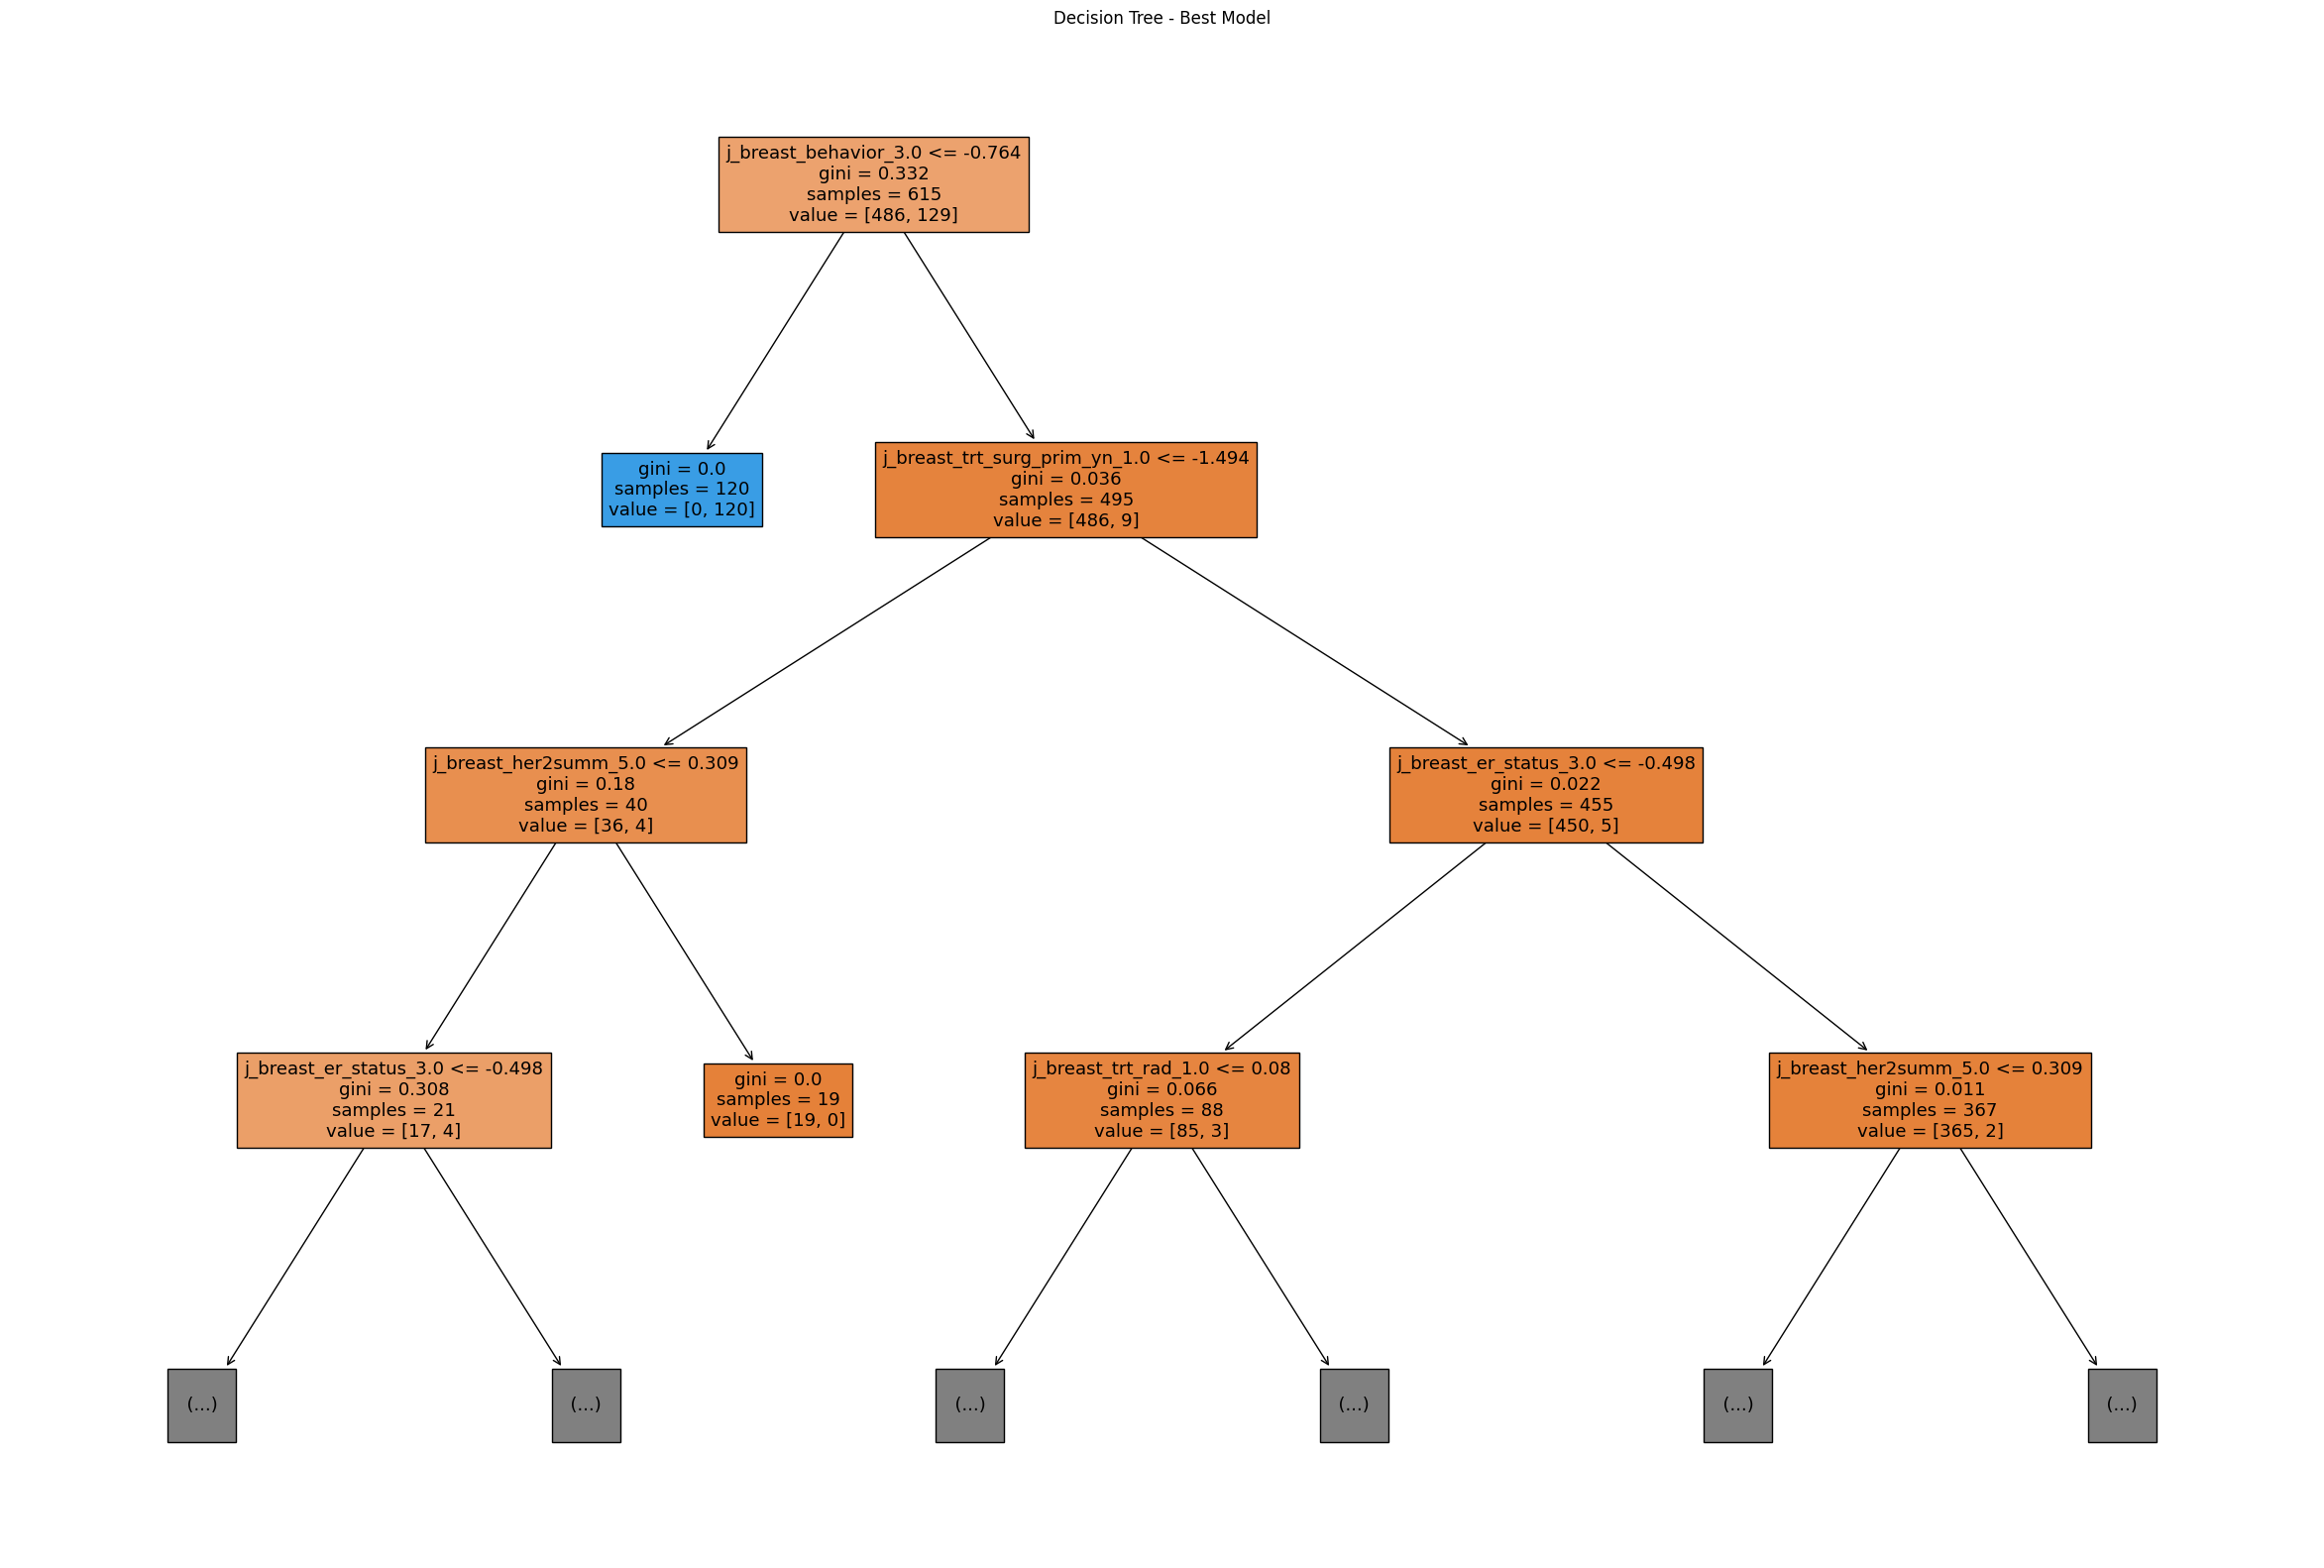

In [ ]:
# Visualize the Decision Tree for the best model
plt.figure(figsize=(30,20))
plot_tree(best_dt_model, filled=True, feature_names=features_scaled_significant_df.columns, max_depth=3)  # Adjust max_depth as needed
plt.title("Decision Tree - Best Model")
plt.show()

### ROC/AUC Curve- 1st Eval Matrix- Decision Tree

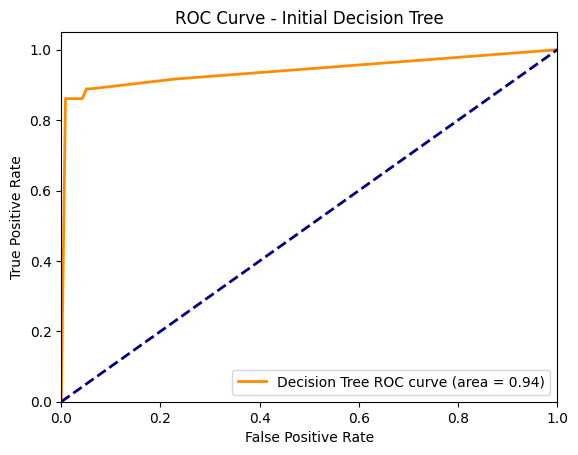

In [ ]:
# Predict probabilities for the positive class
dt_pred_prob = dt_model.predict_proba(X4_test)[:, 1]

# Compute ROC curve and ROC area for the initial model
fpr_dt, tpr_dt, _ = roc_curve(y4_test, dt_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve for the initial Decision Tree model
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2,
         label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Initial Decision Tree')
plt.legend(loc="lower right")
plt.show()

**This ROC curve illustrates the performance of our initial Decision Tree model, achieving an AUC of 0.94. This high AUC value indicates that the model has a strong ability to correctly classify cases as having metastasis or not. Specifically, it suggests that our model can distinguish between the two outcomes with 94% accuracy. Such a result points to a reliable predictive power, which is a promising sign for the model's potential utility in practical applications.**

### ROC/AUC Curve- 2nd Eval Matrix- Decision Tree

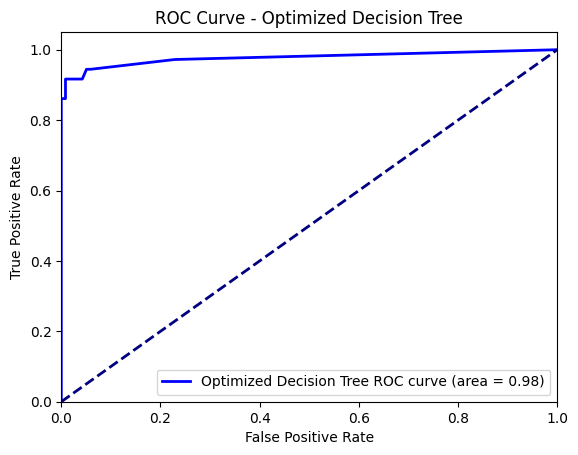

In [ ]:
# Predict probabilities for the positive class with the best model
dt_best_pred_prob = best_dt_model.predict_proba(X4_test)[:, 1]

# Compute ROC curve and ROC area for the best model
fpr_dt_best, tpr_dt_best, _ = roc_curve(y4_test, dt_best_pred_prob)
roc_auc_dt_best = auc(fpr_dt_best, tpr_dt_best)

# Plot the ROC curve for the best Decision Tree model
plt.figure()
plt.plot(fpr_dt_best, tpr_dt_best, color='blue', lw=2,
         label='Optimized Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Decision Tree')
plt.legend(loc="lower right")
plt.show()

**This ROC curve displays the performance of our Decision Tree model after optimization. An AUC of 0.98 demonstrates an exceptional ability of the model to differentiate between the cases that do and do not have metastasis. This near-perfect AUC score suggests the model's decisions are highly accurate, with a very low rate of false positives and false negatives. In practical terms, it means the optimizations we applied have further refined the model, enhancing its ability to make correct predictions in a clinical setting.**

In [ ]:
# COMPARATIVE CHART FOR ALL MODELS

# Compiling the model performance metrics into a DataFrame for a comparative chart

# Logistic Regression metrics
log_reg_metrics = {
    'Model': 'Logistic Regression',
    'Precision (0)': 0.96,
    'Precision (1)': 1.00,
    'Recall (0)': 1.00,
    'Recall (1)': 0.86,
    'F1-Score (0)': 0.98,
    'F1-Score (1)': 0.93,
    'Accuracy': 0.97,
    'AUC': 0.98
}

# KNN metrics
knn_metrics = {
    'Model': 'KNN',
    'Precision (0)': 0.95,
    'Precision (1)': 0.94,
    'Recall (0)': 0.98,
    'Recall (1)': 0.83,
    'F1-Score (0)': 0.97,
    'F1-Score (1)': 0.88,
    'Accuracy': 0.95,
    'AUC': 0.91
}

# SVM metrics
svm_metrics = {
    'Model': 'SVM',
    'Precision (0)': 0.96,
    'Precision (1)': 1.00,
    'Recall (0)': 1.00,
    'Recall (1)': 0.86,
    'F1-Score (0)': 0.98,
    'F1-Score (1)': 0.93,
    'Accuracy': 0.97,
    'AUC': 0.93
}

# Decision Tree metrics
decision_tree_metrics = {
    'Model': 'Decision Tree',
    'Precision (0)': 0.96,
    'Precision (1)': 0.97,
    'Recall (0)': 0.99,
    'Recall (1)': 0.86,
    'F1-Score (0)': 0.97,
    'F1-Score (1)': 0.91,
    'Accuracy': 0.96,
    'AUC': 0.98
}

# Combining all the metrics into a DataFrame
model_comparison_df = pd.DataFrame([log_reg_metrics, knn_metrics, svm_metrics, decision_tree_metrics])

# Transpose the DataFrame for a better comparative visual in tabular form
model_comparison_transposed = model_comparison_df.set_index('Model').T

model_comparison_transposed


Model          Logistic Regression   KNN   SVM  Decision Tree
Precision (0)                 0.96  0.95  0.96           0.96
Precision (1)                 1.00  0.94  1.00           0.97
Recall (0)                    1.00  0.98  1.00           0.99
Recall (1)                    0.86  0.83  0.86           0.86
F1-Score (0)                  0.98  0.97  0.98           0.97
F1-Score (1)                  0.93  0.88  0.93           0.91
Accuracy                      0.97  0.95  0.97           0.96
AUC                           0.98  0.91  0.93           0.98

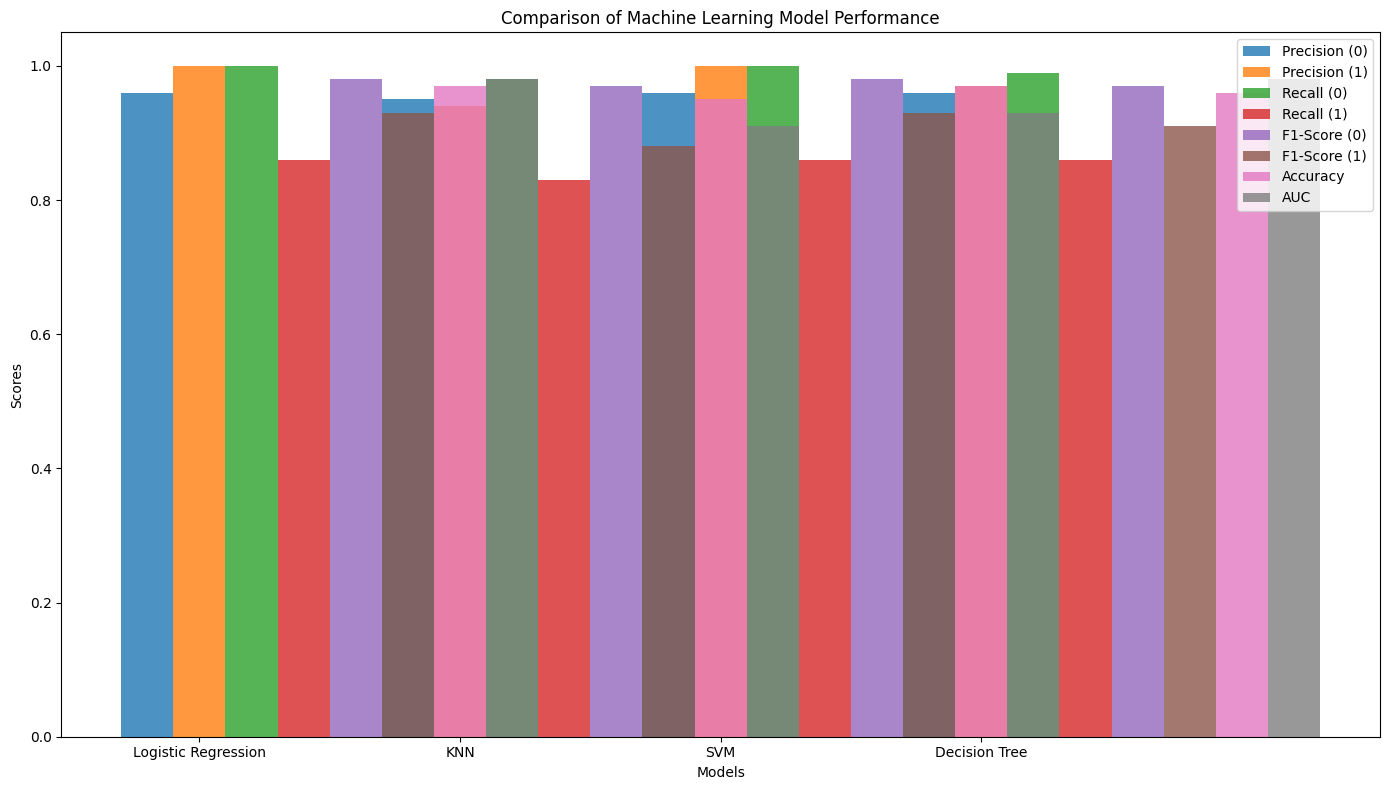

In [ ]:
# visual displaying all models

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Draw a bar plot for each metric
n_groups = len(model_comparison_df)
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

for i, metric in enumerate(model_comparison_df.columns[1:]):
    plt.bar(index + bar_width*i, model_comparison_df[metric], bar_width, alpha=opacity, label=metric)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Machine Learning Model Performance')
plt.xticks(index + bar_width, model_comparison_df['Model'])
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-157-9715f010cfc7>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=values, y=categories, palette="Blues_d")


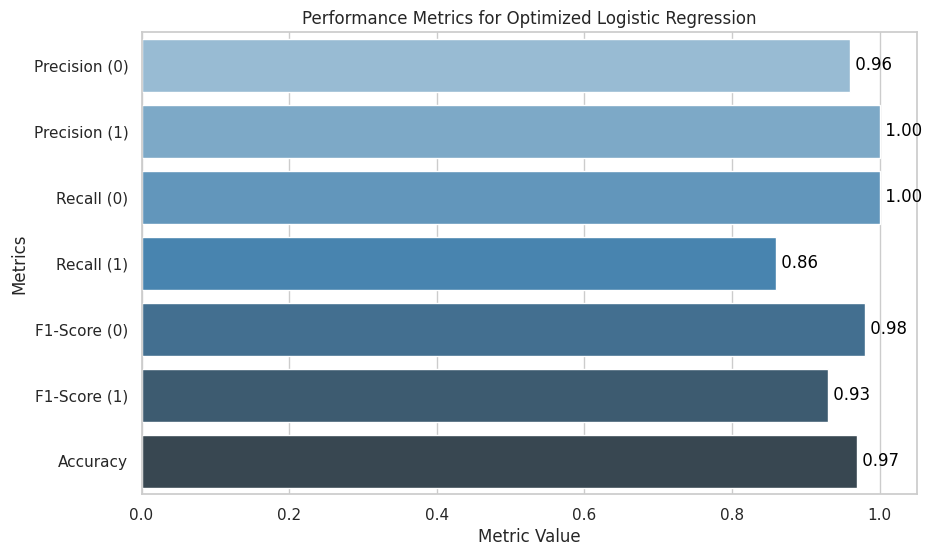

In [ ]:
# static bar chart for visualization

# Evaluation metrics for Optimized Logistic Regression
metrics = {
    'Precision (0)': 0.96,
    'Precision (1)': 1.00,
    'Recall (0)': 1.00,
    'Recall (1)': 0.86,
    'F1-Score (0)': 0.98,
    'F1-Score (1)': 0.93,
    'Accuracy': 0.97
}

# Data for plotting
categories = list(metrics.keys())
values = list(metrics.values())

# Create the bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=values, y=categories, palette="Blues_d")

# Add the data values on the bars
for i in range(len(values)):
    ax.text(values[i], i, f' {values[i]:.2f}', color='black', va="center")

# Set the title and labels
plt.title('Performance Metrics for Optimized Logistic Regression')
plt.xlabel('Metric Value')
plt.ylabel('Metrics')

# Show the plot
plt.show()


### 1st Combined ROC Curves

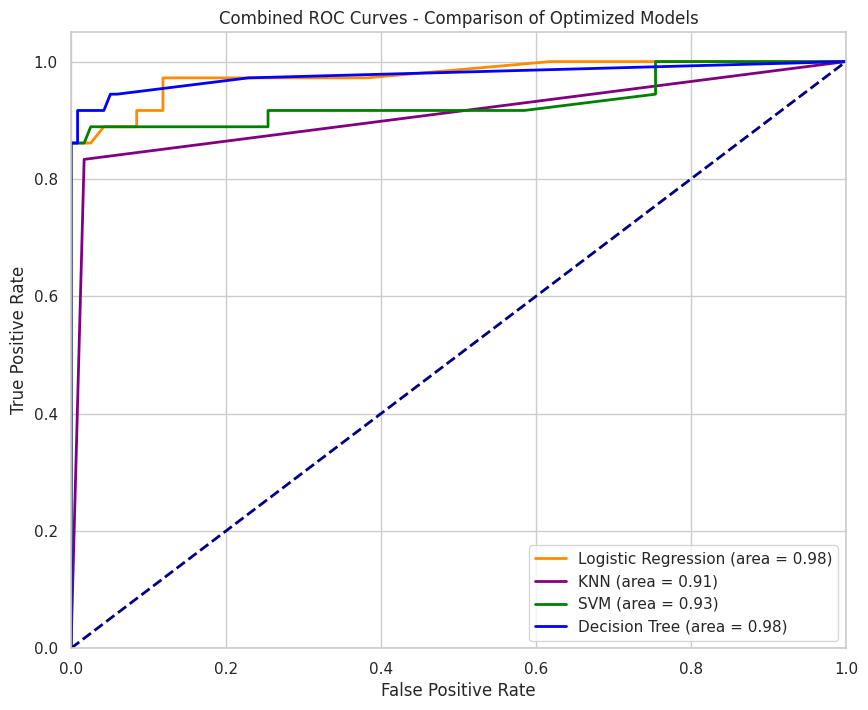

In [ ]:
# Combined ROC Curves - Model Performance on ER+ Breast Cancer Prediction

# Generate ROC curve values for each model
# Logistic Regression
y2_pred_prob = best_model.predict_proba(X1_test)[:, 1]
fpr_logistic_best, tpr_logistic_best, _ = roc_curve(y1_test, y2_pred_prob)
roc_auc_logistic_best = auc(fpr_logistic_best, tpr_logistic_best)

# KNN
final_pred_prob = full_cv_classifier.predict_proba(X2_test)[:, 1]
fpr_knn_optimized, tpr_knn_optimized, _ = roc_curve(y2_test, final_pred_prob)
roc_auc_knn_optimized = auc(fpr_knn_optimized, tpr_knn_optimized)

# SVM
y3_final_pred_prob = svm_final.predict_proba(X3_test)[:, 1]
fpr_svm_final, tpr_svm_final, _ = roc_curve(y3_test, y3_final_pred_prob)
roc_auc_svm_final = auc(fpr_svm_final, tpr_svm_final)

# Decision Tree
dt_best_pred_prob = best_dt_model.predict_proba(X4_test)[:, 1]
fpr_dt_best, tpr_dt_best, _ = roc_curve(y4_test, dt_best_pred_prob)
roc_auc_dt_best = auc(fpr_dt_best, tpr_dt_best)

# Now, let's plot all the ROC curves together
plt.figure(figsize=(10, 8))
plt.plot(fpr_logistic_best, tpr_logistic_best, color='darkorange', lw=2,
         label='Logistic Regression (area = %0.2f)' % roc_auc_logistic_best)
plt.plot(fpr_knn_optimized, tpr_knn_optimized, color='purple', lw=2,
         label='KNN (area = %0.2f)' % roc_auc_knn_optimized)
plt.plot(fpr_svm_final, tpr_svm_final, color='green', lw=2,
         label='SVM (area = %0.2f)' % roc_auc_svm_final)
plt.plot(fpr_dt_best, tpr_dt_best, color='blue', lw=2,
         label='Decision Tree (area = %0.2f)' % roc_auc_dt_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves - Comparison of Optimized Models')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### Train Test Split- Decision Trees

In [ ]:
# Train_Test Split and scaling for Decision Tree

# Target variable is stored in df_temp
y5 = df_temp['j_breast_has_mets']

X5_train, X5_test, y5_train, y5_test = train_test_split(features_scaled_significant_df, y5, test_size=0.2, random_state=100)

##### First Evaluation Matrix- Random Forest

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=100)

# Fit the model
rf_model.fit(X5_train, y5_train)

# Make Predictions
rf_predictions = rf_model.predict(X5_test)

# Evaluate the model
print(classification_report(y5_test, rf_predictions))
print(confusion_matrix(y5_test, rf_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

[[117   1]
 [  5  31]]


###### Feature Importance -Random Forest

In [ ]:
# Feature importances
rf_feature_importances = pd.DataFrame(rf_model.feature_importances_, index=features_scaled_significant_df.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

# Display the feature importances
print(rf_feature_importances)

                               Feature Importance
j_breast_behavior_3.0                    0.686548
j_breast_her2summ_5.0                    0.124737
j_breast_her2summ_3.0                    0.058542
j_breast_er_status_3.0                   0.037409
j_breast_trt_chemo_3.0                   0.025710
j_breast_pr_status_3.0                   0.019412
j_breast_trt_horm_1.0                    0.017500
j_breast_trt_surg_prim_yn_1.0            0.016116
j_breast_trt_horm_87.0                   0.007309
j_breast_trt_rad_1.0                     0.006717


##### Visualizing feature importance-random forest

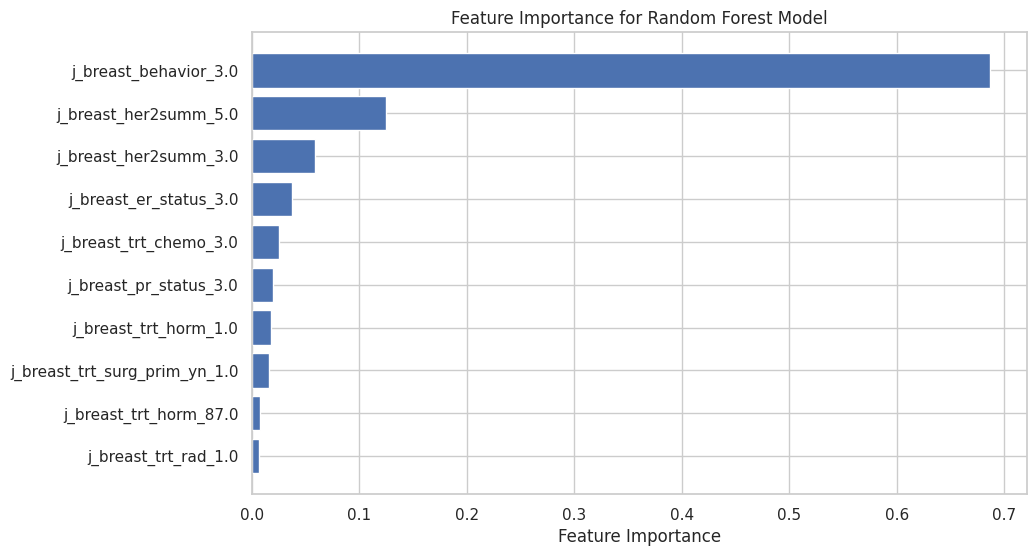

In [ ]:
# Visualizing the feature importances
sorted_idx_rf = rf_feature_importances['Feature Importance'].argsort()
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances.index[sorted_idx_rf], rf_feature_importances['Feature Importance'][sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')
plt.show()

###### Choosing correct number of trees

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

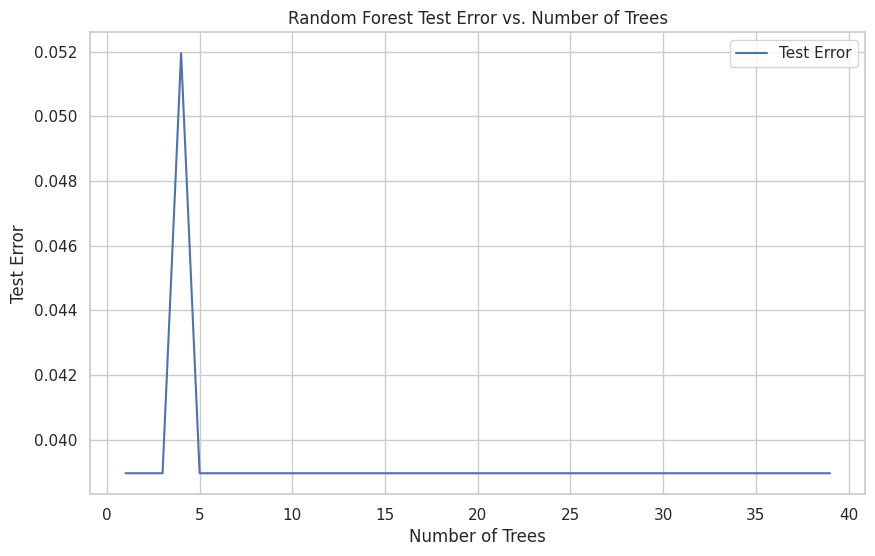

In [ ]:
# Preliminary Exploration
test_error = []

# Looping over a range of n_estimators to find the optimal number
for n in range(1, 40):
    model = RandomForestClassifier(n_estimators=n, max_features='auto', random_state=100)
    model.fit(X5_train, y5_train)
    test_preds = model.predict(X5_test)
    test_error.append(1 - accuracy_score(y5_test, test_preds))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), test_error, label='Test Error')
plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.title('Random Forest Test Error vs. Number of Trees')
plt.legend()
plt.show()


The test error is calculated as 1 - accuracy score, so a lower test error corresponds to higher accuracy.

This graph shows the error of our Random Forest model as we increase the number of trees. Initially, with just a few trees, the error is quite high, which is typical due to overfitting. But as we add more trees, the error decreases sharply, showing that our model's predictions are getting more accurate. After about 5 trees, the error levels off, indicating that adding more trees doesn't really help us much more. This sweet spot tells us we can use a relatively small forest to get good results without unnecessary computation.

######GridSearchCV-Random forest

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [64, 100, 128, 200],
    'max_features': [2, 3, 4],
    'bootstrap': [True],
    'oob_score': [True]  # Only applicable when bootstrap=True
}

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X5_train, y5_train)

# Best estimator and parameters
best_rfc = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Best out of bag score: ", best_rfc.oob_score_)

Best parameters found:  {'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}
Best out of bag score:  0.9869918699186991


##### Second Evaluation Matrix- Random Forest

In [ ]:
# Make predictions with the best Random Forest model on the test data
rf_best_predictions = best_rfc.predict(X5_test)

# Evaluate the model
print("Classification Report for Best Random Forest Model:")
print(classification_report(y5_test, rf_best_predictions))
print("Confusion Matrix for Best Random Forest Model:")
print(confusion_matrix(y5_test, rf_best_predictions))

Classification Report for Best Random Forest Model:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

Confusion Matrix for Best Random Forest Model:
[[117   1]
 [  5  31]]


######Confusion Matrix plot- Random Forest

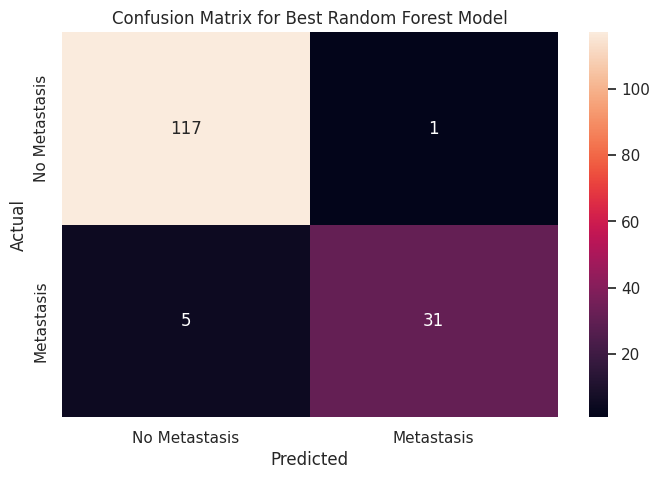

In [ ]:
# Visualizing Confusion Matrix for the best model
cm_rf_best = confusion_matrix(y5_test, rf_best_predictions)

plt.figure(figsize=(8,5))
sns.heatmap(cm_rf_best, annot=True, fmt='.0f',
            xticklabels=['No Metastasis', 'Metastasis'],
            yticklabels=['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

### ROC/AUC Curve- 1st Eval Matrix- Random forest

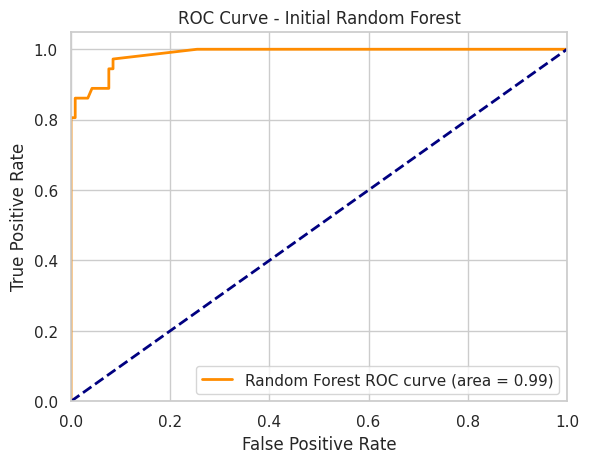

In [ ]:
# Predict probabilities for the positive class
rf_pred_prob = rf_model.predict_proba(X5_test)[:, 1]

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(y5_test, rf_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2,
         label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Initial Random Forest')
plt.legend(loc="lower right")
plt.show()


### ROC/AUC Curve- 2nd Eval Matrix- Random Forest

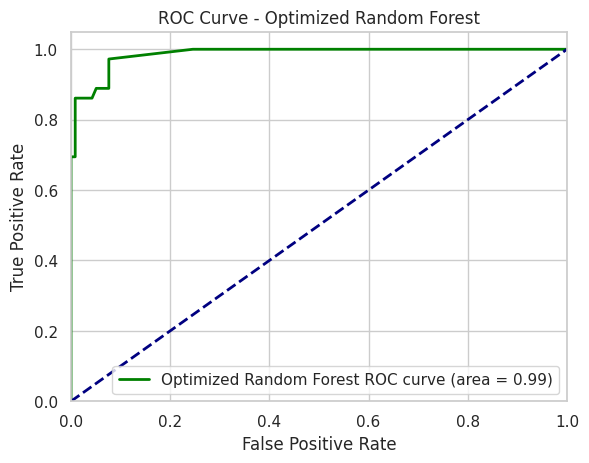

In [ ]:
# Predict probabilities for the positive class with the best Random Forest model
rf_best_pred_prob = best_rfc.predict_proba(X5_test)[:, 1]

# Compute ROC curve and ROC area for the best Random Forest model
fpr_rf_best, tpr_rf_best, _ = roc_curve(y5_test, rf_best_pred_prob)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

# Plot the ROC curve for the best Random Forest model
plt.figure()
plt.plot(fpr_rf_best, tpr_rf_best, color='green', lw=2,
         label='Optimized Random Forest ROC curve (area = %0.2f)' % roc_auc_rf_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Random Forest')
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting

In [ ]:
# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### Train Test Split- Gradient Boosting

In [ ]:
# Train_Test Split and scaling for Gradient Boosting

# Target variable is stored in df_temp
y6 = df_temp['j_breast_has_mets']

X6_train, X6_test, y6_train, y6_test = train_test_split(features_scaled_significant_df, y6, test_size=0.2, random_state=100)

##### First Evaluation Matrix- Gradient Boosting

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=100)

# Fit the model
gb_model.fit(X6_train, y6_train)

# Make Predictions
gb_predictions = gb_model.predict(X6_test)

# Evaluate the model
print(classification_report(y6_test, gb_predictions))
print(confusion_matrix(y6_test, gb_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

[[117   1]
 [  5  31]]


###### Feature Importance - Gradient Boosting

In [ ]:
# Feature importances
gb_feature_importances = pd.DataFrame(gb_model.feature_importances_, index=features_scaled_significant_df.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

# Display the feature importances
print(gb_feature_importances)

                               Feature Importance
j_breast_behavior_3.0                    0.979208
j_breast_her2summ_5.0                    0.005718
j_breast_trt_surg_prim_yn_1.0            0.004890
j_breast_er_status_3.0                   0.003652
j_breast_trt_rad_1.0                     0.002019
j_breast_trt_horm_1.0                    0.001762
j_breast_trt_chemo_3.0                   0.001073
j_breast_her2summ_3.0                    0.000901
j_breast_pr_status_3.0                   0.000742
j_breast_trt_horm_87.0                   0.000034


##### Visualizing feature importance-Gradient Boosting

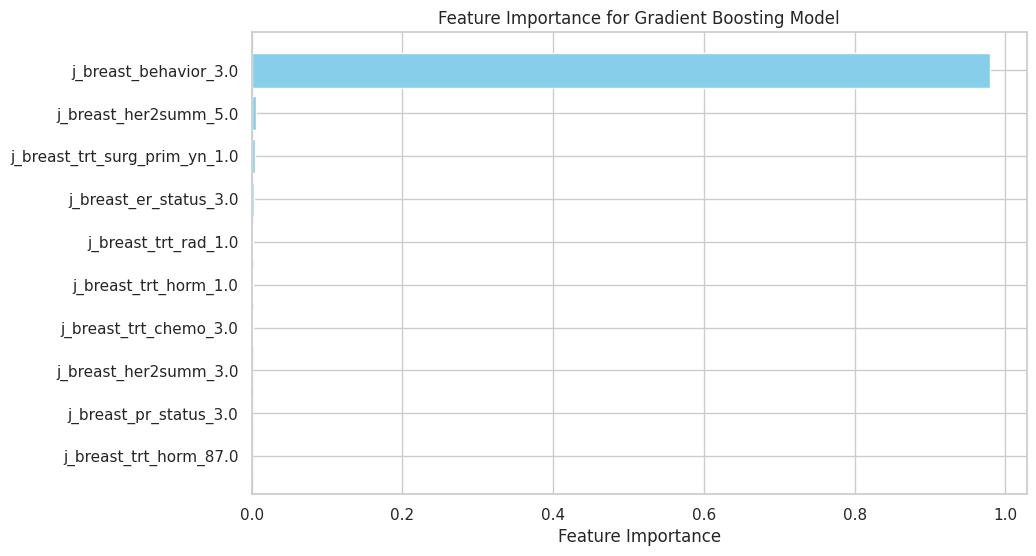

In [ ]:
# Visualizing the feature importances

sorted_idx_gb = gb_feature_importances['Feature Importance'].argsort()
plt.figure(figsize=(10, 6))
plt.barh(gb_feature_importances.index, gb_feature_importances['Feature Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()

######GridSearchCV-Gradient Boosting

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=100), param_grid_gb, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_gb.fit(X6_train, y6_train)

# Best estimator and parameters
best_gb_model = grid_search_gb.best_estimator_
print("Best parameters found: ", grid_search_gb.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


##### Second Evaluation Matrix- Gradient Boosting

In [ ]:
# Make predictions with the best Random Forest model on the test data
gb_best_predictions = best_gb_model.predict(X6_test)

# Evaluate the model
print("Classification Report for Best Gradient Boosting Model:")
print(classification_report(y6_test, gb_best_predictions))
print("Confusion Matrix for Best Gradient Boosting Model:")
print(confusion_matrix(y6_test, gb_best_predictions))

Classification Report for Best Gradient Boosting Model:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

Confusion Matrix for Best Gradient Boosting Model:
[[117   1]
 [  5  31]]


######Confusion Matrix plot- Gradient Boosting

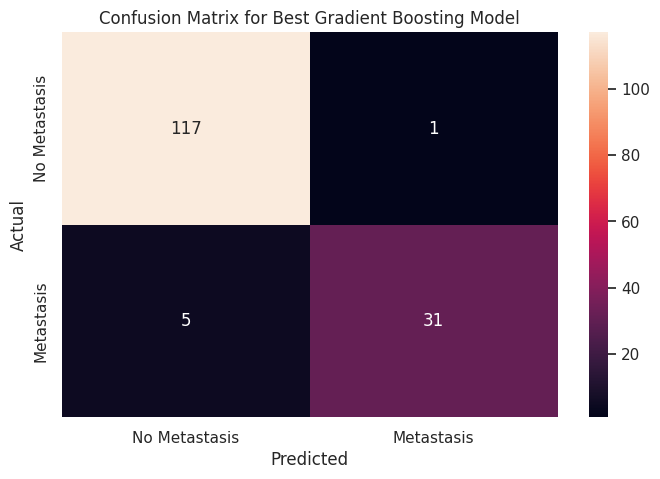

In [ ]:
# Visualizing Confusion Matrix for the best model
cm_gb_best = confusion_matrix(y6_test, gb_best_predictions)

plt.figure(figsize=(8,5))
sns.heatmap(cm_gb_best, annot=True, fmt='.0f',
            xticklabels=['No Metastasis', 'Metastasis'],
            yticklabels=['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Best Gradient Boosting Model')
plt.show()

### ROC/AUC Curve- 1st Eval Matrix- Gradient Boosting

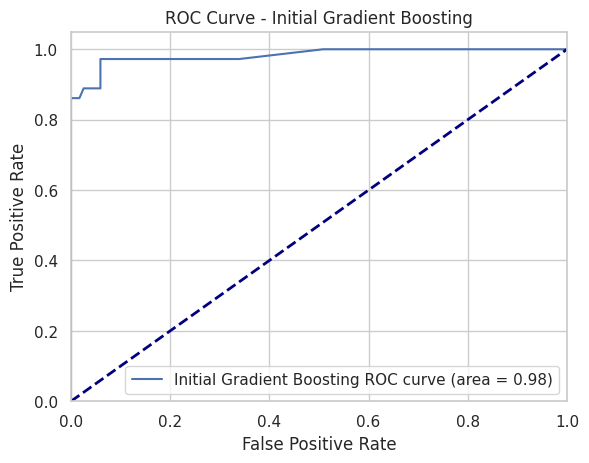

In [ ]:
# Predict probabilities for the positive class
gb_pred_prob = gb_model.predict_proba(X6_test)[:, 1]

# Compute ROC curve and ROC area
fpr_gb, tpr_gb, _ = roc_curve(y6_test, gb_pred_prob)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_gb, tpr_gb,
         label='Initial Gradient Boosting ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Initial Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

### ROC/AUC Curve- 2nd Eval Matrix- Gradient Boosting

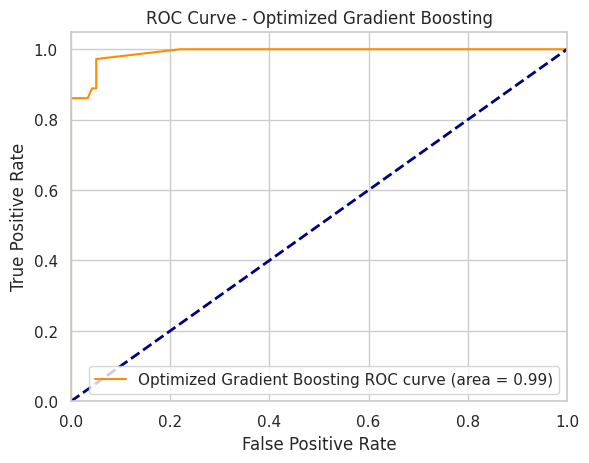

In [ ]:
# Predict probabilities for the positive class
gb_best_pred_prob = best_gb_model.predict_proba(X6_test)[:, 1]

# Compute ROC curve and ROC area for the best Gradient Boosting model
fpr_gb_best, tpr_gb_best, _ = roc_curve(y6_test, gb_best_pred_prob)
roc_auc_gb_best = auc(fpr_gb_best, tpr_gb_best)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_gb_best, tpr_gb_best,
         label='Optimized Gradient Boosting ROC curve (area = %0.2f)' % roc_auc_gb_best, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [ ]:
# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### Train Test Split- XGBoost

In [ ]:
# Train_Test Split and scaling for Gradient Boosting

# Target variable is stored in df_temp
y7 = df_temp['j_breast_has_mets']
X7_train, X7_test, y7_train, y7_test = train_test_split(features_scaled_significant_df, y7, test_size=0.2, random_state=100)

##### First Evaluation Matrix- XGBoost

In [ ]:
# Initialize the Gradient Boosting Classifier
xg_model = xgb.XGBClassifier(random_state=100, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xg_model.fit(X7_train, y7_train)

# Make Predictions
xg_predictions = xg_model.predict(X7_test)

# Evaluate the model
print(classification_report(y7_test, xg_predictions))
print(confusion_matrix(y7_test, xg_predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       118
         1.0       0.97      0.86      0.91        36

    accuracy                           0.96       154
   macro avg       0.96      0.93      0.94       154
weighted avg       0.96      0.96      0.96       154

[[117   1]
 [  5  31]]


###### Feature Importance - XGBoost

In [ ]:
# Feature importances
xg_feature_importances = pd.DataFrame(xg_model.feature_importances_, index=features_scaled_significant_df.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

# Display the feature importances
print(xg_feature_importances)

                               Feature Importance
j_breast_behavior_3.0                    0.977651
j_breast_trt_chemo_3.0                   0.006499
j_breast_er_status_3.0                   0.004015
j_breast_her2summ_5.0                    0.003124
j_breast_pr_status_3.0                   0.002532
j_breast_trt_surg_prim_yn_1.0            0.002435
j_breast_her2summ_3.0                    0.001402
j_breast_trt_rad_1.0                     0.001227
j_breast_trt_horm_1.0                    0.001115
j_breast_trt_horm_87.0                   0.000000


##### Visualizing feature importance-XGBoost

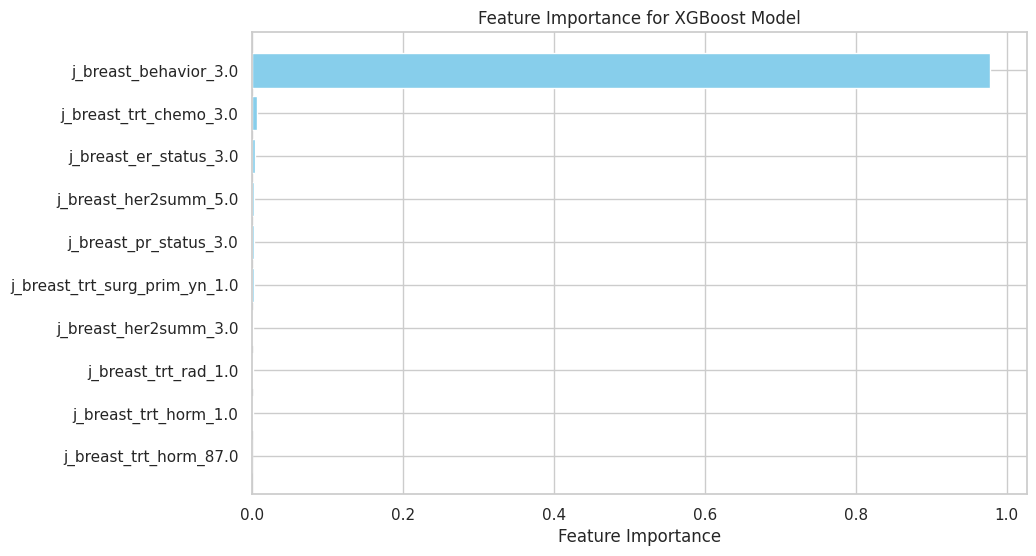

In [ ]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(xg_feature_importances.index, xg_feature_importances['Feature Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGBoost Model')
plt.gca().invert_yaxis()
plt.show()

#####GridSearchCV-XGBoost

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_xg = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.3, 0.5, 0.7]
}

# Initialize GridSearchCV
grid_search_xg = GridSearchCV(xgb.XGBClassifier(random_state=100, use_label_encoder=False, eval_metric='logloss'), param_grid_xg, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_xg.fit(X7_train, y7_train)

# Best estimator and parameters
best_xg_model = grid_search_xg.best_estimator_
print("Best parameters found: ", grid_search_xg.best_params_)

Best parameters found:  {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


##### Second Evaluation Matrix- XGBoost

In [ ]:
# Make predictions with the best XGBoost model on the test data
xg_best_predictions = best_xg_model.predict(X7_test)

# Evaluate the model
print("Classification Report for Best XGBoost Model:")
print(classification_report(y7_test, xg_best_predictions))
print("Confusion Matrix for Best XGBoost Model:")
print(confusion_matrix(y7_test, xg_best_predictions))

Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154

Confusion Matrix for Best XGBoost Model:
[[118   0]
 [  5  31]]


######Confusion Matrix plot- XGBoost

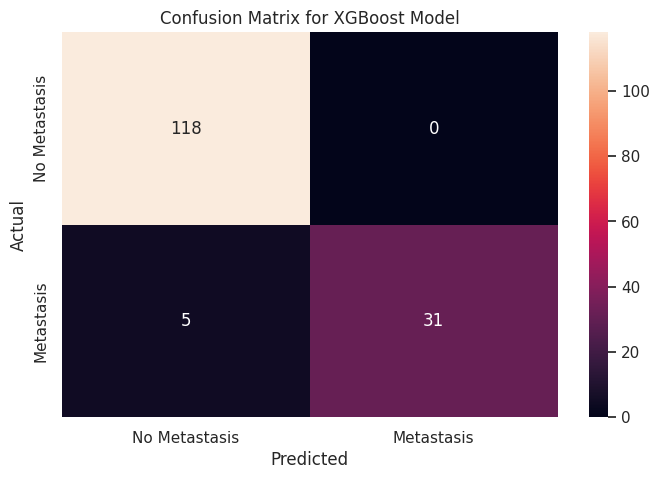

In [ ]:
cm_xg = confusion_matrix(y7_test, xg_best_predictions)
plt.figure(figsize=(8,5))
sns.heatmap(cm_xg, annot=True, fmt='.0f', xticklabels=['No Metastasis', 'Metastasis'], yticklabels=['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


### ROC/AUC Curve- 1st Eval Matrix- XGBoost

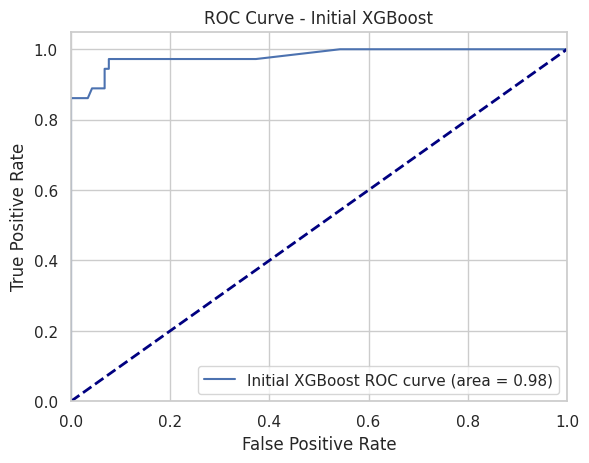

In [ ]:
# Predict probabilities for the positive class
xg_pred_prob = xg_model.predict_proba(X7_test)[:, 1]

# Compute ROC curve and ROC area
fpr_xg, tpr_xg, _ = roc_curve(y7_test, xg_pred_prob)
roc_auc_xg = auc(fpr_xg, tpr_xg)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_xg, tpr_xg,
         label='Initial XGBoost ROC curve (area = %0.2f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Initial XGBoost')
plt.legend(loc="lower right")
plt.show()

### ROC/AUC Curve- 2nd Eval Matrix- XGBoost

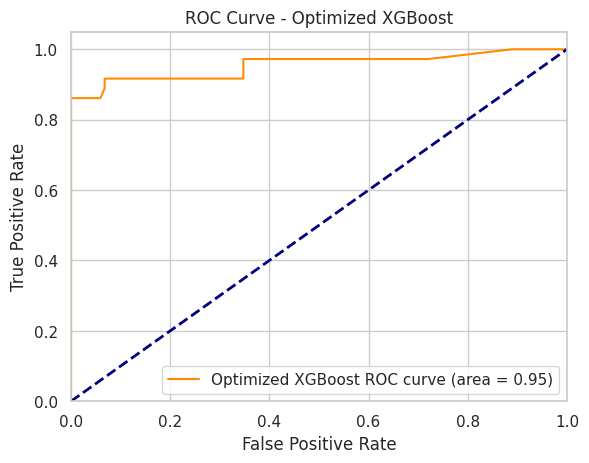

In [ ]:
# Predict probabilities for the positive class with the best model
xg_best_pred_prob = best_xg_model.predict_proba(X7_test)[:, 1]

# Compute ROC curve and ROC area for the best model
fpr_xg_best, tpr_xg_best, _ = roc_curve(y7_test, xg_best_pred_prob)
roc_auc_xg_best = auc(fpr_xg_best, tpr_xg_best)

# Plot the ROC curve for the best XGBoost model
plt.figure()
plt.plot(fpr_xg_best, tpr_xg_best, label='Optimized XGBoost ROC curve (area = %0.2f)' % roc_auc_xg_best, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized XGBoost')
plt.legend(loc="lower right")
plt.show()

## AdaBoost

In [ ]:
# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
features_scaled_significant_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### Train Test Split- AdaBoost

In [ ]:
# Train_Test Split and scaling for Gradient Boosting

# Train_Test Split and scaling for AdaBoost
y8 = df_temp['j_breast_has_mets']
X8_train, X8_test, y8_train, y8_test = train_test_split(features_scaled_significant_df, y8, test_size=0.2, random_state=100)

##### First Evaluation Matrix- AdaBoost

In [ ]:
# Initialize the AdaBoost Classifier
ab_model = AdaBoostClassifier(random_state=100)

# Fit the model
ab_model.fit(X8_train, y8_train)

# Make Predictions
ab_predictions = ab_model.predict(X8_test)

# Evaluate the model
print(classification_report(y8_test, ab_predictions))
print(confusion_matrix(y8_test, ab_predictions))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154

[[118   0]
 [  5  31]]


###### Feature Importance - AdaBoost

In [ ]:
# Feature importances
ab_feature_importances = pd.DataFrame(ab_model.feature_importances_, index=features_scaled_significant_df.columns, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

# Display the feature importances
print(ab_feature_importances)

                               Feature Importance
j_breast_trt_rad_1.0                         0.22
j_breast_her2summ_5.0                        0.20
j_breast_her2summ_3.0                        0.18
j_breast_trt_horm_1.0                        0.12
j_breast_trt_surg_prim_yn_1.0                0.08
j_breast_pr_status_3.0                       0.08
j_breast_behavior_3.0                        0.04
j_breast_trt_horm_87.0                       0.04
j_breast_trt_chemo_3.0                       0.02
j_breast_er_status_3.0                       0.02


##### Visualizing feature importance-AdaBoost

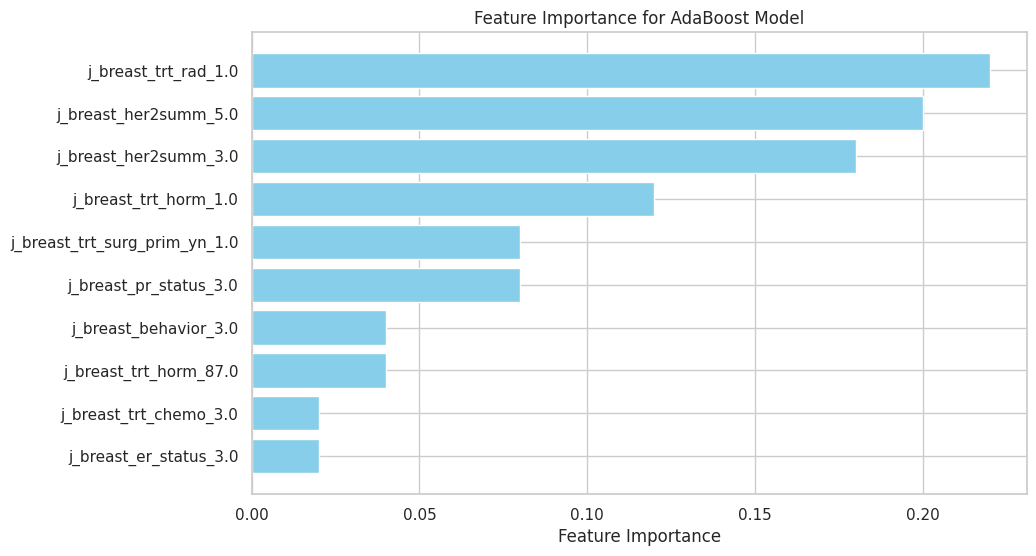

In [ ]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(ab_feature_importances.index, ab_feature_importances['Feature Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for AdaBoost Model')
plt.gca().invert_yaxis()
plt.show()

#####GridSearchCV-AdaBoost

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize GridSearchCV
grid_search_ab = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=100), param_grid_ab, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_ab.fit(X8_train, y8_train)

# Best estimator and parameters
best_ab_model = grid_search_ab.best_estimator_
print("Best parameters found: ", grid_search_ab.best_params_)

Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 50}


##### Second Evaluation Matrix- AdaBoost

In [ ]:
# Make predictions with the best AdaBoost model on the test data
ab_best_predictions = best_ab_model.predict(X8_test)

# Evaluate the model
print("Classification Report for Best AdaBoost Model:")
print(classification_report(y8_test, ab_best_predictions))
print("Confusion Matrix for Best AdaBoost Model:")
print(confusion_matrix(y8_test, ab_best_predictions))

Classification Report for Best AdaBoost Model:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       118
         1.0       1.00      0.86      0.93        36

    accuracy                           0.97       154
   macro avg       0.98      0.93      0.95       154
weighted avg       0.97      0.97      0.97       154

Confusion Matrix for Best AdaBoost Model:
[[118   0]
 [  5  31]]


######Confusion Matrix plot- AdaBoost

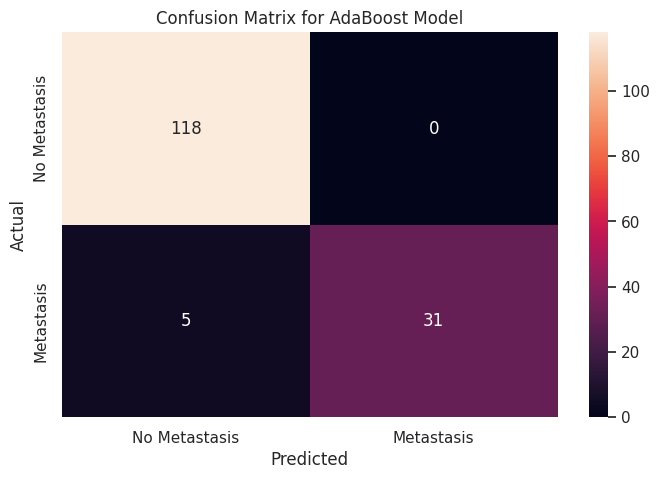

In [ ]:
cm_ab = confusion_matrix(y8_test, ab_best_predictions)
plt.figure(figsize=(8,5))
sns.heatmap(cm_ab, annot=True, fmt='.0f', xticklabels=['No Metastasis', 'Metastasis'], yticklabels=['No Metastasis', 'Metastasis'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for AdaBoost Model')
plt.show()


### ROC/AUC Curve- 1st Eval Matrix- AdaBoost

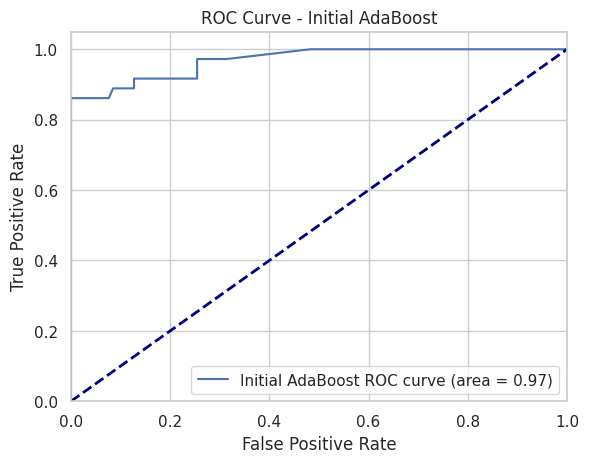

In [ ]:
# Predict probabilities for the positive class with the initial AdaBoost model
ab_pred_prob = ab_model.predict_proba(X8_test)[:, 1]

# Compute ROC curve and ROC area for the initial AdaBoost model
fpr_ab, tpr_ab, _ = roc_curve(y8_test, ab_pred_prob)
roc_auc_ab = auc(fpr_ab, tpr_ab)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_ab, tpr_ab,
         label='Initial AdaBoost ROC curve (area = {:.2f})'.format(roc_auc_ab))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Initial AdaBoost')
plt.legend(loc="lower right")
plt.show()

### ROC/AUC Curve- 2nd Eval Matrix- AdaBoost

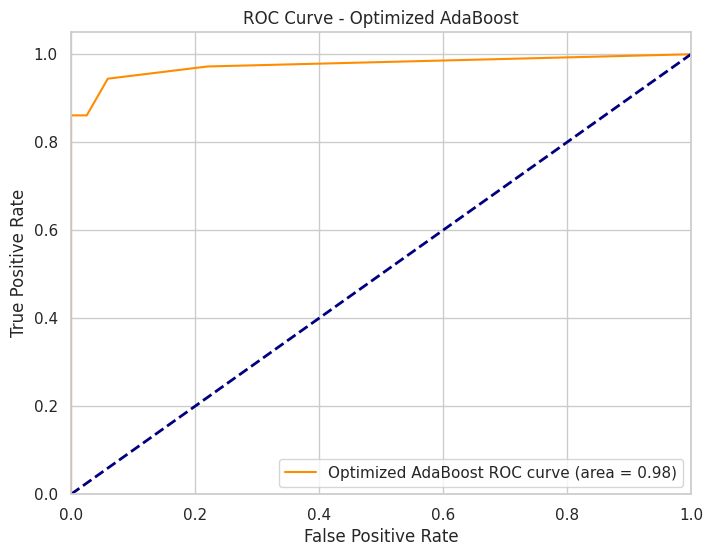

In [ ]:
# Predict probabilities for the positive class with the best AdaBoost model from GridSearchCV
ab_best_pred_prob = best_ab_model.predict_proba(X8_test)[:, 1]

# Compute ROC curve and ROC area for the best AdaBoost model
fpr_ab_best, tpr_ab_best, _ = roc_curve(y8_test, ab_best_pred_prob)
roc_auc_ab_best = auc(fpr_ab_best, tpr_ab_best)

# Plot the ROC curve for the best AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_ab_best, tpr_ab_best, label='Optimized AdaBoost ROC curve (area = {:.2f})'.format(roc_auc_ab_best), color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized AdaBoost')
plt.legend(loc="lower right")
plt.show()

######2nd Combined ROC Curves

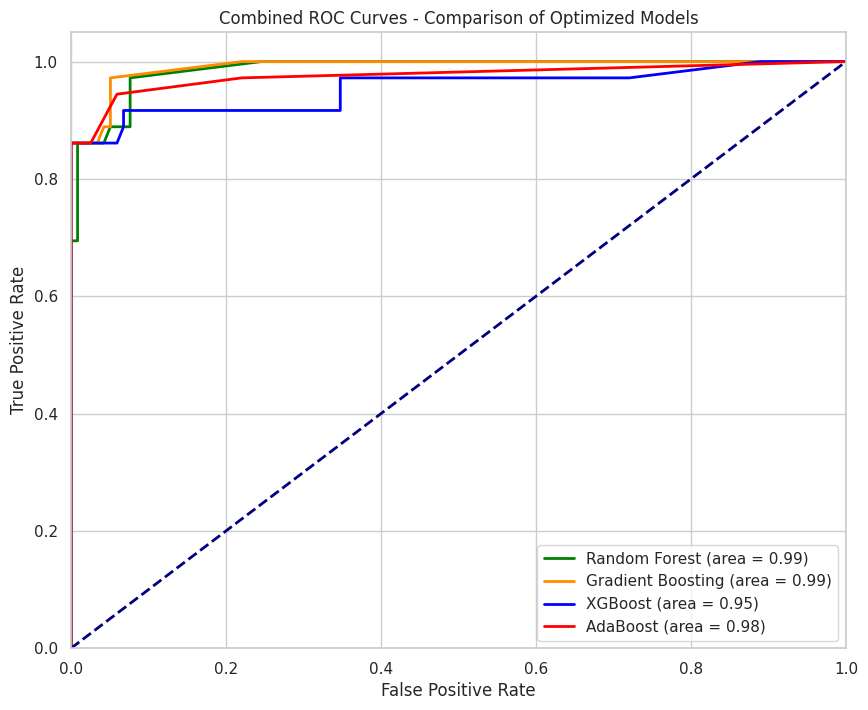

In [ ]:
# Combined ROC Curves - Model Performance on ER+ Breast Cancer Prediction

# Generate ROC curve values for each model
# Random Forest
fpr_rf_best, tpr_rf_best, _ = roc_curve(y5_test, rf_best_pred_prob)
roc_auc_rf_best = auc(fpr_rf_best, tpr_rf_best)

# Gradient Boosting
fpr_gb_best, tpr_gb_best, _ = roc_curve(y6_test, gb_best_pred_prob)
roc_auc_gb_best = auc(fpr_gb_best, tpr_gb_best)

# XGBoost
fpr_xg_best, tpr_xg_best, _ = roc_curve(y7_test, xg_best_pred_prob)
roc_auc_xg_best = auc(fpr_xg_best, tpr_xg_best)

# AdaBoost
fpr_ab_best, tpr_ab_best, _ = roc_curve(y8_test, ab_best_pred_prob)
roc_auc_ab_best = auc(fpr_ab_best, tpr_ab_best)

# Plot all the ROC curves together
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf_best, tpr_rf_best, color='green', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf_best)
plt.plot(fpr_gb_best, tpr_gb_best, color='darkorange', lw=2, label='Gradient Boosting (area = %0.2f)' % roc_auc_gb_best)
plt.plot(fpr_xg_best, tpr_xg_best, color='blue', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xg_best)
plt.plot(fpr_ab_best, tpr_ab_best, color='red', lw=2, label='AdaBoost (area = {:.2f})'.format(roc_auc_ab_best))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves - Comparison of Optimized Models')
plt.legend(loc="lower right")
plt.show()

## MAKING PREDICTIONS

In [ ]:
# MAKING PREDICTIONS -using Logistic Regression Model

# Select the 41st row from the test set (since Python is 0-indexed, the 41st row is indexed by 40)
row_number = 40
sample_to_predict = X1_test.iloc[row_number].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction = logistic_model.predict(sample_to_predict)

# Get the actual label for comparison
actual_label = y1_test.iloc[row_number]

# Output the results
print(f"Model's predicted class for the 41st test sample: {prediction[0]}")
print(f"Actual class for the 41st test sample: {actual_label}")

Model's predicted class for the 41st test sample: 0.0
Actual class for the 41st test sample: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# MAKING PREDICTIONS -using Random Forest Model

# Select the 51st row from the test set (indexed by 51)
sample_to_predict = X5_test.iloc[51].values.reshape(1, -1)

# Make the prediction using the random forest model
prediction = rf_model.predict(sample_to_predict)

# Get the actual label for comparison
actual_label = y5_test.iloc[51]

# Output the results
print(f"Random Forest model's predicted class for the 51st test sample: {prediction[0]}")
print(f"Actual class for the 51st test sample: {actual_label}")


Random Forest model's predicted class for the 51st test sample: 1.0
Actual class for the 51st test sample: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###### Extracting Data

In [ ]:
# Extracting Data for the 51st Sample
sample_data = X5_test.iloc[50]

# To view the data
print(sample_data)

j_breast_behavior_3.0            0.494304
j_breast_trt_surg_prim_yn_1.0    0.303858
j_breast_trt_chemo_3.0           2.291731
j_breast_trt_rad_1.0            -0.923587
j_breast_trt_horm_1.0            1.003909
j_breast_trt_horm_87.0          -0.197963
j_breast_er_status_3.0           0.618945
j_breast_pr_status_3.0           0.826265
j_breast_her2summ_3.0           -1.049330
j_breast_her2summ_5.0           -0.737683
Name: 97, dtype: float64


In [ ]:
# Extracting the 51st row from the original dataset
sample_data = df_temp.iloc[50]

# Display the data to get an overview
print(sample_data)

plco_id                                        B-084771-7
harm_build                                       08.23.23
build                              t20231107_r3_j20231204
j_breast_topography                                  C504
j_breast_morphology                                8211.0
j_breast_grade                                        9.0
j_breast_behavior                                     3.0
j_breast_cancer_diagdays                            786.0
j_breast_laterality                                   2.0
j_breast_nodes_examined                               NaN
j_breast_nodes_positive                               NaN
j_breast_cs_tumor_size                                NaN
j_breast_trt_rad_modality                            20.0
j_breast_trt_brm                                      0.0
j_breast_trt_chemo                                    0.0
j_breast_trt_horm                                     0.0
j_breast_trt_rad                                      1.0
j_breast_trt_s

In [ ]:
fav_features = [
    'j_breast_behavior', 'j_breast_trt_surg_prim_yn',
    'j_breast_trt_chemo', 'j_breast_trt_rad',
    'j_breast_trt_horm', 'j_breast_trt_horm',
    'j_breast_er_status', 'j_breast_pr_status',
    'j_breast_her2summ', 'j_breast_her2summ'
]


In [ ]:
# Select the specific row and columns from the dataframe using iloc
sample_index = 50

sample2 = df_temp.iloc[sample_index][fav_features]

# Display the data
print(sample2)

j_breast_behavior            3.0
j_breast_trt_surg_prim_yn    1.0
j_breast_trt_chemo           0.0
j_breast_trt_rad             1.0
j_breast_trt_horm            0.0
j_breast_trt_horm            0.0
j_breast_er_status           3.0
j_breast_pr_status           3.0
j_breast_her2summ            3.0
j_breast_her2summ            3.0
Name: 5864, dtype: object


# UNSUPERVISED LEARNING

## K-Means Clustering

In [ ]:
# Data Preprocessing
# Standardization of significant features
scaler = StandardScaler()
features_scaled_significant = scaler.fit_transform(df_final_significant)
X9_scaled_df = pd.DataFrame(features_scaled_significant, columns=significant_vars)

##### K-means Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

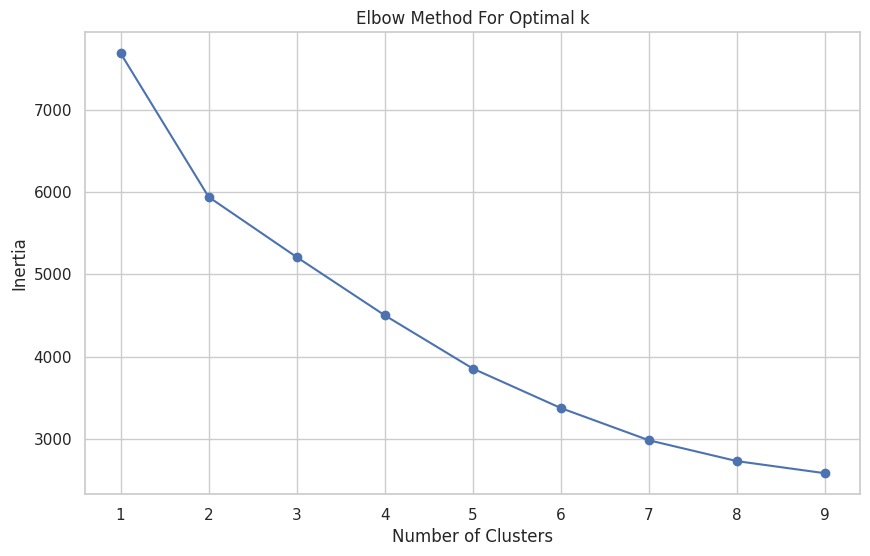

In [ ]:
# Choosing the Number of Clusters with the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(X9_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


- We can observe from the graph above that the inertia drops significantly as the number of clusters increases from 1 to 2, and from 2 to 3. However, after 3 clusters, the rate of decrease in inertia starts to level off, indicating that adding more clusters doesn't provide as much new information.

- To determine the number of clusters, we are looking for the "elbow" point, which is the point at which the inertia no longer decreases dramatically with each additional cluster. In this case, the "elbow" seems to be at **k = 3**. This suggests that 3 is a good number of clusters to try for our K-means algorithm and a good balance between the number of clusters and the compactness of the clustering.

###### K-means Number

In [ ]:
# Applying K-means with the chosen number of clusters, let's say k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=100)
X9_kmeans_cluster_labels = kmeans.fit_predict(X9_scaled_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The 'fit_predict' method assigns each data point in X9_scaled_df to one of the three clusters.

##### Model Evaluation- K-Means

In [ ]:
# Evaluating the Model using Silhouette Score
silhouette_avg = silhouette_score(X9_scaled_df, X9_kmeans_cluster_labels)
print(f'Silhouette Score for k={k}: {silhouette_avg}')

Silhouette Score for k=3: 0.2999745644683643


The silhouette score is a measure of how similar an object is to its own cluster(cohesion) compared to other clusters(separation). A higher silhouette score indicates better-defined clusters. The silhouette score is one of the most commonly used metrics because it balances both cohesion and separation, which are the key characteristics of a good clustering.

We obtained a silhouette score of approximately **0.30 for our 3-cluster solution**. This metric falls within the 0.26-0.50 range, which indicates a weak to moderate separation between clusters. The score ranges from -1 to 1 and it's interpretation is as follows:

- A score near +1 implies clear separation and well-defined clusters.

- A score near 0 implies hat the clusters are not well-separated and that there might be considerable overlap between them.

- A score near -1 implies incorrect clustering.

In our case, the silhouette score suggests that while the clusters are not highly distinct, there is some separation present. In other words, the boundaries between different clusters aren't very clear, and some data points that belong to different clusters may be quite similar to each other. The clusters are not random but could potentially be made more cohesive and distinct with further refinement.

##### Analyzing Clusters- K-means

In [ ]:
# Analyzing Clusters - Observing mean values of features in each cluster
X9_scaled_df['KMeans_Cluster'] = X9_kmeans_cluster_labels
cluster_means = X9_scaled_df.groupby('KMeans_Cluster').mean()
print(cluster_means)

                j_breast_behavior_3.0  j_breast_trt_surg_prim_yn_1.0  \
KMeans_Cluster                                                         
0                            0.392387                       0.070992   
1                           -0.723438                      -0.178381   
2                           -0.547358                       0.303858   

                j_breast_trt_chemo_3.0  j_breast_trt_rad_1.0  \
KMeans_Cluster                                                 
0                            -0.022169              0.055206   
1                             0.095957             -0.132476   
2                            -0.436351              0.183350   

                j_breast_trt_horm_1.0  j_breast_trt_horm_87.0  \
KMeans_Cluster                                                  
0                            0.364228               -0.197963   
1                           -0.613990               -0.197963   
2                           -0.996106                5.051

The cluster means above are the average values of each feature within each cluster. A **positive mean value** for a feature in a cluster means that this feature is, on average, higher in that cluster compared to the dataset as a whole. The larger the value, the more pronounced this feature is within the cluster. Conversely, a **negative mean value** indicates that the feature is lower on average within the cluster than in the dataset overall.

For instance, the feature j_breast_behavior_3.0, Cluster 0 has a mean of 0.392387. This suggests that the value of this feature is higher in Cluster 0 than the dataset's average. Cluster 1 has a mean of -0.723438 for the same feature, indicating this feature is less common or lower within Cluster 1.

##### Visualizing K-means Clusters

<ipython-input-219-24c6674df2e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KMeans_Cluster', data=X9_scaled_df, palette='Set2')


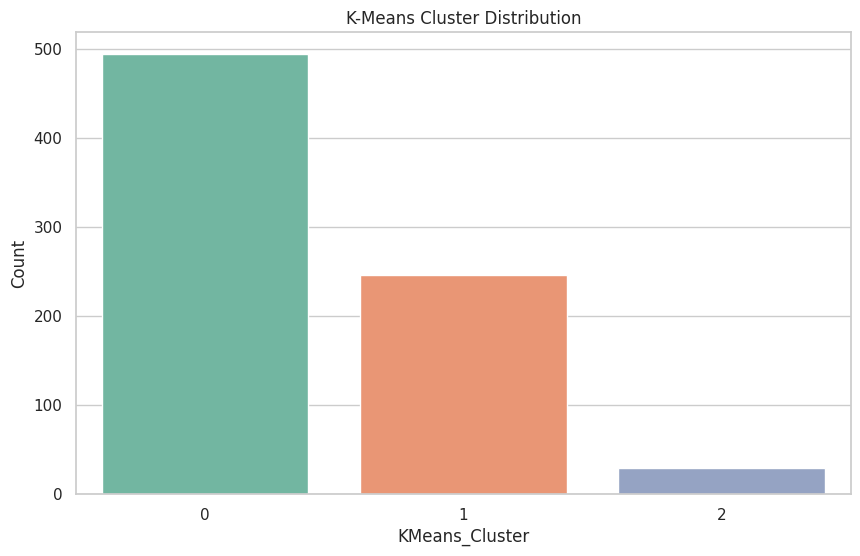

In [ ]:
# Visualize the distribution of clusters

plt.figure(figsize=(10, 6))
sns.countplot(x='KMeans_Cluster', data=X9_scaled_df, palette='Set2')
plt.title('K-Means Cluster Distribution')
plt.xlabel('KMeans_Cluster')
plt.ylabel('Count')
plt.show()


- Using the Elbow Method, we determined that k = 3 is the optimal number of clusters for our dataset. This means that the data is best grouped into three distinct categories based on the features we analyzed.

- The distribution of data points among the three clusters is notably imbalanced. The first cluster (Cluster 0) is the largest, containing the majority of data points. The second cluster (Cluster 1) has a moderate count, while the third cluster (Cluster 2) is significantly smaller. This suggests that Cluster 0 may represent a general grouping common across many data points, Cluster 1 a less common grouping, and Cluster 2 a specific or perhaps more unique grouping within the dataset.

### Making Predictions using K-means

In [ ]:
X9_scaled_df.head()

j_breast_behavior_3.0  j_breast_trt_surg_prim_yn_1.0  \
0               0.494304                       0.303858   
1               0.494304                       0.303858   
2              -2.023046                       0.303858   
3               0.494304                       0.303858   
4               0.494304                       0.303858   

   j_breast_trt_chemo_3.0  j_breast_trt_rad_1.0  j_breast_trt_horm_1.0  \
0               -0.436351              1.082736              -0.996106   
1               -0.436351             -0.923587               1.003909   
2               -0.436351             -0.923587              -0.996106   
3               -0.436351              1.082736              -0.996106   
4               -0.436351             -0.923587              -0.996106   

   j_breast_trt_horm_87.0  j_breast_er_status_3.0  j_breast_pr_status_3.0  \
0               -0.197963                0.618945                0.826265   
1               -0.197963                0.618945                0.826265   
2               -0.197963                0.618945               -1.210266   
3               -0.197963                0.618945                0.826265   
4               -0.197963                0.618945                0.826265   

   j_breast_her2summ_3.0  j_breast_her2summ_5.0  KMeans_Cluster  
0               0.952989              -0.737683               0  
1               0.952989              -0.737683               0  
2               0.952989              -0.737683               1  
3               0.952989              -0.737683               0  
4               0.952989              -0.737683               0

In [ ]:
# Making predictions using K-MEANS clustering model on the 51st sample at index 50

# Remove the 'Cluster' column before predicting
sample_features_kmeans = X9_scaled_df.drop(columns=['KMeans_Cluster'])

# Extracting the sample data (using .values.reshape(1, -1) to get it in the right shape for prediction)
sample_data_kmeans = sample_features_kmeans.iloc[50].values.reshape(1, -1)

# Use the trained kmeans model to predict the cluster for the sample data
sample_cluster_label = kmeans.predict(sample_data_kmeans)

print(f"The 51st sample was assigned to cluster {sample_cluster_label[0]}.")


The 51st sample was assigned to cluster 0.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**Comparison of Random Forest and K-Means Outcomes:**

**Model Objectives:**
- Random Forest is a supervised learning algorithm that predicts specific outcomes (e.g., metastasis) based on labeled training data.
K-Means is an unsupervised learning algorithm that groups data into clusters based on similarities in features, without using any outcome labels.

**Outcome Interpretation:**
- In Random Forest, a prediction of '1' for a sample indicates that, based on learned patterns from labeled data, this sample likely corresponds to a metastasis case.
- In K-Means, a sample’s assignment to cluster '0' merely indicates that it shares similar characteristics with other samples in that cluster. This assignment does not inherently relate to metastasis or lack thereof.

**Differences in Results:**
- The prediction by Random Forest that the 51st sample is '1' (metastasis) is based on the model's training to recognize patterns associated with metastasis.
The assignment of the same sample to cluster '0' by K-Means does not confirm or deny metastasis; it groups the sample based on feature similarity with no reference to the metastasis labels.

**Using Both Models:**
T- hese models provide complementary insights: Random Forest for predicting based on past labeled examples, and K-Means for exploring natural groupings in the data.
- Examining metastasis prevalence within K-Means clusters could potentially reveal if certain clusters align with higher or lower rates of metastasis, offering a hypothesis for further investigation.

**Conclusion:**
While the outcomes of Random Forest and K-Means may not directly align, both provide valuable perspectives. Random Forest directly addresses the prediction of metastasis, while K-Means offers a way to understand the structure and grouping within the data based on feature similarity. Comparing these results can enhance understanding and inform further analysis.

## Hierarchical Clustering

In [ ]:
# Standardization of significant features

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_final_significant)
X10_scaled_df = pd.DataFrame(features_scaled, columns=significant_vars)

###### Linkage Method

In [ ]:
# Choosing the Right Linkage Method
# There are various methods like "ward", "single", "complete", "average". "Ward" minimizes the variance of the clusters being merged.

# Using the 'ward' linkage method
linkage_matrix = linkage(X10_scaled_df, 'ward')

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1500x800 with 0 Axes>

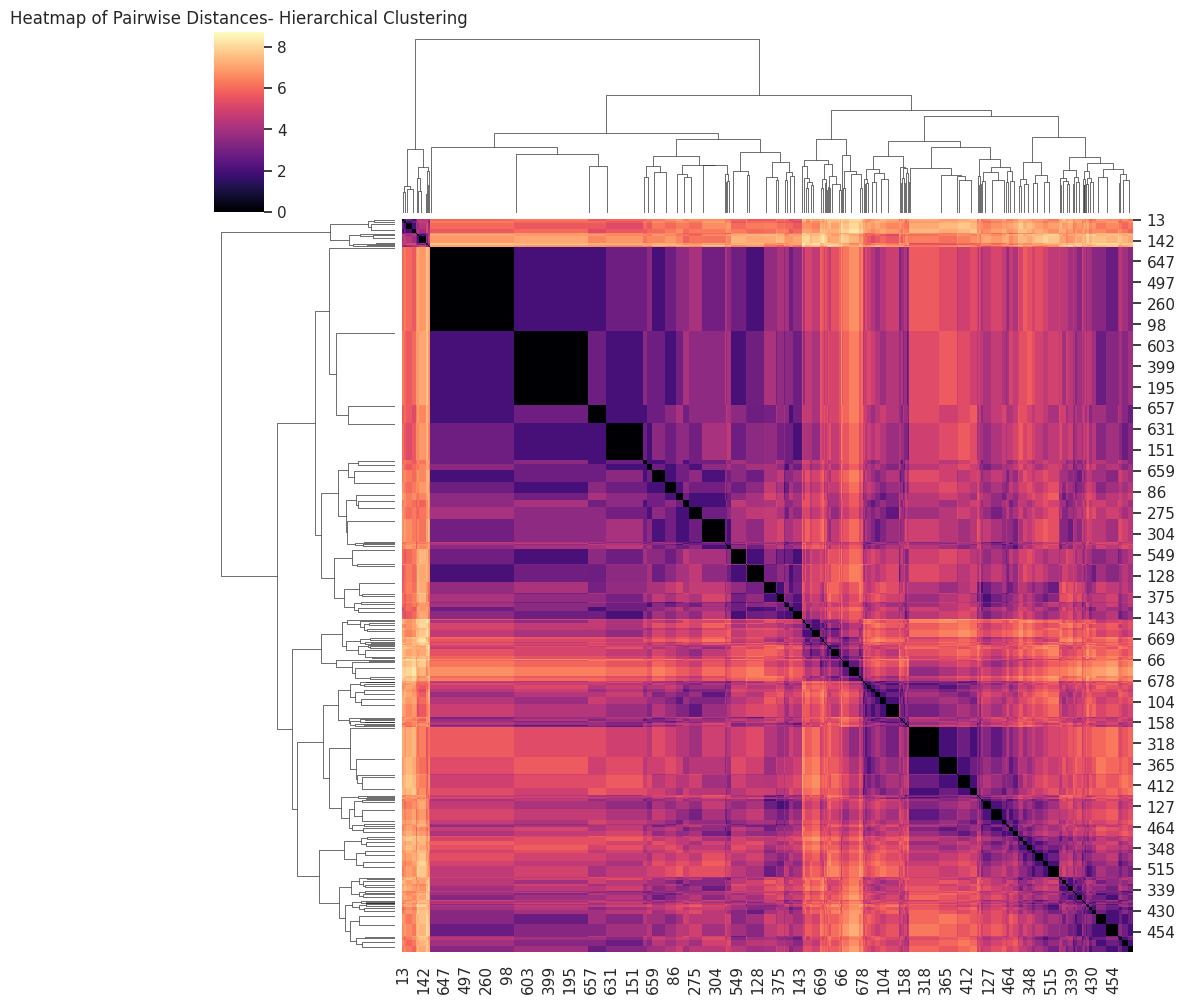

In [ ]:
# Calculate pairwise distances between observations
distance_matrix = squareform(pdist(X10_scaled_df))

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.clustermap(distance_matrix, cmap='magma')
plt.title('Heatmap of Pairwise Distances- Hierarchical Clustering')
plt.show()

**Heatmap Colors**: The color gradient represents the distance between samples—darker colors indicate closer distances (more similarity), while lighter colors indicate greater distances (less similarity). The diagonal line of dark colors shows that the distance from each sample to itself is the smallest, which is expected.

**Clusters**: On the left and top sides of the heatmap, there are tree-like diagrams, which are dendrograms resulting from hierarchical clustering. These dendrograms show how the samples are grouped together based on their distances. The length of the branches in the dendrogram reflects the distance at which samples or groups of samples are merged into clusters.

**Block Patterns**: Blocks of darker colors along the diagonal suggest groups of samples that are similar to each other, forming clusters. This is confirmed by the dendrogram branches that join them at lower heights (distances).
Outliers: Any row or column with a consistently lighter color across might indicate an outlier sample that is not similar to others.

**Summary for Notes**:
- This heatmap with overlaid dendrograms visually represents the pairwise distances between samples and the resulting cluster structure from hierarchical clustering. Darker areas along the diagonal indicate groups of similar samples, forming distinct clusters. The dendrograms on the margins reflect the hierarchical nature of this clustering, with branch lengths indicating the level of similarity at which clusters merge. The visualization suggests the presence of multiple clusters within the data, with some potentially being more tightly knit than others, as evidenced by the dark squares along the diagonal.

###### Construct the Dendrogram

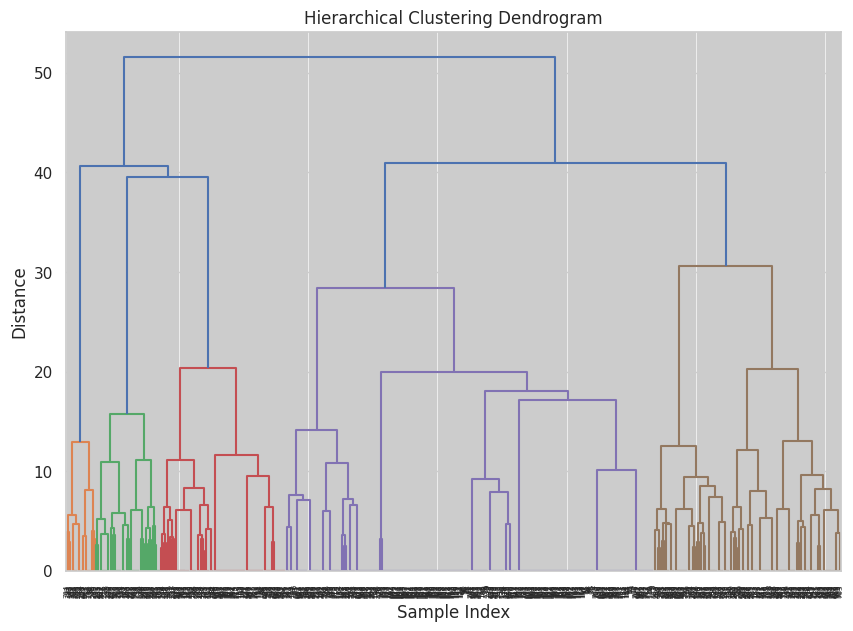

In [ ]:
# Construct the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=X10_scaled_df.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

**Structure and Composition**: The dendrogram represents the multi-level hierarchy in which clusters are combined. Each vertical line represents a cluster at a certain level, with the height of the horizontal lines representing the distance or dissimilarity between clusters being merged.

**Distance Metric**: The y-axis measures the distance between clusters. The scale is arbitrary and depends on the distance metric used; however, it generally indicates how similar or dissimilar clusters are — a lower height indicates more similarity.

**Clustering Process**: Starting from the bottom, each individual data point begins in its own cluster. As you move up the y-axis, clusters are merged with one another based on their distance (or similarity).

**Determining Number of Clusters**: You could 'cut' the dendrogram at a particular height to determine the number of clusters. For instance, cutting the dendrogram at a height of 20 might yield a different number of clusters than cutting it at 10.

**Color Coding**: The color coding on this dendrogram may represent different things depending on the software or options used. Often, colors are used to visually differentiate between distinct clusters or branches in the dendrogram.

**Summary for Presentation:**
- This dendrogram is a visualization of hierarchical clustering performed on our dataset. The vertical lines represent clusters and the height at which branches merge represents the distance between clusters. This visualization allows us to understand the relationships between data points and how we can segment them into clusters based on similarity. By selecting a 'cut-off' distance, we can decide on an appropriate number of clusters for further analysis.

###### AgglomerativeClustering

In [ ]:
# Initialize the model for AgglomerativeClustering
agg_clust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

###### Fit model & predict clusters-Agglomerative

In [ ]:
# Since AgglomerativeClustering doesn't directly support prediction on new data,
# we use fit_predict on the same data to learn and assign clusters

# Fit the model and predict clusters
hc_cluster_labels = agg_clust.fit_predict(X10_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##### Adding cluster labels to the dataframe

In [ ]:
# Add cluster labels to the dataframe for analysis
X10_scaled_df['HC_Cluster'] = hc_cluster_labels

##### Analyze the Clusters

In [ ]:
# Analyze the clusters
print(X10_scaled_df.groupby('HC_Cluster').mean())

            j_breast_behavior_3.0  j_breast_trt_surg_prim_yn_1.0  \
HC_Cluster                                                         
0                       -1.249365                      -0.768007   
1                        0.494304                       0.303858   
2                        0.494304                       0.303858   

            j_breast_trt_chemo_3.0  j_breast_trt_rad_1.0  \
HC_Cluster                                                 
0                        -0.411323             -0.270151   
1                         1.338369              0.144295   
2                        -0.436351              0.087820   

            j_breast_trt_horm_1.0  j_breast_trt_horm_87.0  \
HC_Cluster                                                  
0                       -0.555736                0.500355   
1                       -0.211154               -0.197963   
2                        0.439521               -0.197963   

            j_breast_er_status_3.0  j_breast_pr_stat

In [ ]:
X10_scaled_df.head()

j_breast_behavior_3.0  j_breast_trt_surg_prim_yn_1.0  \
0               0.494304                       0.303858   
1               0.494304                       0.303858   
2              -2.023046                       0.303858   
3               0.494304                       0.303858   
4               0.494304                       0.303858   

   j_breast_trt_chemo_3.0  j_breast_trt_rad_1.0  j_breast_trt_horm_1.0  \
0               -0.436351              1.082736              -0.996106   
1               -0.436351             -0.923587               1.003909   
2               -0.436351             -0.923587              -0.996106   
3               -0.436351              1.082736              -0.996106   
4               -0.436351             -0.923587              -0.996106   

   j_breast_trt_horm_87.0  j_breast_er_status_3.0  j_breast_pr_status_3.0  \
0               -0.197963                0.618945                0.826265   
1               -0.197963                0.618945                0.826265   
2               -0.197963                0.618945               -1.210266   
3               -0.197963                0.618945                0.826265   
4               -0.197963                0.618945                0.826265   

   j_breast_her2summ_3.0  j_breast_her2summ_5.0  HC_Cluster  
0               0.952989              -0.737683           2  
1               0.952989              -0.737683           2  
2               0.952989              -0.737683           0  
3               0.952989              -0.737683           2  
4               0.952989              -0.737683           2

###### Visualizing AgglomerativeClustering

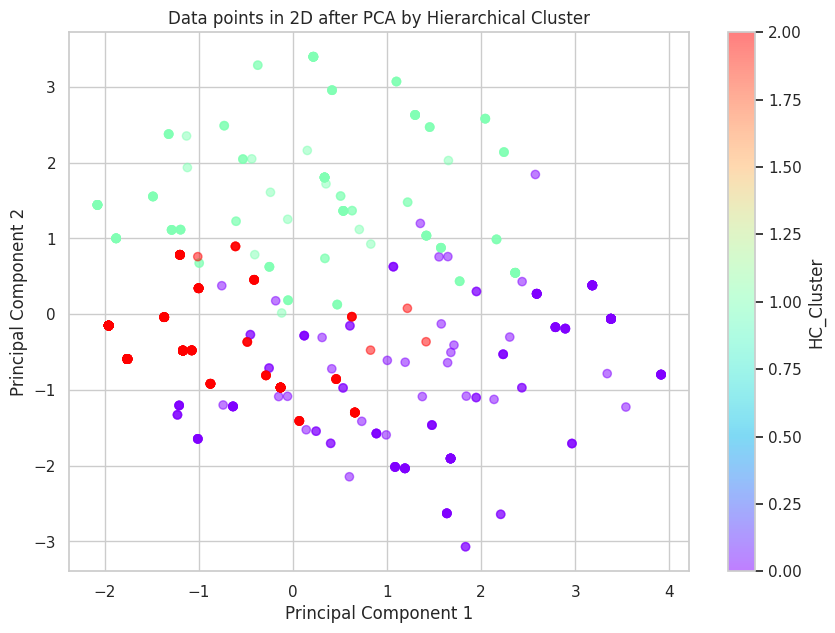

In [ ]:
# Reduce dimensions using PCA(Principal Component Analysis) to plot AgglomerativeClusteing
pca = PCA(n_components=2)  # Reduce to two dimensions for easy plotting
X_pca = pca.fit_transform(X10_scaled_df.drop('HC_Cluster', axis=1))

# Now plot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_cluster_labels, cmap='rainbow', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data points in 2D after PCA by Hierarchical Cluster')
plt.colorbar(label='HC_Cluster')
plt.show()

**Challenges of Plotting High-Dimensional Data:**

- Visual Limitations: Human perception is limited to three spatial dimensions. When data has more than three features (dimensions), it becomes impossible to directly visualize all dimensions simultaneously on a standard 2D or 3D plot. This limitation makes it difficult to gain insights from direct visual representation of high-dimensional data. Our ability to discern patterns or relationships diminishes rapidly as the number of dimensions increases beyond three.

**Role of PCA in Visualization:**

- Dimensionality Reduction: PCA (Principal Component Analysis) is a statistical technique that reduces the number of dimensions in the data while trying to preserve as much of the data's variation as possible. It does this by transforming the data into a new set of variables, the principal components, which are ordered by how much variance they capture from the original dataset.

- By reducing the data to two or three principal components, PCA allows you to create comprehensible 2D or 3D scatter plots. These plots can reveal underlying patterns, clusters, and relationships that were obscured in the higher-dimensional space, making it easier to draw meaningful conclusions about the data’s structure and relationships.

--- INTEPRETATION

- **Axes**: The x-axis and y-axis represent the first and second principal components, respectively. These are the two most significant patterns of variation found in your original, higher-dimensional data.

- **Data Points**: Each point on the graph represents an individual sample from your dataset. The location of each point is determined by the value of the sample on the two principal components.

- **Clusters**: The color of the points indicates cluster membership, which is determined by some clustering algorithm, possibly hierarchical clustering in this case. The color scale on the right side of the graph shows different clusters ranging from blue (cluster 0) to red (cluster 2).

- **Inter-cluster Distribution**: The spread of points in different colors indicates how each cluster is distributed across the principal components. It looks like there's some overlap between clusters, but each cluster has a tendency to group in different areas of the plot.

- **Cluster Boundaries**: No clear demarcation lines are visible between clusters, which suggests that the clusters might not be completely distinct and could have similar characteristics, especially where the colors blend.

**Summary for Presentation:**
This scatter plot, generated post-PCA, displays our dataset condensed into two main components that capture the most variation within the data. The color differentiation allows us to see the cluster formation, with each color representing a different cluster. While there is some overlap, each cluster shows a tendency to group around different areas in this reduced feature space, giving us an insightful visualization of how our data might be segmented into naturally occurring groups.

#####Comparing Clusters with Actual Labels

In [ ]:
# Merging Dataframes

# Add actual labels to the clustering results DataFrame
#X10_scaled_df['Actual_Labels'] = df_temp['j_breast_has_mets'].reset_index(drop=True)

# Ensure indices are aligned
X9_scaled_df.reset_index(drop=True, inplace=True)
X10_scaled_df.reset_index(drop=True, inplace=True)
df_temp.reset_index(drop=True, inplace=True)

# Add the actual Actual_Labels labels to these DataFrames
X9_scaled_df['Actual_Labels'] = df_temp['j_breast_has_mets']
X10_scaled_df['Actual_Labels'] = df_temp['j_breast_has_mets']

In [ ]:
# CROSS TABULATION

# Cross-tabulation between actual labels and K-means cluster labels
crosstab_kmeans = pd.crosstab(X9_scaled_df['Actual_Labels'], X9_scaled_df['KMeans_Cluster'])
print("Cross-tabulation between Actual Labels and K-Means Clusters:\n", crosstab_kmeans)

Cross-tabulation between Actual Labels and K-Means Clusters:
 KMeans_Cluster    0    1   2
Actual_Labels               
0.0             467  120  17
1.0              27  126  12


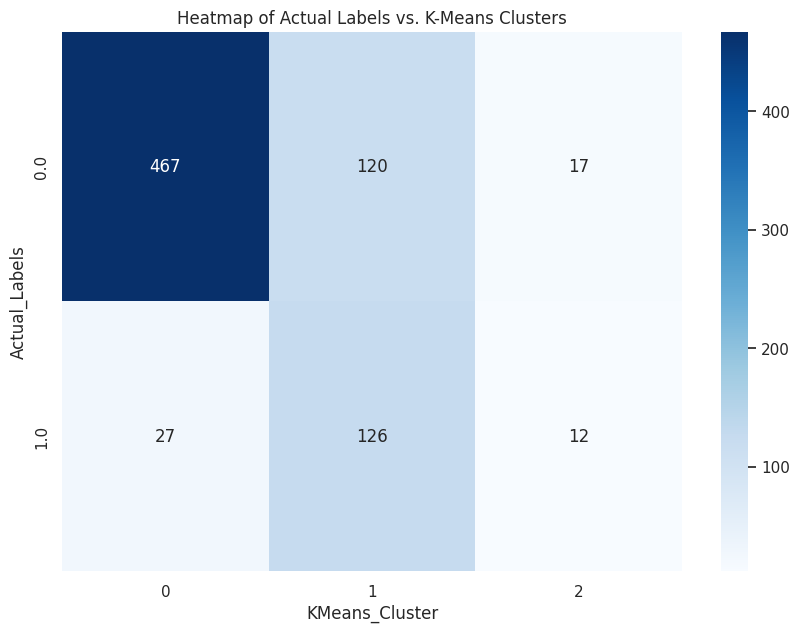

In [ ]:
# HEATMAP

# Heatmap for K-means clusters vs Actual labels
plt.figure(figsize=(10, 7))
sns.heatmap(crosstab_kmeans, annot=True, cmap="Blues", fmt="d")
plt.title('Heatmap of Actual Labels vs. K-Means Clusters')
plt.show()

**Detailed Interpretation of the Cross-Tabulation**

- **Cluster 0:**
Contains 467 instances labeled as 'no metastasis' which indicates that this cluster predominantly captures characteristics typical of patients without metastasis.
Contains 27 instances labeled as 'metastasis', suggesting that a small number of metastasis cases also share similar features with the 'no metastasis' group within this cluster, which might be due to overlapping symptoms or indicators not distinctly separating the two classes.

- **Cluster 1:**
Has 120 instances of 'no metastasis'. This cluster also predominantly captures characteristics of patients without metastasis but to a lesser extent than Cluster 0.
Contains 126 instances of 'metastasis', making it a significant cluster for capturing characteristics of patients with metastasis. This suggests that Cluster 1 might be identifying a specific pattern or subset of features that are more typical of metastasis.

- **Cluster 2:**
The smallest cluster with only 17 instances of 'no metastasis' and 12 of 'metastasis'. This cluster might represent more unique or less common cases, possibly indicating rare or atypical presentations of the disease that don't clearly fall into typical 'metastasis' or 'no metastasis' groups.

**Summary for Notes and Presentation**
In this breast cancer study, K-Means clustering was used to identify inherent groupings in the data based on patient features, without initially using the metastasis labels. The cross-tabulation between the clusters formed and the actual metastasis labels provides significant insights:

**Cluster 0** is the largest and is primarily associated with patients who do not show signs of metastasis, although it also includes a minor segment of metastasis cases. This suggests that the predominant features in this cluster are those generally not associated with metastasis.

**Cluster 1** shows a balanced mix of both metastasis and no metastasis cases, indicating that it captures characteristics common to both groups. This might reflect shared clinical features or diagnostic indicators that are not exclusive to one group.

**Cluster 2**, being the smallest, includes cases that do not strongly align with the typical characteristics of either group, indicating possible atypical cases or mixed features that do not dominate in larger patient groups.

- These findings highlight the complexity and overlap in clinical presentations of metastasis in breast cancer patients. The clusters reveal that while there can be distinct patterns associated with metastasis and non-metastasis, there is also significant overlap, underscoring the challenge in distinguishing between these conditions based solely on unsupervised learning methods.

**Implications**
The analysis underscores the necessity for careful consideration of feature selection and potentially the use of more sophisticated or tailored clustering algorithms that can account for the complexities of medical diagnostic data. Additionally, this clustering approach can guide targeted analyses to further investigate the characteristics of each cluster, potentially leading to more nuanced understanding and better diagnostic strategies.

In [ ]:
# Cross-tabulation between actual labels and Hierarchical cluster labels
crosstab_hierarchical = pd.crosstab(X10_scaled_df['Actual_Labels'], X10_scaled_df['HC_Cluster'])
print("Cross-tabulation between Actual Labels and Hierarchical Clusters:\n", crosstab_hierarchical)


Cross-tabulation between Actual Labels and Hierarchical Clusters:
 HC_Cluster       0    1    2
Actual_Labels               
0.0             60  182  362
1.0            158    4    3


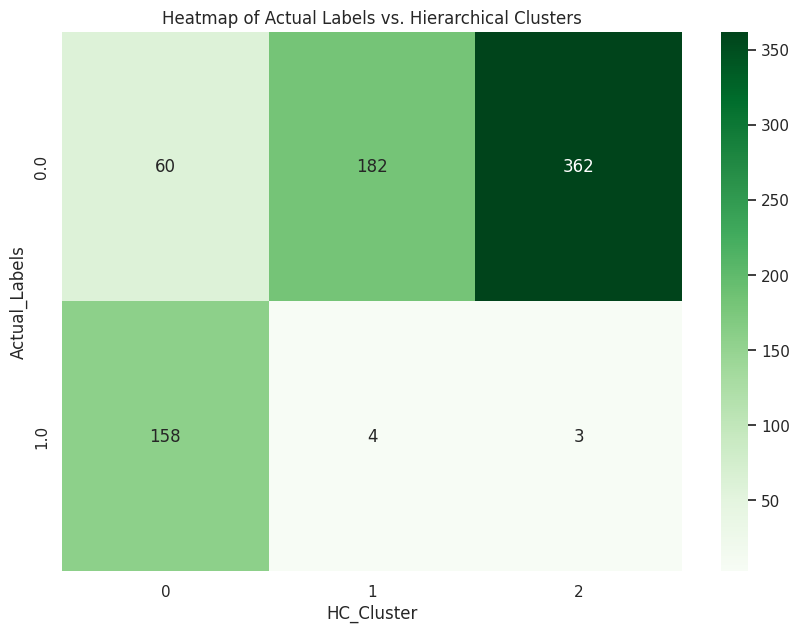

In [ ]:
# Heatmap for Hierarchical clusters vs Actual labels
plt.figure(figsize=(10, 7))
sns.heatmap(crosstab_hierarchical, annot=True, cmap="Greens", fmt="d")
plt.title('Heatmap of Actual Labels vs. Hierarchical Clusters')
plt.show()

**Detailed Interpretation of the Cross-Tabulation**

- **HC_Cluster 0:**
Contains 60 instances of patients labeled 'no metastasis'. This suggests that this cluster is relatively smaller for non-metastasis cases.
Contains 158 instances of 'metastasis', making it predominantly a cluster that captures characteristics or features commonly associated with metastatic cases. This indicates that Cluster 0 strongly correlates with metastatic conditions.

- **HC_Cluster 1:**
Contains 182 instances of 'no metastasis', which suggests this cluster effectively captures a significant portion of non-metastatic cases.
However, it includes only 4 metastasis cases, indicating that the features common to this cluster are generally not associated with metastasis.

- **HC_Cluster 2:**
The largest count for 'no metastasis' with 362 instances, indicating that this cluster overwhelmingly captures characteristics of patients without metastasis.
Contains only 3 instances of 'metastasis', reinforcing that this cluster predominantly consists of non-metastatic characteristics and is quite distinct from metastatic profiles.

**Summary for Notes and Presentation**
The hierarchical clustering analysis in this breast cancer study reveals significant insights into the distribution and characteristics of metastatic and non-metastatic conditions:

**HC_Cluster 0** is primarily associated with metastasis, containing a high number of metastatic cases compared to non-metastatic ones. This cluster may be identifying specific biomarkers or clinical features that are strongly indicative of metastasis.

**HC_Cluster 1** captures mostly non-metastatic cases with very few metastatic cases, suggesting it identifies patterns more typical of patients without metastasis.

**HC_Cluster 2** is the largest for non-metastatic cases and shows a clear separation from metastatic conditions, suggesting it captures the most definitive non-metastatic features.

- These findings highlight the potential of hierarchical clustering to differentiate between metastatic and non-metastatic conditions based on inherent data patterns. Notably, Cluster 0, being predominantly metastatic, could be critical for identifying patients at higher risk or for studying aggressive disease traits. In contrast, Clusters 1 and 2 show strong associations with non-metastatic features, which could help in identifying protective or benign characteristics.

**Implications**
This analysis emphasizes the importance of leveraging hierarchical clustering for exploring complex medical datasets where traditional methods might not fully capture underlying patterns. The distinct clustering of metastatic versus non-metastatic cases offers valuable insights for clinical research, potentially guiding more personalized treatment strategies and better patient management by identifying and categorizing patient characteristics more effectively. Using these insights in a presentation or research paper can underscore the role of advanced data analysis in enhancing understanding and treatment of diseases like breast cancer.

In [ ]:
# STATISTICAL MEASURE- Adjusted Rand Index

# Calculating Adjusted Rand Index for Hierarchical cluster
adjusted_rand = adjusted_rand_score(X10_scaled_df['Actual_Labels'], X10_scaled_df['HC_Cluster'])
print("Adjusted Rand Index for Hierarchical cluster:", adjusted_rand)

Adjusted Rand Index for Hierarchical cluster: 0.30995212082053103


The purpose of the Rand Index is to provide a statistic that quantifies how well a clustering algorithm has performed in terms of grouping data in a way that matches a set of predefined classes. ARI assess the effectiveness of a clustering algorithm in a supervised setting where true labels are known. It helps validate the results of unsupervised learning methods and can be used to compare the performance of different clustering algorithms or different configurations of the same algorithm.

The ARI has a range of:

-1 to 1, where:
A score of 1 indicates perfect agreement between the clusterings.

A score of 0 indicates random clustering (no better than chance).

A score less than 0 (negative values) indicates active disagreement between the clusterings, where the index is less than the expected similarity by chance.

ARI value for the hierarchical clustering is 0.30995212082053103. It means the positive ARI value suggests that there is a moderate agreement between the hierarchical clustering results and the actual labels. This indicates that the clustering has done better than random chance at grouping the data into clusters that correspond to the actual categories. While the ARI is positive, it's not close to 1, which suggests that while there is some correlation between the clusters formed and the actual labels, the match isn't perfect. There could be room for improvement in how the clusters are defined, either by tweaking the clustering algorithm parameters or by refining the feature set used for clustering.

In [ ]:
# Calculating Adjusted Rand Index for K-means
adjusted_rand_kmeans = adjusted_rand_score(X9_scaled_df['Actual_Labels'], X9_scaled_df['KMeans_Cluster'])
print("Adjusted Rand Index for K-means:", adjusted_rand_kmeans)

Adjusted Rand Index for K-means: 0.3212306975508256


The Adjusted Rand Index (ARI) for your K-means clustering result is 0.3212306975508256. This indicates a moderate level of agreement between the clusters identified by the K-means algorithm and the actual labels of the dataset. An ARI score above 0 but significantly below 1 suggests that while the K-means algorithm has managed to group the data into clusters that reflect the actual categories better than random chance, the correspondence is not perfect. This implies that there is some alignment between the clustering and the true classifications, but there may also be room for improving the clustering approach to enhance how accurately the clusters represent the predefined groups.

##### Tabulate to Format Crosstab Data

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming crosstab_kmeans is already created as shown
print("Cross-tabulation between Actual Labels and K-Means Clusters:\n")
print(tabulate(crosstab_kmeans, headers='keys', tablefmt='psql'))

Cross-tabulation between Actual Labels and K-Means Clusters:

+-----------------+-----+-----+-----+
|   Actual_Labels |   0 |   1 |   2 |
|-----------------+-----+-----+-----|
|               0 | 467 | 120 |  17 |
|               1 |  27 | 126 |  12 |
+-----------------+-----+-----+-----+
